# Этап 1. Постановка задачи

**Тема:** Исследование наличия взаимосвязи между веком постройки объектов архитектурного наследия России и датой постановки их на охрану.



## 1.1. Цели анализа
**Проблема:**

Существует ли взаимосвязь между веком постройки памятников архитектуры и датой постановки их на охрану?

**Гипотеза:**

Чем позднее памятник архитектуры поставлен на охрану, тем позже он построен.

**Способ интерпретации результата:**

Результаты исследования по выявлению наличия взаимосвязи между веком постройки объекта архитектурного наследия и датой постановки его на охрану могут быть представлены в виде столбчатой или линейной диаграммы.

**Объект исследования:**

Памятники материального культурного наследия России с указанной датой создания и датой постановки их на охрану, видовая принадлежность которых относится к “Памятникам градостроительства и архитектуры”



## 1.2. Оценка ситуации
**Список ресурсов:**
- В качестве источника данных для анализа будет выступать Портал открытых данных Министерства культуры Российской Федерации
- В качестве инструмента анализа данных будет выступать онлайн-платформа “Google Colaboratory” 
- В качестве инструмента визуализации результатов исследования могут быть использованы: библиотеки для визуализации данных Python (matplotlib, plotly), программы работы с векторной графикой (adobe illustrator)

**Требования, допущения и ограничения:**

*Требования:* Данные по объектам культурного наследия России возможно свободно использовать для копирования, а также проводить любых манипуляции в коммерческих и некоммерческих целях при условии:
- использовать открытые данные только в законных целях
- не искажать открытые данные при их использовании
- сохранять ссылку на источник информации при использовании открытых данных

*Ограничения:* В реестр объектов культурного наследия России попадают лишь те памятники, которые получили охранный статус, из-за чего в наборе данных не включено большое количество выявленных объектов культурного наследия, также охраняемых государством.

## 1.3. Задачи анализа данных
**Описание задачи:**

Получение данных по объектам культурного наследия России с портала открытых данных Минкульт РФ

Предварительная обработка дат постройки памятника и дат постановки его на охрану для приведения их к единому типу

**Ожидаемые результаты:**

Визуализация результатов анализа данных, демонстрирующая наличие взаимосвязи между веком постройки памятника архитектуры и датой постановки его на охрану

**Критерии оценки:**

В качестве критерия успешности анализа может выступать явно прослеживаемая на графике тенденция увеличения доли построек с более поздним веком их создания среди всех зарегистрированных памятников архитектуры.

# Этап 2. Понимание данных


## 2.1. Сбор исходных данных

С Портала открытых данных Министерства культуры Российской Федерации (https://opendata.mkrf.ru/opendata/7705851331-egrkn) с помощью средств, предоставляемых платформой, были скачены 15 файлов в формате json, которые содержат сведения из Единого государственного реестра объектов культурного наследия (памятников истории и культуры) народов Российской Федерации — схема от 05.05.2020, данные от 05.06.2020

Затем полученные данные были объединены в общий csv-файл. Ход работы продемонстрирован ниже.

In [ ]:
# подключаем необходимые библиотеки 
import json
import pandas as pd
import glob
import collections 
import tqdm

In [ ]:
# создаем датафрейм и указываем путь к файлам с данными
database = pd.DataFrame() 
folder = r'/Users/macbook/Documents/web data/json'

In [ ]:
# создаем цикл для обработки каждого файла
for file in glob.glob("{}/*.json".format(folder)):
    with open(file, 'r') as f:
        raw = json.load(f)
        
        # создаем цикл для обработки данных по каждому культурному объекту
        # добавляем шкалу прогресса для отслеживания процесса работы программы
        pbar = tqdm.tqdm(raw, position=0, leave=True)
        for each in raw:
            defd = collections.defaultdict(int,each)
            _id = defd['_id']
            nativeId = defd['nativeId']
            nativeName = defd['nativeName']
            activated = defd['activated']
            created = defd['created']
            modified = defd['modified']
            data = collections.defaultdict(int,defd['data'])
            general = collections.defaultdict(int,data['general'])
            borderInfo = general['borderInfo']
            conNumber = general['conNumber']
            createDate = general['createDate']
            isActual = general['isActual']
            isPublic = general['isPublic']
            name = general['name']
            regNumber = general['regNumber']
            
            # обрабатываем исключения
            if 'address' in general and general['address'] is not None:
                address = collections.defaultdict(int,general['address'])
                fullAddress = address['fullAddress']
              
            if 'documents' in general and general['documents'] is not None:
                documents = collections.defaultdict(int,general['documents'][0])
                document_name = collections.defaultdict(int,documents)['name']
                document_no = collections.defaultdict(int,documents)['number']
                document_date = collections.defaultdict(int,documents)['date']
            
            if 'categoryType' in general and general['categoryType'] is not None:
                categoryType = collections.defaultdict(int,general['categoryType'])['value']
            
            if 'objectType' in general and general['objectType'] is not None:
                objectType = collections.defaultdict(int,general['objectType'])['value']
            
            if 'region' in general and general['region'] is not None:
                region =  collections.defaultdict(int,general['region'])['value']
            
            if 'status' in general and general['status'] is not None:
                status = collections.defaultdict(int,general['status'])['value']
                
            if 'typologies' in general and general['typologies'] is not None:
                typologies = collections.defaultdict(int,general['typologies'][0])['value']
                
            if 'unesco' in general and general['unesco'] is not None:
                unesco = collections.defaultdict(int,general['unesco'])['value']
                
            unit = {'_id': _id, 'nativeId': nativeId,
                    'nativeName': nativeName,
                    'fullAddress': fullAddress,
                    'borderInfo': borderInfo,
                    'categoryType': categoryType,
                    'conNumber': conNumber,
                    'createDate': createDate,
                    'document_name': document_name,
                    'document_no': document_no,
                    'document_date': document_date,
                    'isActual': isActual,
                    'isPublic': isPublic,
                    'name': name,
                    'objectType': objectType,
                    'regNumber': regNumber,
                    'region': region,
                    'status': status,
                    'typologies': typologies,
                    'unesco': unesco,
                    'activated': activated,
                    'created': created,
                    'modified': modified}
            
            # добавляем данные в датафрейм
            database = database.append(unit, ignore_index = True)

            pbar.update(1)
        pbar.close()
        
# сохраняем полученный результат в csv     
database.to_csv('database.csv', index = False, sep = ';')

100%|██████████| 10000/10000 [1:19:36<00:00,  2.09it/s]


## 2.2. Описание данных
Собранные данные представляют набор объектов культурного наследия РФ с их характеристиками, полученный путем объединения исходной информации.

Количество объектов культурного наследия в датасете: 144448.

In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144448 entries, 0 to 144447
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   _id            144448 non-null  object 
 1   activated      144448 non-null  object 
 2   borderInfo     89528 non-null   object 
 3   categoryType   144448 non-null  object 
 4   conNumber      144448 non-null  object 
 5   createDate     144448 non-null  object 
 6   created        144448 non-null  object 
 7   document_date  144448 non-null  object 
 8   document_name  144448 non-null  object 
 9   document_no    144448 non-null  object 
 10  fullAddress    144448 non-null  object 
 11  isActual       144448 non-null  float64
 12  isPublic       144448 non-null  float64
 13  modified       144448 non-null  object 
 14  name           144448 non-null  object 
 15  nativeId       144448 non-null  object 
 16  nativeName     144448 non-null  object 
 17  objectType     144448 non-nul

## 2.3. Исследование данных
Визуализация результатов анализа данных будет осуществляться с помощью библиотеки языка программирования Python для визуализации данных — matplotlib

## 2.4. Проверка качества данных

Данные включают в себя полную информацию об объектах культурного наследия РФ, поставленных на государственную охрану за исключением памятников, относящихся к категории "выявленные", а также лишившихся охраняемого статуса.

В данных присутствуют пропущенные значения в описании границ объекта, его адреса, даты создания и номера документа постановки памятника на учет.

In [ ]:
for i in database.columns:
    if len(database[(database[i].isna() == True) | (database[i] == ' ') | (database[i] == '')]) != 0:
        print(f'Кол-во пропущенных значений в столбце {i}:', len(database[(database[i].isna() == True) | (database[i] == ' ') | (database[i] == '')]))

Кол-во пропущенных значений в столбце borderInfo: 54920
Кол-во пропущенных значений в столбце createDate: 3049
Кол-во пропущенных значений в столбце document_no: 608
Кол-во пропущенных значений в столбце fullAddress: 9


Также в данных присутствуют нулевые значения там, где они не предполагаются. Например в столбцах о границах объекта, даты его создания, информации о документах постановки памятника на учет (дата документа, его номер и наименование). Нулевые значения имеются и в столбцах статуса особо ценного объекта и принадлежности к ЮНЕСКО.

В столбце isPublic все значения равны 0, но из-за отсутствия пояснения к данным, сложно сказать, что описывает данная характеристика.

In [ ]:
for i in database.columns:
    if len(database[database[i] == 0]) != 0:
        print(f'Кол-во значений равных нулю в столбце {i}:', len(database[database[i] == 0]))

Кол-во значений равных нулю в столбце borderInfo: 81281
Кол-во значений равных нулю в столбце createDate: 535
Кол-во значений равных нулю в столбце document_date: 2882
Кол-во значений равных нулю в столбце document_name: 19
Кол-во значений равных нулю в столбце document_no: 1928
Кол-во значений равных нулю в столбце isActual: 22863
Кол-во значений равных нулю в столбце isPublic: 144448
Кол-во значений равных нулю в столбце status: 39
Кол-во значений равных нулю в столбце unesco: 39


В столбце isActual записаны только два значения: 0 и 1, что показывает отсутсвие ошибок в данном случае, однако не объясняет, что характеризует данная категория.

In [ ]:
print(database['isActual'].value_counts())

1.0    121585
0.0     22863
Name: isActual, dtype: int64


В данных присутствуют два столбца полностью дублирующие информацию друг друга — name и nativeName.

In [ ]:
name = database['nativeName'] == database['name']
print(name.value_counts())

True    144448
dtype: int64


В данных, описывающих дату создания объекта, есть несколько ошибок:
- пропущенные значение
- разное наименование для неопределенной даты создания объекта
- разный вид написания дат создания (от названия эпохи до года создания)

Для проверки гипотезы исследования, необходимо привести даты создания памятников архитектуры к единому виду

In [ ]:
database['createDate'].value_counts().head(30)

дата создания (возникновения) не определена    7762
XIX в.                                         3918
III тыс. до н.э. - XIV в. н.э.                 3534
                                               3048
Дата создания (возникновения) не определена    2175
1941-1945 гг.                                  2145
1943 г.                                        1792
кон. XIX в.                                    1585
эпоха бронзы - позднее средневековье           1411
нач. XX в.                                     1220
конец XIX в.                                   1186
III тыс. до н. э. -  XIV в. н. э.              1166
XVIII в.                                       1064
эпоха бронзы                                   1056
III тыс. до н.э. - XIV в. н. э.                1024
начало XX в.                                   1018
II пол. I тыс. н.э.                             995
III тыс. до н.э.                                846
неолит                                          807
II тыс. до н

# Этап 3. Подготовка данных


## 3.1. Выбор данных

Для проведения анализа были выбраны объекты культурного наследия РФ, видовая принадлежность которых относится к “Памятникам градостроительства и архитектуры”.

Также для удобства исследования из данных были исключены значения, которые не несут ценность для анализа:
- хэш-id объекта
- дата занесение/изменения информации об объекте в базу данных
- информация о границах объекта
- учетный номер и архивный код
- имя и номер документа постановки объекта на учет
- категория "isActual"
- категория "isPublic"
- дублирующие значения наименования объекта
- точный адрес объекта

В результате выбрана информация о 51511 памятников архитектуры

In [ ]:
# выбираем необходимые данные для дальнейшего анализа
df = database[['regNumber', 'name', 'createDate', 'typologies', 'region', 'objectType', 'categoryType', 'document_date', 'status', 'unesco']]
df = df[df['typologies'] == 'Памятник градостроительства и архитектуры']
df

,regNumber,name,createDate,typologies,region,objectType,categoryType,document_date,status,unesco
0,261610253110305,Музыкальная беседка,1974 г.,Памятник градостроительства и архитектуры,Ставропольский край,Памятник,Регионального значения,2016-08-31,нет,нет
4,771610502200015,Дом с мезонином,нач. XX в.,Памятник градостроительства и архитектуры,г. Москва,Памятник,Регионального значения,2002-03-15,нет,нет
8,151610537890015,Остатки Бадского форта,Средние века,Памятник градостроительства и архитектуры,Республика Северная Осетия - Алания,Памятник,Регионального значения,1960-08-30,нет,нет
11,501410548070005,Дом жилой,перв. пол. XIX в.,Памятник градостроительства и архитектуры,Московская область,Памятник,Регионального значения,2002-03-15,нет,нет
15,771410556680006,Дом с палатами,"XVII в., начало ХIХ в.",Памятник градостроительства и архитектуры,г. Москва,Памятник,Федерального значения,1960-08-30,нет,нет
...,...,...,...,...,...,...,...,...,...,...
144439,581710894490005,Дом жилой,Конец XIX века,Памятник градостроительства и архитектуры,Пензенская область,Памятник,Регионального значения,1988-12-01,нет,нет
144440,371610424420016,Казанская церковь (зимняя) с колокольней,1613 г.,Памятник градостроительства и архитектуры,Ивановская область,Памятник,Федерального значения,1960-08-30,нет,нет
144443,291710845890005,Амбар,XVIII век,Памятник градостроительства и архитектуры,Архангельская область,Памятник,Регионального значения,1998-08-13,нет,нет
144444,291710857580045,Дом жилой,начало XX в.,Памятник градостроительства и архитектуры,Архангельская область,Памятник,Регионального значения,1998-08-13,нет,нет


In [ ]:
# удаляем значения о видовой принадлежности объектов, т.к. теперь все они соответствуют категории "памятник градостроительства и архитектуры"
df.drop(['typologies'], axis='columns', inplace=True)
df

,regNumber,name,createDate,region,objectType,categoryType,document_date,status,unesco
0,261610253110305,Музыкальная беседка,1974 г.,Ставропольский край,Памятник,Регионального значения,2016-08-31,нет,нет
4,771610502200015,Дом с мезонином,нач. XX в.,г. Москва,Памятник,Регионального значения,2002-03-15,нет,нет
8,151610537890015,Остатки Бадского форта,Средние века,Республика Северная Осетия - Алания,Памятник,Регионального значения,1960-08-30,нет,нет
11,501410548070005,Дом жилой,перв. пол. XIX в.,Московская область,Памятник,Регионального значения,2002-03-15,нет,нет
15,771410556680006,Дом с палатами,"XVII в., начало ХIХ в.",г. Москва,Памятник,Федерального значения,1960-08-30,нет,нет
...,...,...,...,...,...,...,...,...,...
144439,581710894490005,Дом жилой,Конец XIX века,Пензенская область,Памятник,Регионального значения,1988-12-01,нет,нет
144440,371610424420016,Казанская церковь (зимняя) с колокольней,1613 г.,Ивановская область,Памятник,Федерального значения,1960-08-30,нет,нет
144443,291710845890005,Амбар,XVIII век,Архангельская область,Памятник,Регионального значения,1998-08-13,нет,нет
144444,291710857580045,Дом жилой,начало XX в.,Архангельская область,Памятник,Регионального значения,1998-08-13,нет,нет


## 3.2. Очистка данных

Для корректного проведения анализа данных требуется:
- удалить или восстановить пропущенные и равные нулю значения
- привести к единому виду значения, описыващие неустановленную дату создания объекта

Перечисленные шаги осуществлялась средствами стандартных функций языка программирования Python, а также библиотекой pandas. Ход работы представлен ниже.

Проверяем на наличие значений равных нулю в наборе выбранных данных

In [ ]:
for i in df.columns:
    if len(df[df[i] == 0]) != 0:
        print(f'Кол-во значений равных нулю в столбце {i}:', len(df[df[i] == 0]))

Кол-во значений равных нулю в столбце createDate: 180
Кол-во значений равных нулю в столбце document_date: 841
Кол-во значений равных нулю в столбце status: 33
Кол-во значений равных нулю в столбце unesco: 33


Удаляем строки с значениями равными нулю и ошибочные значения в столбце document_date, т.к. нет возможности восстановить эти данные

In [ ]:
wrong_date = ['1327', '1774', '1774', '1071', '1193', '1193', '1193', '1193', '1690', '1193', '1067', '1886', '1193', '1327', '1873', '0201', '1193', '1900', '1005']
for i in wrong_date:
    df = df[df.document_date != i]

In [ ]:
df = df[df['document_date'] != 0]

Заменяем значения равные нулю в столбце createDate на "неизветсно", а в столбцах status и unesco — на "нет"

In [ ]:
df['createDate'].replace(0, 'неизвестно', inplace=True)
df['status'].replace(0, 'нет', inplace=True)
df['unesco'].replace(0, 'нет', inplace=True)

Проверяем наличие пропущенных значений в выбранных данных

In [ ]:
for i in df.columns:
    if len(df[(df[i].isna() == True) | (df[i] == ' ') | (df[i] == '')]) != 0:
        print(f'Кол-во пропущенных значений в столбце {i}:', len(df[(df[i].isna() == True) | (df[i] == ' ') | (df[i] == '')]))

Кол-во пропущенных значений в столбце createDate: 940


Заменяем пропущенные значения в столбце createDate на "неизветсно"

In [ ]:
df['createDate'].replace('', 'неизвестно', inplace=True)

In [ ]:
n = []
for i in df.columns:
    if len(df[df[i] == 0]) != 0:
        n.append(len(df[df[i] == 0]))
        print(f'Кол-во значений равных нулю в столбце {i}:', len(df[df[i] == 0]))
if len(n) == 0:
    print('Нет значений равных нулю')

n = []
for i in df.columns:
    if len(df[(df[i].isna() == True) | (df[i] == ' ') | (df[i] == '')]) != 0:
        print(f'Кол-во пропущенных значений в столбце {i}:', len(df[(df[i].isna() == True) | (df[i] == ' ') | (df[i] == '')]))
if len(n) == 0:
    print('Нет пропущенных значений')

Нет значений равных нулю
Нет пропущенных значений


Для приведения к единому виду данных, описывающих неустановленную дату создания объекта, заменяем все эти значения на "неизветсно"

In [ ]:
no_date = ['дата создания (возниконовения) не определена', 'дата создания (возникновения) не определена', 'Дата создания (возникновения) не определена',
          'дата создания (возникновения) не определена, 1865 г.-надстройка, 1908 г.-надстройка', ' дата создания (возникновения) не определена',
          'Дата создания (возниконовения) не определена', 'дата cоздания (возникновения) не определена', 'дата создание (возникновения) не определена', 
          'дата создания и возникновения памятника не известны', 'дата созданиия (возникновения) не определена',
          'дата создания (возникновения) не ясна, 1870-1890-е гг.-перестройки, 1900-е гг.-внутренние перестройки', 'дата создания (возникновени) не определена',
          'Дата создания (возникновения) не опеределена', 'Дата создания (возникновения) на определена', 'Дата создания (возникновения) не определена ']
df['createDate'].replace(no_date, 'неизвестно', inplace=True) 

## 3.3. Построение данных

В связи с тем, что больше половины дат постройки объектов архитектуры не имеют точного времени создания, было приятно решение сохранить информацию только о веке постройки. У архитектурных объектов созданных на рубеже веков или в течении нескольких веков для приведения к общей дате за основу бралась информация о начале постройки объекта. Если у объектов указано несколько дат — была оставлена только первая дата. Период эклектики и конструктивизма отнесен к ХХ в. Данные, в которых сложно определить вековую принадлежность, а также не относящиеся к указанию временного периода, исключены из выборки (например, средние века, II тыс. до н.э., здесь в 1910-1920-х гг. жил архитектор Шехтель Ф.О. и т.д.)


Также для удобства проведения анализа в строках, описывающих дату постановки памятник на охрану, был сохранен только год.

Процедура была осуществлена средствами стандартных функций языка программирования Python, а также библиотекой pandas.

Результатом данного этапа выступают подготовленные к проведению анализа данные в формате csv. Ход работы представлен ниже.


В дате постановки объекта на государственную охрану оставляем только год. 

In [ ]:
df['document_date'] = df['document_date'].apply(lambda x: x.split('-')[0])
df['document_date']

0         2016
4         2002
8         1960
11        2002
15        1960
          ... 
144439    1988
144440    1960
144443    1998
144444    1998
144447    1987
Name: document_date, Length: 50670, dtype: object

Создаем списки значений по векам

In [ ]:
iv = ['IV-VI вв.', ' IV-VIII вв.']

In [ ]:
v = ['V - VI вв.', 'V-VIII вв.', 'V-IX века, IX-XIII века, XIV-XVII века']

In [ ]:
vi = ['VI век', 'VI  в.', 'нач. VI-кон. VII вв.', 'VI-XIX вв.', 'VI-XIвв. н.э']

In [ ]:
vii = ['VII-X вв.', 'VII-X вв.']

In [ ]:
viii = ['VIII - X вв. н. э.', 'конец VIII в.', 'VIII-XIX вв.', 'VIII-IX века, XIX век', 'VIII-IX вв.' ]

In [ ]:
ix = ['IX - X вв. н.э.', 'IX - XIVвв.', 'IX-X вв.', 'IX-XIX вв.']  

In [ ]:
x = ['X-XI вв.', 'X-XI века', 'X-XI вв. ', 'X-XI  вв.', 'X век', 'X -ХII вв.', 'X-XIII вв.',  'X-XVI вв.', 'X-XII вв', 'X-XII вв.', 'X в н.э.', 'X - XII вв.', 'X-XIV вв.']

In [ ]:
xi = ['XI век', 'XI - XII вв., XVI - XVII вв.', 'XI в., XIX в.', 'XI в.', 'XI - XII вв.', 'XI-XII вв.', 'XI-ХII вв.', 'XI-XX века', 'XI-XIII века', 'XI-XVI вв.', 'XI-XII вв.  ', 'XI-XIII вв.', 
      '1045-1050 годы']

In [ ]:
xii = ['XII-XVI вв.', 'XII-XVIII вв.', 'XII-XV вв., средние века', 'XII-XIX вв.', 'XII-ХVIII вв.', 'XII век', 'XII-XV вв., средние вв.', 'XII-XIV вв.', 'XII - XIII вв.', 'XII-XV вв.', 
       'XII-XIII вв.', 'XII-XIII вв.; XIV-XIX вв.', 'XII-XV, средние вв.', 'XII – XIII вв., 1806 г.', 'нач. XII-кон. XVIII вв.', 'XII-XVII вв.', '2-я половина XII в.', 'XII в., 1234 г.',
       'XII - XVI вв.', 'XII - нач. XX вв.', 'XII-XIX века', 'XII - XVII вв.', 'XII-XV, средние века', 'XII в., XIV в.', 'XII-ХVI вв.', ' XII в.', 'XII-XIII вв., XIV-XIX вв.', 'XII - ХVIII вв.',
       '1185 г., XV-XVI вв.', '1146 г.', '1158 г.', '1117 г., XVI-XVIII вв.', '1179 г.', '1158-1194 гг., 1810 г.', '1157 г.', '1113-1136 гг., XVII, XIX вв.', '1117-1125 гг., XVII в., XIX в.', 
       '1164 г.', '1173 г.', '1127-1130 гг., XV, XVI, XVIII-XIX вв.', '1152 г.', '1135-1144 гг., XV-XIX вв.', '1152 г. - XVII в.', '1165 г.', 'ХII - ХVIII вв.']

In [ ]:
xiii = ['XIII-XVIII вв.', 'XIII-XIV вв.', 'XIII-XIX вв.', 'XIII-XVI вв.', 'кон. XIII в.', 'XIII - XIV вв.', 'XIII – 1-я четв. ХХ вв.', 'XIII-XV; XVI-XX вв.', 'XIII век',
        'вторая половина XIII в.        ', 'сер. XIII в.', 'XIII-ХV вв.', 'XIII-XX вв.', 'конец XIII в.', 'XIII-ХIV вв.', 'XIII-XVII вв.', 'XIII-ХVIII вв.', 'XIII–XIX вв.', 'XIII в., XIX в.',
        'XIII-XIV века', 'XIII—XIV века', '1270 г.', '1292 г.', '1239 г.', '1240-е гг.', '1276-1288 гг.', '1264 г.', '1289-1409 гг.', '1262 г.', '1207 г., XIV, XV, XVII-XIX вв.', 
        '1268 г.', '1266 г.', '1242 г.', '1219 г., XVII в., 1853 г.', '1222 - 1225 гг.', '1254 г.']

In [ ]:
xiv = ['XIV-XVI вв.', 'XIV-XVIII вв.', 'XIV век', 'XIV-XV вв.', 'XIV-XVII вв.', 'XIV-ХVI вв.', 'XIV - XVI вв.', 'XIV-XV века', 'XIV-XIX вв.', 'нач. XIV-кон. XVIII вв.', 'XIV - ХVI вв.',
       'XIV - XVII вв.', 'XIV-XX вв.', 'конец XIV в.', 'XIV в., XVIII-XX вв.', 'XIV-XVI вв.\t', 'XI-XIV вв.', 'середина XIV в.', 'середина XIV в., конец XIX в.', 'XIV - нач. XХ вв.',
       'к. XIV-н. XV вв.', ' XIV-XVI вв.', 'XIV-XVI вв. ', 'конец XIV в., XVI в., XVIII в.', 'XIV-ХVII вв.', 'XIV-XVI века', 'вторая половина XIV (?)-вторая половина XVIII века',
       'XIV в н.э.-XVI в. н.э.', 'XIV век - вторая половина XX века', 'кон. XIV-нач. XV вв., XVIII в.', 'XIV -XVI вв.', 'конец XIV в., 1484-1489 гг., 1563 г., XVI в.', '1320-1340 гг.', 
       '1387-1430 гг.', '1385-1414 годы', '1354 г.', '1350 г.', '1348 год', '1325 г.', '1352 г.', '1349 г.', '1371 г.', '1374 г.', '1350 год', '1368 г.', '1390 г.', '1373 год', '1357 г.', 
       '1399 г.', '1363-1364 гг.', '1386 год', '1367 г.', '1313 г.', '1332 г.', '1362 г., 1541 г., 1812 г.', '1375 г.', '1355 г.', '1320 г.', '1310 г., XVII в.  ', '1385 год', '1336 год', 
       '1324 г.х.', '1394 год, X-XV века', '1305 г.', '1383 г.', '1387 год', '1356 г., 1750-1754 гг.', '1360 г.', '1341 г.', '1375-1414 годы', '1384 г.', '1320-1330 гг.', '1362 г.', 
       '1393 г., XIX в.', '1380 г., перестроена в XVI-XVII вв.', '1320-1380 гг.', '1382 г.', '1387 г.', '1356 г.', '1352-1918 гг.', '1315 г.', '1382-1448 годы', '1345 г.', '1342 год', 
       '1355 г.   ', 'до 1322 года']

In [ ]:
xv = ['XV-XVI вв.', 'XV-XVII вв.', 'XV–ХVII вв.', 'XV-XVII века', 'XV-XVIII вв.', 'XV век', 'XV-XIX века', 'XV-XIX вв.', 'нач. XV-кон. XVIII вв.', 'XV - XVII вв.', 'XV-XVIII века',
      'кон. XV в., 1759 г., середина XIX века', '1-я пол. VI-1-я пол. XV вв.', 'конец XV в. - начало XVI в.', 'X-XV вв.', 'XV-ХVII вв.', ' XV-XVII века', 'около 1400 г.',
      'XV в., с перестройками  XVII и XVIII вв.', '1495-1499 гг., перестройки XVII в.', 'XV -XVIIв.', 'начало XV в.', 'XV в.,1960-1970 гг.', 'конец XV в., с перестройками XVII в.',
      '1495 г., 70-80-е гг. XVII в.', '1495 г., с перестройкой XVII в.', 'конец XV - начало XVI вв.', '1498 г., XVII в.', 'конец XV-XVII век, конец XVIII века, XIX век, начало XX века',
      '1495 г., с перестройками XVII в.', 'XV век, XVII-XVIII века', 'середина XV в., XVI-XVII вв.', 'XV-нач. XX вв.', '1493-1495 гг., с перестройками XVII в.',
      'XV –  первая половина XVIII вв.', 'XV-ХVI вв.', ' XV в.; 1540 г.', 'вторая половина XV в.', 'XV-ХIХ вв.', '1485-1486 гг., XVII в.', 'XV-XVI века', 'XV, XVI-XVII вв.',
      'XV-XVII века, XX век', 'XV - XX вв. н.э.', '1490-е гг., перестройка XVII в.', '1490 г., с перестройками XVII и XVIII вв.', 'XV – XVI вв.', 'XV - XIX вв.',
      '80-е гг. XV в., полная перестройка XVIII в.', 'XV-XX века', 'XV - XVI вв.', '1487-1488 гг., с перестройками XVII-XVIII вв.', 'конец XV века', ' XV-XVII вв. н.э.', ' XV-XIX века',
      '1488 г., надстройка XVII в., перестройка XIX в.', 'Конец XV–XIX вв.', 'XV в., с перестройками XVII–XVIII вв.', 'XV в., XIX - нач. XX вв,', '1487 г., с перестройками XVII в.',
      '1491 г., перестройки XVII в.', 'XV-XVI, XVII, XVIII, XIX вв.', '1491 г., с надстройками XVIII-нач. XIX вв.', '1490 г., перестройки XVII в.', ' XV-XVII вв.',
      '1491 - 1497 гг., 1645 - 1647 гг., XVII в.', '1442 г.', '1445 г.', '1462 г.', '1400 г.', '1481-1483 гг.', '1422-1427 гг.', '1455 г.', '1480 г.', '1463 год', 
      '1490 год, 1530-1540-е годы, 1794-1798 годы, 1502 год', '1494 г.', '1485-1516 гг. и 1672-1686 гг.', '1485-1516 гг.,1672-1686 гг.', '1475-1479 гг., ХV-ХVII вв.', '1407 г.', 
      '1492 г. - нач. XX в.', '1473 г.; 1758 г.', '1493 г.', '1409 г.', '1408 год', '1433 год', '1485 г., 1722 г.', '1487-1491 гг.', ' 1487 г.']

In [ ]:
xvi = ['XVI-XVII вв.', 'XVI в.', 'XVI-XVIII вв.', 'XVI - XVIII вв.', 'XVI - XVII вв.', 'XVI век', 'Кон. XVI в.', 'XVI - ХVIII вв.', 'XVI - ХVII вв.', ' XVI - XVII вв., 1670 - 1678 гг., ',
       'XVI-XVII в.', 'XVI-ХVII вв.', 'XVI-XVII века', '1599 г., XVII в.', 'XVI - нач. ХХ вв.', 'нач. XVI-кон.  XVIII вв.', 'середина XVI - конец XVII вв., 1732 г.', 'XVI в., 1790-1792 гг.',
       'XVI - XVI вв.', 'II пол. XVI в., 1876-1880 гг.', 'начало XVI в.', 'XVI в., 1675 г., 1758 г.', 'XVI в., 1888 г.', 'первая половина XVI в.', 'XVI в., XVII в, XVIII в.',
       '1540-е годы, вторая половина XVI века', '1552 г., 1693 г., XVIII в., 1802 г.', '1505-1509 гг., XVI-XVII вв.', 'конец XVI - конец XVII века', 'середина XVI - конец XVII вв.',
       '1554-1560 гг., 1588 г., XVII в., 1817 г.', 'XVI- XVIII вв.', 'конец XVI в. - начало XVII в.', 'XVI-начало ХIХ в.', 'начало XVI в.-1830 г.', 'перв. пол. XVI - вт. пол. XVIII вв.',
       'вторая половина XVI - XVII века', 'пер. пол. XVI в.', 'конец XVI в.', 'сер. XVI в.', '1521, XVIII в.', '1591-1593 гг., 1678-1679 гг., конец XVII в.', 'XVI-XVII вв., 1858-1859 гг.',
       'первая четверть XVI в.', 'кон. XVI, XVII, XVIII вв.', 'XVI, XVII, конец  XVIII вв.', 'XVI в', 'XVI-XIX века', 'XVI-XIX вв.', 'XVI - XIX вв.', 'XVI - 1-я половина XX вв.', 'XVI-XX вв.',
       'II пол. XVI-XIX вв.', 'XVI - XIX века', 'XVI-XIX вв. ', 'XVI век, XVIII - XIX века', 'конец XVI-XIX вв. ', 'конец XVI в., XVIII-XIX вв.', 'XVI век -  начало XX века',
       'конец XVI -  начало XIX вв., 1910 - 1913 гг.', 'начало XVI в., XVII-XVIII вв. и начало XIX в.', 'XVI - XVII вв., реставрация - конец XIX в.  ', 'середина XVI - середина XIX века ',
       'конец XVI-XIX вв.','кон. XVI в. - XX в.', 'конец XVI - начало XVII века,  XIX - XX века', 'вторая половина XVI - XIX века','середина XVI - XIX века', 'XI - XV века',
       'конец XVI века - середина XX века', 'вторая половина XVI века, XVIII - XIX века', 'конец XVI - XIX века', 'XVI - XVII вв., реставрация - конец XIX в.  ', 'XVI в., XIX в.',
       'XVI - XVII вв., реставрация - конец XIX в.       ', '1692 г., XV в.', '1533-1536 гг.,  XVII в., XIX в.', '1510 г., XVIII-XIX вв.', ' 1521 г.', ' 1552 г.',
       '1572 год, вторая половина XVI - начало XVII века, XVIII - XIX века', '1529 г.,  XVIII-XIX вв.', '1596-1600 годы, XVII - XIX века', '1525-1531 гг.', '1528 - 1531 гг.',
       '1560 г.', '1555 г.', '1565 г.', '1510 г.', '1531 г.', '1534-1538 гг.', '1557 г.', '1567 г.', '1569 г.', '1592 г.', '1550 г.', '1530-1531 годы, 1640-е годы, 1908 год', '1540 г.',
       '1505-1600 годы', '1552 г., 1881-1883 гг.', '1501-1505 гг.', '1590-1600 гг.', '1533-1536 гг.', '1501 г.', '1577 г.', '1580-1590 гг.', '1590 г.', '1585 г.', '1554-1585 гг.', '1521 г.',
       '1559 г.', '1524-1525 гг.', '1556 г.', '1514-1515 гг., 1665 г., XIX в.', '1534 г.', '1532 г.', '1559-1875 гг.', '1530-1540-е годы, 1649 год', '1516 г., 1684 г.', '1565-1570 гг.',
       '1527 г.', '1583 г.', '1547-1555 годы, восстановлен 1816 г.', '1504 г., 1682 г.', '1513 - 1825 гг.', '1596 г.', '1504-1506 гг., 1691 г.', '1524 - 1525 гг.', '1555 -1568 годы',
       '1529 г.', '1562 г.', '1541-1565 гг.', '1552-1890 гг.', '1565-1651 гг.', '1513 г.', '1551 г.', '1533 г., 1672-1682 гг.', '1535 г.', '1559 г., 1875 г.', '1552 год', '1583 - 1925 гг.',
       '1592 г., XIX в.', '1568-1592 гг.', '1536 г.', '1552 г.', '1564 г.', '1500-1511 гг.', '1541 г.', '1575 г.', '1533 г.', '1509 г.', '1577 год (основание), 1832 - 1834 годы',
       '1564 г., 1640 г., 1803 г.', '1501 год', '1563 г.', '1559-1585 гг.', ' ХVI в.'
]

In [ ]:
xvii = ['XVII-XIX вв.', 'XVII век', ' XVII в.', 'XVII - XIX вв.', 'конец XVII в.', 'кон. XVII в.', 'XVII – XIX вв.', 'вт. пол. XVII в.',
        'XVII-XX вв.', '2-я пол. XVII в.', 'XVII - XIX века', 'середина XVII в.', 'XVII в., начало XIX в.', 'XVII в., XIX в.', 'XVII в. - XIX в.', 'XVII в', 'конец XVII в., XIX в.',
        'XVI–XVII вв.', 'XVII - нач. XX вв.', 'кон. XVII в. - 1835 г.', 'первая половина XVII в.', 'XVII в.; 1778 г.', '60-70-е гг. XVII в.', 'кон. XVII-XIX вв.', 'конец XVII века',
        'кон. XVII-нач. XIX вв.', ' XVII-XIX вв.', 'XVII -XIX вв.', 'XVII-ХVIII вв.', 'кон. XVII - нач. XIX вв.', 'XVII век, 1775-1780 годы', '1696 г., XVI в.', 
        'нач. I тыс. до н.э. - нач. I тыс. н.э., X - XVII вв. н.э.', 'XVII в., первая половина XIX в.', 'XVII в., 1905 г.', 'вторая половина XVII - начало XIX  в.',
        'первая четверть XVII века', 'сер. XVII вв.', 'Вторая половина XVII века', 'XVII в., 1848-1859, 1860-1890, 1896-1900 гг.', 'XVII- XIX вв.',
        'XVII-ХIХ вв.', 'XVII в., 1787 г.', 'XVII - XX в.', 'XVII в. - 1701 г.', 'кон. XVII в. - нач. XIX в.', 'XVII - кон. XIX в.в.', 'конец ХVII в.',
        'конец XVII в., середина XIX в.', 'Конец XVII - середина XIX вв.', '2-я пол. XVII в.  ', 'сер. XVII в.', 'XVII вв.', '1600 г., XVII в.',
        'кон. XVII-1-я пол. XIX вв., сер. XIX - сер. XX вв.', 'XVII в. - 1804 г.', 'вторая половина XVII века - 1702 год', 'XVII- нач. XX вв.', '1667 год, конец XVII века',
        'кон. XVII в. - нач. XX в.', 'XVII-XIX века, первая треть XX века', 'начало XIX в., XVII в.', 'XVII-ХIV вв.', 'XVII в., 1884 г.', 'конец XVII - XIX вв.', 'Середина XVII в.',
        'XVII  в.', '90-е гг. XVII в.', 'XVII в., 1750-1751 гг. , 1751 г.', ' XVII в., начало XIX в.', 'XVII в. - начало XX в.', 'Конец XVII в.', 'сер. XVII в., сер. XIX в.',
        'начало XVII века, 1799 год, XIX век', 'VI-XVII вв.', 'XVII – XX вв.', 'конец XVII - XIX века', '1681-1694 гг., XVII в.', 'конец XVII-XIX в.',
        'XVII-XIX вв., 1860-1879 гг.', '1624 г., 1693 г., XVII в.', '1638 год, XVII век', 'XVII в.; 1830 г.', 'XVII – нач. XX вв.', '1817 г., XVII в., кон. XIX в.', 'XVII в., 1778 г.',
        'XVII в., начало ХIХ в.', 'Конец XVII - середина XX века', 'XVII-нач. XIX вв., 1814 г.', '1-я четв. XVII в.', 'XVII в., XIX вв.', 'Середина XVIIl в.',
        '1668 год, 1685 год, конец XVII-начало XIX века', 'XVII - XX вв.', 'кон. XVII в., 1730-е гг., 1764 г., XIX в.', 'XVII -XX вв.', 'XVII в.-XIX в.',
        'кон. XVII в., 1835 г.', 'XVII в.          ', 'Вторая половина XVII-XIX века', '50-е гг. XVII в.', 'конец XVII-начало XIX вв.', 'Конец XVII - начало XX в.',
        '1673 г., XVII в.', 'XVII в., конец XIX в.', 'XVII в., 1758 г.', 'XVII-XX в.', 'XVII век., сер. 1960 г.', 'кон.XVII-нач.XIX вв.', ' XVII в., XIX вв.',
        'XVII в., 1705-1707 гг., 1806 г.', 'кон. XVII - XIX - XX вв.', 'вторая половина XVII в.', 'кон. XVII в. (?), 1901-1904 гг.', 'XVII в н.э.', 'XVII век, 1843-1857 годы, начало XX века',
        'XVII-XVIII вв.', 'XVII - XVIII вв.', 'конец XVII - начало XVIII вв.', 'XVII-XVIII-XIX вв.', 'кон. XVII - нач. XVIII вв.', 'начало XVII - конец XVIII вв.',
        ' XVII-XVIII вв.', 'XVII в., XVIII в.', 'кон. XVII в., нач. XVIII в.', 'конец XVII-начало XVIII вв.', 'XVII - XVIII вв. ', '1654 г., XVIII в., нач. ХХ в.', 'кон. XVII-нач. XVIII вв.',
        '1696 г.,  XVIII в.', 'XVII-XVIII века', 'конец XVII в., конец XVIII в., XIX в.', 'XVII - начало XVIII в.', 'XVII в.; кон. XVIII в.; кон. XIX в.', 'XVII - сер. XVIII вв.',
        'XVII в., конец XVIII в. - начало XIX в.', 'конец XVII - начало  XVIII вв.', 'XVII – XVIII вв.', 'первая пол.  XVII- вторая пол.  XVIII вв.', 'XVII-XVIII-нач. XIX вв.',
        'XVII в., конец XVIII в.', 'начало XVII века, XVIII - XIX века', '1680 г., 70-е гг. XVIII в.', '1652-1654 гг., нач. XVIII в., кон. XIX в.', 'XVII - нач. XVIII вв.',
        'XVII - XVIII вв.       ', '1676 г., I половина XVIII в.', 'конец XVII - первая половина XVIII вв.', 'кон. XVII в. - нач. XVIII в.', '1677-1688 гг., конец XVIII в.',
        '1679-1682 гг., нач. XVIII в.', ' конец XVII-начало  XVIII в., XIX в.', 'XVII-начало XVIII в.', 'XVII в., кон. XVIII - нач. XIX вв.', ' XVII в., сер. XVIII в., пер. пол. XIX в.',
        '1681 г., XVIII - XIX вв.', '1682 г., I четверть XVIII в.', '1679 г., 1706 г., начало XVIII в.', 'XVII-XVIII вв., XIX в.', 'конец XVII в. – XVIII в., 1830-1860 гг.',
        'кон. XVII в., нач. XVIII в., 1820-е годы', 'XVII в., начало XVIII в.', 'посл. четв. XVII в., 1-я пол. XVIII в., 1895 г., 1900-е гг.', '1662-1669 гг., XVIII-XIX вв.',
        '2-я пол. XVII-XVIII вв.', '1697 г., 2 половина XVIII в., XIX в.', 'XVII в., ,XVIII-XIX  вв.', 'XVII - XVIII века, первая половина XIX века', 'кон. XVII- нач. XVIII вв.',
        ' XVII в.; XVIII в.', 'конец XVII - начало XVIII века', '1692 г., XVIII в.', 'конец XVII - начало XVIII века, вторая треть XIX века', '1689-1692 гг., конец XVIII - начало XIX вв.',
        'XVII - XVIII вв', 'конец XVII в., перестроена в начале XVIII в., арх. О.Д.Старцев', 'конец  XVII в.; кон.  XVIII в.; 1892 г.; ок. 1903 г.', 'XVII в., XVIII в., 1846 г.,1885 г.',
        '1677-1688 гг., XVIII в.', 'XVII-XVIII вв. ', 'кон. XVII в. - нач. XVIII в., 1895 г.', 'XVII в., XVIII в., 1870-е гг.', '1626 г., конец XVIII в.', ' XVII в., середина XVIII в.',
        'XVII-XVIII вв., 1913 г.', '1652 г. ,  XVIII в.', 'XVII -XVIII вв.', 'конец XVII в. - XVIII в., XIX в. - ХХ в.', '1679-1682 гг., начало XVIII в., 80-е гг. XIX в.',
        'конец XVII-начало XVIII вв., 1887 г.', '1695 г., середина XVIII в.', 'XVII в', 'конец XVII - начало XIII вв.', '1689 г.', '1681 г.', '1680 г.', '1668 г.', '1692 г.', '1690 г.', 
        '1695 г.', '1696 г.', '1688 г.', '1693 г.', '1694 г.', '1670 г.', '1673 г.', '1683 г.', '1698 г.', '1687 г.', '1672 г.', '1699 г.', '1682 г.', '1685 г.', '1691 г.', '1677 г.', 
        '1665 г.', '1678 г.', '1658 г.', '1675 г.', '1697 г.', '1651 г.', '1641-1750 гг.', '1652 г.', '1684 г.', '1674 г.', '1657 г.', '1686 г.', '1621 г.', '1642 г.', '1656 г.', '1667 г.', 
        '1664 г.', '1636 г.', '1650 г.', '1679-1682 гг.', '1660 г.', '1638 г.', '1666 г.', '1677 год', '1602 г.', '1679 год', '1618 г.', '1605 г.', '1685-1700 гг.', '1620 г.', '1613 г.', 
        '1686-1692 гг.', '1648 г.', '1698 - 1704 гг.', '1671-1679 гг.', '1641-1642 гг.', '1671 г.', '1654 г.', '1659 г.', '1631 г.', '1679 г.', '1644 г.', '1634 г.', '1663 г.', '1694-1698 гг.', 
        '1642 год', '1695 г., 1836 г.', '1699 г., 1821-1825 гг.', '1690-1704 гг.', '1620 - 1640 гг.', '1693-1696 гг.', '1667-1784 гг.', '1680 г., 1740 г.', '1685-1688 годы', 
        '1687 г., 1695 г.', '1670-1697 гг.', '1673 год', '1691-1700 гг.', '1698 г., 1829 г. ', '1692-1761 гг.', '1669 г.', '1660-1669 гг.', '1683 г., 1730 г.', '1662 - 1667 гг.', '1694-1696 гг.', 
        '1684 г., 1685 г., 1911-1912 гг.', '1698 г., 1789 г.', '1658 г., 1734 г., 1668 г., 1668 г., 1648 г.', '1602 год, 1796 год, XIX век', '1650 г., 1698-1701 гг.', '1693 г., 1776 г., 1823 г.', 
        '1610-е гг.', '1683-1684 годы', '1667-1688 гг.', '16-17 вв.', '1675 - 1703 гг.', '1667-1767 гг.', '1691 г. ', '1683-1691 гг., 1751-1754 гг., 1819 г.', '1681-1707 гг.', '1687 год', 
        '1695 г.,1745 г.', '1683-1684 гг.', '1693 г., 1713 г.', '1673-1692 гг.', '1605 г., 1790 г.', '1665 г., XIX в.', '1645 г., 1801 г.', '1696-1703 гг., 1772-1781 гг.', '1654 г., 1806 г.', 
        '1644-1660гг., 1713г.', '1685-1687 гг., 1718 г.', '1629 г., 1820 г.', '1693-1702 гг.', '1676 г.', '1623 г.', '1662-1672 гг.', '1665-1904 гг.', '1619 год, XIX век', 
        '1699-1718 гг.,  XIX в., ХХ в.', '1628-1653 гг.', '1658 г., XIX в.', '1635-1636 гг.', '1605 г., 1790 г., 1909 г.', '1649-1664 гг.', '1613 г., 1744 г.',
        '1667-1679 гг., арх-ры Карп Губа, Иван Кузнечик, братья Григорьевы', '1680-84 гг.', '1697-1850-е гг.', '1688-1694 гг.', '1644-1645 годы', '1685-1687 гг.', '1662-1669 гг.', 
        '1650 г., 1840 г., 1897 г.', '1676 г., XIX в.', '1679-1680 гг.', '1660-1661 гг., перестройка 1715 г., восстановление 1742 г.', '1627 г.', '1685-1734 гг.', '1676-1677 гг.', 
        '1686-1688 гг.', '1652-1665 гг.', '1646-1652 гг.', '1650-1695 гг.', '1604, 2-ая пол. XIX в.', '1697-1698 гг.', '1630-1781 гг.', '1696-1698 гг.', '1640 - 1642 гг.', '1614 г.', 
        '1680 год', '1676-1682 гг.', '1671-1679', '1644-1649 гг.', '1685 -1689 г.г.', '1689-1690 гг., 1890 г., конец XIX в.', '1654 г., 1702 г., 1790 г.', '1682 г.,1891-1893 гг.', 
        '1600 г.', '1699-1706 гг.', '1690 г., перв. пол. XIX в.', '1604 г.', '1680-е гг.', '1696 г., 1748 г.', '1670-1755 гг.', '1640-1670 гг.', '1641 г.', '1649 г.', '1689-1725 гг.', 
        '1675-1748 гг., нач. XIX века', '1685-1689 гг.', '1690-1694 годы', '1692-1707 гг.', '1694-1720 гг.', '1691 г., 1860 г.', '1675-1688 гг.', '1653 г.', '1665-1716 гг.', '1618 год', 
        '1637 г.', '1624 г., 1693 г.', '1655 г., 1875-1877 гг.', '1642-1679 гг.,', '1670-е гг., 1825-1827 гг.', '1670-1674 гг., начало XIX в.', '1696 - 1705 гг.', '1631-1638 гг.', 
        '1615 год, XIX век', '1652 г., 1834 г.', '1696-1697 гг.', '1695 г., 1720 г.', '1675-1688 гг., 1722 г.', '1664-1665 гг.,1840-е гг.', '1693 г. , 1810 г., 1828 г.', '1685 - 1690 гг.', 
        '1637 г., 1693 г.', '1629 г.', '1682-1684 гг.', '1651 г., XIX - XX вв.', '1696-1705 гг.', '1667 г., 1716 г.', '1649-1680 гг.', '1696 г., 1725 г.', '1651-1661 гг.', '1646 г.', 
        '1647 г.', '1644 г., 1760 г., XIX в.', '1692, 1713 гг.', '1698-1699 гг.', '1689 г. - 1890 г.', '1684-1689 гг., 1748 г.', '1635 г.', 'середина 1670 гг.', 'ХVII - ХХ вв.',
        '1658-1666 годы, 1679-1685 годы, 1748-1760 годы, 1790-е годы', '1626-1674 гг.', '1678 г., XIX в.', '1689-1703 гг.', '1685-1688 гг.', '1625-1677 гг.', '1693-1701 гг.',
        '1686 г., 1697-1698 гг., 1711 г.', '1692 г., 1823 г.', '1628-1629 гг.', '1691 г., 1871 г.', '1614-1621 годы', '1682 -1683 гг.', '1693-1694 гг.', '1693 г., начало XIX в.', 
        '1623 год', '1683, 1818, 1851 гг.', '1677-1680 гг.', '1681 г., 1822 г.', '1636 - 1862 гг.', '1698 г., первая половина XIX в.', '1678 г., 1727-1731 гг.', '1619-1627 гг.', 
        '1687-1689 гг.', '1697 г., 1713 г.', '1685-1686 гг.', '1669 год', '1642 - 1644 гг.', '1640-1641 годы, 1801 год, 1836-1838 годы', '1638 - 1643 гг.', '1662 г.', '1658, 1734 гг.', 
        '1682, 1904 гг.', '1684-1685 гг.', '1688 г., 2-ая пол. XIX века', '1660 г. 1704 г.', '1690 г., 1739 г.', '1651 - 1855 гг.', '1616-1823 гг.', ' 1697-1707 гг.', ' 1625-1653 гг., 1790 г.', 
        ' 1689 г., 1820 г.', ' 1626 г.', ' 1673 г.', 'после 1659 г.', 'около 1690 года, 1794-1797 годы', '1 полов. 17-18 вв.', '2-я пол.17 в., 1774 г., 1850 г., 1902 г.', ' ХVII в.',
        'нач. 17 в.'
       ]

In [ ]:
xviii = ['XVIII-XIX вв.', 'конец XVIII в.', 'кон. XVIII в.', 'XVIII - XIX вв.', 'конец XVIII - начало XIX вв.', 'XVIII век', 'кон. XVIII - нач. XIX вв.',
         '2-я пол. XVIII в.', 'XVIII-XX вв.', 'середина XVIII в.', 'сер. XVIII в.', 'XVIII – XIX вв.', 'кон. XVIII-нач. XIX вв.', 'конец XVIII-начало XIX вв.', 'сер. XVIII - I-я пол. XIX вв.',
         'конец XVIII века', 'нач. XVIII в.', 'начало XVIII в.', 'конец XVIII в. - начало XIX в.', 'вторая половина XVIII в.', ' XVIII в.', ' XVIII-XIX вв.', 'XVIII-ХIХ вв.',
         'Конец XVIII в.', '2-я половина XVIII в.', '1-я пол. XVIII в.', 'кон. XVIII - нач. XIX в.', 'кон. XVIII-XIX вв.', 'конец XVIII - XIX вв.',
         'конец XVIII - начало XX вв.', 'XVIII-XIX века', 'кон. XVIII - XIX вв.', 'сер. XVIII – 1-ая пол. XIX вв.', 'конец XVIII – начало XIX вв.', '2-ая пол. XVIII в.', 'сер. XVIII-XIX вв.',
         'I-я пол. XVIII в.', 'XVIII–XIX вв.', '2-я пол. XVIII - I-я пол. XIX вв.', 'Конец XVIII века', '2-я пол. XVIII - сер. XIX в.', 'XVIII - начало XIX вв.',
         'конец XVIII века - начало XIX века', 'XVIII -XIX вв.', 'вторая половина XVIII века', 'Конец XVIII - начало XIX вв.', 'XVIII-XIX в.', 'первая половина XVIII в.',
         'конец XVIII в., вторая половина XIX в.', 'середина XVIII в. - начало XIX в.', 'Вторая половина XVIII века', 'начало XVIII века', 'XVIII- XIX вв.', 'XVIII - нач. XIX вв.',
         '1-я половина XVIII в.', 'конец XVIII - вторая половина XIX вв.', 'XVIII в. ', ' кон. XVIII в.', 'XVIII вв.', 'кон. XVIII -нач. XIX вв.', 'XVIII-нач. XX вв.',
         'конец XVIII - начало XIX в.', 'сер. XVIII - 1-я пол. XIX  вв.', 'Середина XVIII в.', 'начало XVIII - XX вв.', 'кон. XVIII - 1-я пол. XIX вв.',
         'сер. XVIII в., XIX в.', 'II пол. XVIII в.', 'конец XVIII в., первая половина XIX в.', '80-90-е гг. XVIII в.', '1-я четв. XVIII в.', 'перв. пол. XVIII в.', 'кон. XVIII – нач. XIX вв.',
         'середина XVIII - 2-я пол. XIX вв.', 'конец XVIII века, конец XIX века', 'конец XVIII-XIX вв.', '1710-1714 гг., вторая половина XVIII в.',
         'первая четверть XVIII в. - первая половина XIX в.', '2-я пол. XVIII - начало XIX вв.', 'XVIII - XX вв.', 'вт. пол. XVIII-XIX вв.', 'конец XVIII в. - XIX в.',
         'конец XVIII-начало XIX веков', 'XVIII - XIX века', 'к. XVIII в.', ' XVIII - XIX вв.', 'конец XVIII - середина XIX вв.', '2-я пол. XVIII в. - XIX в.',
         'середина XVIII-2-я пол. XIX вв.', 'кон. XVIII-нач. XIX в.', 'XVIII-XIX вв. ', 'XVIII – XX вв.', 'конец  XVIII в.', 'Кон. XVIII в.', 'посл. четв. XVIII в.', 'кон. XVIII - нач. XX вв.',
         'сер. XVIII - I-я пол. XIX  вв.', 'нач. XVIII-сер. XX вв.', 'XVIII  в.', 'конец XVIII в. - середина XIX в.', 'конец XVIII - 1-я пол. XIX в.', 'вт. пол. XVIII в., нач. XX в.',
         'XVIII - XIX в.', 'сер. XVIII - 1-я пол. XIX вв.', 'кон. XVIII в.; сер. XIX в.', 'последняя четверть XVIII в.', 'конец XVIII-ХХ вв.', 'кон. XVIII в. - XIX в.',
         'вторая половина XVIII - начало XX вв.', 'конец XVIII в. - первая половина XIX в.', 'Вторая половина XVIII в.', 'XVIII в., XIX в.', 'кон. XVIII в., XIX в.', 'конец XVIII-XX вв.',
         ' конец XVIII в.', 'конец XVIII в., 1840-е гг.', 'кон. XVIII- нач. XIX вв.', 'вт. пол. XVIII - пер. пол. XIX вв.', 'середина XVIII-XIX вв.', 'XVIII - 1-я пол. XIX вв.', 
        'кон. XVIII - 2-я пол. XIX вв.', '1-я четв. XVIII-XX вв.', '2-я половина  XVIII в.', 'середина XVIII в., 1960-1990-е гг.', '90-е гг. XVIII в.', 'начало ХVIII - ХХ вв.',
         'XVIII-ХХ вв.', 'XVIII в., середина XIX в.', 'Сер. XVIII в.', 'сер. XVIII-нач. XX вв.', '2-я пол. XVIII-XIX вв.', 'конец XVIII в., начало XIX в.', ' 2-я пол. XVIII - сер. XIX в.',
         'XVIII-XIX вв., нач. ХХ в.', 'кон. XVIII-нач.XIX вв.', 'конец XVIII в., начало XX в.', 'XVIII - начало XX вв.', 'II-я пол. XVIII - кон. XIX в.',
         'конец XVIII- начало XIX вв.', 'кон.XVIII - нач. XIX вв.', '2-я пол.   XVIII в., 1940-е гг.', 'конец XVIII начало XIX вв.', '1-я пол. XVIII в., 1950-е гг.',
         'сер. - кон. XVIII - вт. пол. XIX вв.', 'середина XVIII в., начало XIX в.', '2-я пол. XVIII - 1-я пол. XIX в.', 'кон. XVIII-сер. XIX вв.', 'конец XVIII в., середина XIX в.',
         '2-я пол. XVIII в., XIX в.', 'начало XVIII - середина XX вв.', 'посл.треть XVIII-перв.пол. XIX вв.', 'кон. XVIII в. XIX в.', 'сер. XVIII в., 1790-е гг.',
         'конец XVIII- начало XX вв.', 'XVIII в. - XIX в.', 'XVIII - ХХ вв.', ' 2-я пол. XVIII - нач. XIX вв., кон. XIX в.', 'конец XVIII в., XIX в.', '2-я пол. XVIII - сер. XIX вв.',
         '2-ая пол. XVIII- нач. XIX вв.', 'конец  XVIII - начало XIX вв.', 'кон. XVIII - сер. XIX вв.', 'кон. XVIII – нач. II пол. XIX вв.', 'кон. XVIII в.-XIX в.',
         'конец XVIII в. - начало XX вв.', ' кон. XVIII-нач. XIX вв.', 'кон. XVIII  в.', 'перв. пол. XVIII - перв. пол. XIX вв.', 'сер. XVIII - нач. XX вв.',
         '2-я пол. XVIII - нач. XIX вв.', 'кон. XVIII - пер. треть XIX вв.', 'середина XVIII - первая половина XIX вв.', 'вт. пол. XVIII в.', 'первая четверть XVIII в.',
         'вторая пол. XVIII - кон. XIX вв.', ' 2-я пол. XVIII в.', 'втор. пол. XVIII в.', 'сер. XVIII в., 1830-е гг.', '2-я пол.  XVIII в., 2-я пол. - кон. XIX века',
         'вт. пол. XVIII - нач. XX вв.; XIX в.', 'кон.XVIII в., 1777–1798 гг.', 'конец XVIII в., 1842-1844 гг.', ' конец XVIII в. - начало XIX в.', 'кон. XVIII в. – нач. XIX в.',
         'сер. XVIII в., 1831-1835 гг.', 'XVIII- нач. XIX вв.', 'XVIII в., 2-я пол. XIX в.', 'пер. пол. XVIII в.', ' конец XVIII - начало  XIX вв.', 'XVIII - нач. XX вв.',
         'середина XVIII - начало XX вв.', 'XVIII-XIX вв.             ', '2-я пол. XVIII - середина XIX в.', '1775 г., конец XVIII в.',
         'конец XVIII-начало XIX в.', 'конец XVIII - начало XIX века, конец XIX века', 'вторая половина XVIII в., вторая половина XIX в.', 'XVIII- XX вв.', 'середина XVIII - конец XIX вв.',
         '1-я пол. XVIII в., 1779-1790 гг., 1950-е гг.', 'XVII–XVIII вв.', 'XVIII', 'XVIII-XIX вв.     ', 'середина XVIII в., 1774-1777 гг., 1779 г.', 'конец XVIII - XX вв.',
         '2-я пол. XVIII в. ', ' конец XVIII - начало XIX вв.', 'перв. пол. XVIII-XIX вв.', 'XVIII - ХIХ вв.', 'середина XVIII века', 'XVIII - XIX вв., сер. XX в.',
         '2-я пол. XVIII - 1-я пол. XIX вв.', 'XVIII в.     ', 'кон. XVIII в., 1858 г.', 'XVIII-XIX в.в.', 'трет. четв. XVIII в.', 'конец XVIII в.-середина XIX в.',
         'сер. XVIII-нач. XIX вв.', 'кон. XVII, нач. XVIII вв.', 'кон. XVIII-нач. XIX в.в.', 'вторая половина XVIII в., первая половина XIX в.', 'конец XVIII в., конец XIX в.',
         'кон. XVIII-XIX вв., 1883 г.', '70-е годы XVIII века', 'XVIII –XIX вв.', '1720-1721 гг., 2-я пол. XVIII в., 1944-1948 гг., 1970-е гг.', 'кон. XVIII в., 1842-1843 гг.',
         'середина XVIII-XX вв.', 'конец XVIII - начало XIX века', 'кон.  XVIII - нач.  XIX вв.', 'XVIII-XIX в', 'кон. XVIII в., 1829 г., 1883 г.',
        '2-я пол. XVIII в., 1910 г.', 'XVIII в. (до 1772 г.), 1976 г.', 'кон. XVIII в., 1838 г., 1848 г., 1880 г., 1885 г.', 'XVIII в. (1215 г. х.)',
         'к. XVIII- XIX вв.', 'конец XVIII в., 1868 г.', 'XVIII в.-1870 г.', '1-я треть XVIII в., 1766 г., 1774-1777 гг.', 'XVIII в., 1769 г., 1783 г.',
         'конец XVIII в., 1860-е гг.', 'середина XVIII в.,середина XIX в.', 'XVIII-к. XX в.', 'XVIII в., 1839 г.', 'начало XVIII-ХХ вв.', 'к. XVIII века', 'середина XVIII-1-я пол. XIX  вв.',
         'XVIII в., 1950-е гг.-воссоздание главного дома', 'XVIII - XIX вв. ', 'середина XVIII - вторая половина XIX вв.', '1-я пол. XVIII в.–нач. XX в.',
         'конец XVIII в., конец XIX-начало XX вв.', 'XVIII – XIX вв., 1742 г., 1840 г.', 'Перв. треть XVIII в.', 'конец XVIII в., 1842-1844 гг., 1865 г.', 'нач.	 XVIII в.',
         '1-я пол. XVIII - сер. XIX вв.', '2-я пол. XVIII в., 1875 г.', 'конец XVIII-конец XIX в.', '2-я пол. XVIII в., 1857 г., 1860 г., 1877 г., 1884-1886 гг., 2-я пол. XIX в.',
         'посл.четв. XVIII в.', 'XVIII - нач XIX вв., 1842 г., кон. XIX в.', '1-я половина XVIII в., 1812-1816 гг., 1978-1981 гг.', '2 пол. XVIII-XIX вв.',
         'сер. XVIII в., 1831-1833 гг., 1852-1853 гг.', 'кон. XVIII - 1-ая пол. XIX в.', '2-я пол. XVIII-2-я пол. XX вв.', 'конец XVIII-первая половина XIX вв.',
         '1-я пол. XVIII в. - ХХ в.', 'конец XVIII в.-начало XX в.', 'XVIII в., XIX - начало XX вв.', '1776 г., конец XVIII в.',
         'посл. четв. XVIII в., 1840-е гг., 1893 г., 1908 г.', 'XVIII в. -XX в.', 'XVIII в., 1820-е-1830-е гг., 1909-1910 гг., 1930-е гг.', 'сер. XVIII в., 1830-е-1840-е гг.',
         'конец XVIII - начало XIX вв.,1888 г.', ' XVIII век - начало XIX века', 'конец XVIII в., 1929-1931 гг.', 'сер. XVIII в., перв. пол. XIX в.', '1817 г., 1796 г., середина XVIII в.',
         'XVIII-ХIХ в., ХVII в., 1785 г., ХIХ в.', 'сер. XVIII в., сер. XIX в.', 'кон. XVIII в., 1879-1882 гг.', 'Конец XVIII в., нач. XIX в.', 'XVIII в., 1851-1852 гг., 1866 г.,1898 г.',
         'середина XVIII в., 1894 г.', 'XVIII -XIX в.', 'кон. XVIII-1-я пол. ХIХ вв.', 'середина XVIII - конец XIX в.', 'сер. XVIII в., 1810-1811 гг., 1824 г.', 'середина XVIII - XIX в.',
         '1-я пол. XVIII в., 1780-1784 гг., 1817-1819 гг., 1860-1862 гг., 1885 г.', 'XVIII в., 1824 г.', 'конец XVIII в. - 2-я половина XIX в.', 'кон. XVIII-кон. XIX в.',
         'конец XVIII в., XIX в., середина XX в.', 'кон. XVIII - первая половина XIX вв.', 'конец XVIII в. - начало XIX в. ', 'последняя треть XVIII в., кон. XIX в.',
         '1766 г., XIX в., 2-я пол. XVIII в.', 'кон. XVIII в., 1875 г.', '2-я пол.  XVIII -  сер. XIX вв., 2-я пол. XIX в.', 'сер. XVIII в., 1790-е гг., 1820-е гг., 1900 - 1910-е гг.',
         'кон. XVIII-нач. XIX вв., 2-я пол. XIX в.', 'кон. XVIII в., 1853-1857 гг., 1868 г., 1993-1996 гг. (реставрация)', '1760-е гг., кон. XVIII - XIX вв., XX в.',
         'кон.XVIII в., 1862 г., 1890 г.', '1-я четв. XVIII в., 1796-1799 гг.', 'конец  XVIII - XX вв.', 'конец XVIII -  начало XIX вв.', 'II половина XVIII-XIX вв.',
         'середина XVIII - 1-я пол. XIX вв.', '1785 г., XVIII в.', 'XVIII в., 1830-е гг., 1877-1878 гг., 1890-1893 гг.', 'конец XVIII в., 1899 г.', 'XVIII в., 1950-е гг. (воссоздание)',
         'Втор. пол. XVIII в., втор. пол. XIX в.', '3-я четверть XVIII в.', 'кон. XVIII - первая треть XIX вв.', '2 половина XVIII в.', 'вт. пол. XVIII в., нач. XIX в.',
         'кон. XVIII в., вт. треть XIX в.', 'II пол. XVIII - XIX вв.', 'I-я пол. XVIII-нач. XX вв.', 'середина XVIII в., 1840-е гг. - 1937 г.',
         '1750-е гг., 1829-1830 гг., XVIII в., 1957-1960 гг. (восстановление)', 'Начало XVIII в.', 'первая половина XVIII в. - начало XX в.', 'вторая половина XVIII-начало XX вв.',
         '3-я четверть XVIII - XIX вв.', '1-я пол. XVIII в., 1889-1890-е гг.', '2-я пол. XVIII в., нач. XIX в.', 'кон. XVIII в. - 2-ая пол. XIX в.', 'XVIII в., XIX в.     ',
         '1740 г., вторая половина XVIII в.', 'XVIII в., 1806-1811 гг, 1820-е гг., 1948-1953 гг.', 'сер. XVIII в.- вт.пол. XIX в.', 'XVIII - нач. ХХ вв.', 'сер. XVIII в., 1859-1862 гг.',
         'XVIII в., 1840-е гг.', 'конец XVIII в., 1950-е гг.', ' середина XVIII - перая половина XIX вв.', 'XVIII - конец XIX в.', 'кон. XVIII века', 'кон. XVIII  - 1-ая пол. XIX вв.',
         'кон. XVIII - нач. XIX вв., XIX в.', 'конец XVIII -начало, середина XIX вв.', 'XVIII в., 1903 г.', 'первая половина XVIII в.-середина XIX в.',
         '2-ая пол. XVIII в., 1880-е гг., кон. 1940-1953 гг.', 'середина XVIII в., 1838 г.', '3-я четв. XVIII в.', 'кон. XVIII в., 1850-е гг., 2-я пол. XIX в.', 'Кон. XVIII в., нач. XX в. ',
         '1753 г., конец XVIII - конец XIX вв.', 'до XVIII века', 'конец XVIII в., конец XIX в., 1910-е гг.', 'нач. XVIII', 'первая пол. XVIII в., к. XIX-XX вв.',
         'Вторая половина XVIII – XIX в.,  XX в.', '2–я пол. XVIII в.', 'кон. XVIII - пер.пол. XIX вв.', 'кон. XVIII в., 1856 г.', '1-я половина XVIII в.-XIX в., XX в.',
         '1710-1714 гг., вторая половина XVIII в., 1910 г.', 'XI в. н.э.-XVIII в. н.э.', 'кон. XVIII в. ', '1701 г., XVIII - XIX вв.', 'конец XVIII в. - XIX в., 1871 г.',
         'к. XVIII – н. XIX в.в.', 'кон. XVIII- XIX вв.', 'I половина XVIII века', '1-я пол. XVIII - 1-я пол. XIX вв.', '1710-1714 гг., парк - середина XVIII в.',
         'Конец XVIII -  начало XIX вв.', 'п.п. XVIII в.', '1-я пол. XVIII в., 1790-е гг., 1820-е - 1830-е гг., 1840 г., 1880-е гг., нач. XX в.', 'кон. XVIII - 2-ая пол. XIX вв.',
         'кон. XVIII - нач. ХIХ вв.', '1-я пол. XVIII в., 1779-1790 гг.', 'конец ХVII в. - начало XVIII в.', '80-е - 90-е годы XVIII века', 
        'середина XVIII в., конец  XVIII в. - первая треть XIX в., 1863 г., 1885 г., 1899 г., 1916 г.', '1755 г., XVIII в.',
        'конец XVIII в. - 1-я треть XIX в.', 'XVIII-XIX веков', 'сер. XVIII в., кон. XIX в.', 'кон. XVIII в., 1861 г., 1901 г., 1907-1908 гг.', 'конец XVIII  в.', '1 пол.  XVIII в.',
         'кон.XVIII-п.п.XIX в.в.', 'XVIII век, 1836-1840 гг.', 'кон. XVIII-нач. XIX в., сер. XIX в.', 'XVIII - н. ХIХ вв.',
         ' перв. пол. XVIII - перв. пол. XIX вв.', 'кон. XVIII – нач. XIX в.', 'конец XVIII -   XX вв.',
         'XVIII в.; 1830-е гг., фасад; 1881 г., перестройка; 1898 г., устройство операционного зала; 1948-1949 гг., реконструированы фасады', 'сер. XVIII в., 1867 г.',
         '2-я пол. XVIII в. - первая треть XIX в., 1875 г.', '1-я пол. XVIII в., 1779-1790 гг., 1825-1855 гг.         ', 'кон. XVIII- XIX вв., 1900 г.',
         'нач. XVIII-вт. пол. XX вв.', '1-я пол. XVIII - середина XIX вв.', '1-я пол. XVIII в., 1937 г., 1949 г.', 'XVIII в, сер. XIX в.', 'кон. XVIII в.-1-я пол. XIX в.',
         'конец XVIII -начало XIX вв., середина XIX в.', 'I-ая пол. XVIII в.', '2-я пол. XVIII в., 1874-1879 гг.', 'кон. XVIII - кон. XIX в.', 'XIX в. (уточненная датировка – конец XVIII в.)',
         'сер. XVIII в., 1760-е гг., 1830-1838 гг., 2-я пол. XIX в., нач. XX в.', 'XVIII - кон. XIX вв.', 'сер. XVIII в.-нач. XIX в.', 'трет. четв. XVIII в., пер. пол. XIX в., XX в.',
         '1723 г., конец XVIII в., 1945 г., 1951 г.     ', 'XVIII в., XIX в., нач. XX в.', 'конец XVIII - начало XIX века, конец XIX - начало XX века',
         'XVIII в. ,1986 г.', 'кон. XVIII-1-я пол. XIX вв., 1950-е гг.', 'первая половина XVIII в., 1857-1858 гг., 1869-1871 гг.', 'XVIII в., 1874 г.', 'конец XVIII в., 1823 г., 1849 г.',
         '1767 г., 2-я пол. XVIII - 1-я пол. XIX вв.', 'кон. XVIII в., 1840-е годы', 'XVIII в., 1757 г., 2-я пол.XVIII в.', 'кон. XVIII в., 1824 г., 1870 г.',
         'XVIII в., 1819 г., 1851 г., 1858-1859 гг., 1868-1871 гг., 1875 г., 1890-1892 гг., 1899-1900 гг.', 'XVIII-1-я треть XIX вв.', 'кон. XVIII - кон. XIX вв.',
         '2-я пол. XVIII - 2-я пол. XIX вв.', 'середина XVIII в., 1979-1984 гг.', 'нач. XVIII в., нач. XIX в., 1883 г.', '1 пол. XVIII в.', 'конец XVIII – начало XIX вв., 1860-е гг.',
         'XVIII в., 1819 г., 1875 г., 1890-1892 гг., 1899-1900 гг.', 'середина XVIII - конец XVIII вв.', 'к. XVIII – н. XIX вв.', 'кон. XVIII-2-ая четв.XIX в., 2-ая пол. XIX в.',
         'сер. XVIII в., 1789-1792 гг.', 'кoн. XVIII- сер. XIX вв.', 'XVIII в., 1823 г., 1912 г.', 'кон. XVIII в., 1838 г., 1855 г.',
         ' 2-я пол. XVIII в., 1820-е - 1830-е гг., 1885-1886 гг.', 'II-я пол. XVIII в.', 'середина XVIII в., 1828 г.', 'кон. XVIII - нач. XIX вв., 2-я пол. XIX в.',
         'Первая половина XVIII века', 'XVIII в., 1858-1859 гг., надстройка, изменение отделки', ' XVIII в. 1708-1709гг.', '1738 г.-кон. XVIII в., 1926-1929 гг.',
         'к. XVIII – н. XIX  вв.', 'кон. XVIII - сер.XIX вв.', 'конец XVIII в. - 1819 г.', ' XVIII век', 'кон.XVIII-нач. XIX вв., нач. ХХ в.', '90-е гг.  XVIII века',
         '1750-е гг., кон. XVIII в.           ', 'кон. XVIII-сер. XX вв.', 'XVII, XVIII, XIX вв.', ' конец XVIII в., 1-я четверть XIX в.', 'XVIII в., 1855 г.',
         '1769 г., кон. XVIII - нач. XIX вв.', 'кон. XVIII в. - нач. XIX в., 1872-1873 гг.', 'XVIII- нач. XX вв.', 'рубеж XVIII-XIX вв., 1922 г., 1980 г.',
         'XVIII в., к 1738 г., 1858 г., 1908 г.', '2 пол. XVIII в.', 'кон. XVIII  -  нач.  XIX в.в., кон. XIX в.', 'начало XVIII-XIX вв.', 'кон. XVIII - нач. XIX в.в.',
         'конец  XVIII в., 1906 г.', 'к. XVIII-XIX вв.', 'сер. XVIII - 1-ая пол. XIX вв.', 'середина XVIII в., середина XVIII - начало XIX вв.', ' конец XVIII в., 1799 г.',
         '1798 -1816 гг., XVIII - XIX вв.', 'конец XVIII в. - 1-я половина XIX в., 2-я пол. XIX в.', 'XVIII в. - начало XX в., 1864 г.',
         '2-я пол. XVIII века', '2-я пол. XVIII в., 1810-1811 гг.', 'сер. XVIII в., 1-я пол. XIX в.',
         '2-я пол. XVIII в., 1851-1854 гг. (перестройка), 1912-1914 гг., 1977-1980 гг. (реставрация)', 'конец XVIII - пер. треть XIX вв.',
         '1-я пол. XVIII-сер. XX вв.', 'XVIII - XIX вв., 1903 г.', '1-я пол. XVIII в., нач. XIX в., 1864 г., 1889 г., нач. XX в.', '1-я треть XVIII в., 1870-1874 гг., 1910-1913 гг.',
         'XVIII в.-XIX в.', 'кон. XVIII – сер. XIX в.', 'в.п. XVIII- к. XIX вв.', 'середина XVIII-2-я пол. XIX вв', 'XVIII в., перестройки, утраты -XXI в.', 'сер. XVIII - 2-я пол. XIX  вв.',
         'XVIII-XX вв., 1890-1892 гг.', 'XVIII в., 1954 г.', 'кон. XVIII - нач. XIX вв., кон. XIX - нач. XX вв.', 'кон. XVIII - I-я пол. XIX вв.', 'кон. XVIII- в.п. XIX в.',
         'середина XVIII в.–1-я пол. XIX в.', 'конец  XVIII - начало  XIХ вв.', 'кон. XVIII в. - нач. XX в.: 1793-1795 гг., 1893 г., 1898 г.', 'кон. XVIII в.- 1-я треть XIX в., 2-я пол. XIX в.',
         ' конец XVIII - середина XIX века', '1 -я пол. XVIII в.',
         'середина-конец  XVIII в., 1860-1862 гг., 1862-1864 гг.-реконструкция после пожара, 1863-1864 гг., 2-я четв. XIX в.,1860-1900 гг.-перестройки',
         'трет. чет. XVIII в.', 'кон. XVIII - XIX  вв.', '2-я пол. XIX в., 2-я пол. XVIII, нач. XIX в.', 'XVIII-XIX века ', 'вторая половина XVIII-конец XIX века',
         'конец XVIII - начало XIX вв., 1852 г., 1912 г.', 'кон. XVIII в., пер. четв. XIX в.', 'середина XVIII - 1-я пол. XIX  вв.', 'XVIII в., 1835 г., 1860-1870-е гг., 1887-1888 гг.',
         'нач. XVIII в., нач. XIX в.', 'конец XVIII - начало XIX вв., конец XIX - начало XX вв.', '1-ая половина XVIII в.', 'XVIII -ХХ в.', 'XVIII в., 1830-1836 гг., 1850-е гг., 1859-1862 гг.',
         '1-я пол. XVIII в., 1779-1790 гг., 1950-е гг.       ', 'второя половина XVIII в.', '2-я пол. XVIII - 2-я пол. -  кон. XIX вв.', 'вт. пол. XVIII века',
         'первая половина XVIII-начало XIX вв.', 'вторая половина XVIII в.-первая половина XX в.', 'Кон. XVIII в., 1896 г.', 'середина XVIII - XIX вв.',
         'первая треть XVIII в., 1833 год', 'XVIII в., 1882 г.', 'кон. XVIII в., втор. пол. XIX в.', '2-я пол. XVIII в.,1880-е гг., сер. XX в.', '1767 г., 2-я пол. XVIII в.',
         ' XVIII в., нач. XIX в., 1830-е гг., 1867 г.', 'XVIII в., 1861-1862 гг.', '2ая половина XVIII - 2ая половина XIX вв.',
         '1770-е годы, кон. XVIII в.', 'XVIII в., нач. XIX в., 1836 г., 1880-е - 1890-е гг.', 'сер. XVIII в., 1878 г., 1900 г.',
         'конец XVIII в., 1828-1833 гг.', 'конец XVIII в. - середина XIX в., 1881 г., 1893 г., 1914-1916 гг.', 'втор. пол. XVIII - перв. четв. XIX вв.',
         '1757 г.- конец XVIII в.', 'кон. XVIII - посл.треть XIX вв.', '3 четв. XVIII в.', 'сер. XVIII в. - XIX в.', '1-я половина XVIII в., 2-я половина XVIII в.',
         '1-я четверть XVIII в., 1751 г., 1765-1775 гг., 1808 г., 1826-1846 гг., после 1855 г.', 'конец XVIII-начало  XIX вв.', '2-я пол. XVIII-XIX вв., 1900-е гг.',
         'XVIII в., 1883 г.', 'кон. XVIII в., 1882 г.', 'сер. XVIII-перв. пол. XIX вв.', 'XVIII-XIX вв., 1773-1777 гг.',
         'начало XVIII века, конец XVIII - начало XIX века (до 1818 года), вторая половина XIX века ', 'сер. XVIII в., нач. 1860-х гг. (бассейн)', 'XVIII в., 1872 г.',
         'кон. XVIII в., 1820-е гг., 1910 г.', 'XVIII - XIX вв., 1914 г. ', 'XVIII в., 1849 - 1850 гг., 1901 - 1902 гг.', 'сер. XVIII в. - XIX в., 1-я пол. XX в.',
         'Середина XVIII в. (между 1757 и 1762 гг.)', '1-я четв. XVIII в.           ', 'кон. XVIII- начало XIX вв.', 'вторая половина  XVIII века', 'XVIII в.               ',
         'XVIII в., 1881 г., 1891 г.', 'кон. XVIII, XIX в.', 'кон. XVIII в., посл. четв. XIX - нач. ХХ вв.', 'XVIII в., 1832 г., 1844 г.',
         'Кон. XVIII – XIX вв.', 'кон. XVIII в., 1834 г., 1842 г.', '2-я пол. XVIII - середина XIX вв.', '1705 г., XVIII в.', 'XVIII в., кон. 1820-х гг., 1864-1866 гг.                 ',
         'кон. XVIII в.-нач. XIX в., 1880-е-1890-е гг., 1900-е гг., 1-я пол. XX в', 'конец XVIII - середина XX вв.', 'конец XVIII в.-XIX в., 1842 г., 1898 г.',
         'кон. XVIII - I-я половина XIX в.', 'сер. XVIII в., 1861 г., 1881-1882 гг., 1925 г.', '1708 г., 2-я пол. XVIII в., XIX в., 1930-е-1940-е гг. (разрушена)',
         'середина XVIII в., 1880-е гг.', ' XVIII в., 1901-1910 гг.', 'XVIII в., 1835 - 1840 гг., 1873 - 1874 гг.', ' кон. XVIII-XIX вв.', '2-я пол. XVIII - нач. XIX вв., 1840-е гг.',
         'XVIII в., 1824 г. н.э.', 'конец XVIII - 1-ая пол. XIX вв.', 'к. XVIII-к. XIX вв.', 'кон. XVIII в., 1878 г.', 'середина XVIII-XIX вв., 1837-1838 гг.',
         'XVIII-XIX вв., 1950-е гг.', 'кон. XVIII в., 1886 год', 'кон. XVIII- п.п. XIX вв.', 'посл. четв. XVIII в., 1840-1850-е гг.', 'сер. XVIII в., 1940-е гг. (разрушена плотина)',
         'конец XVIII в. - начало XIX в., 1859 г., 1893 г., 1901 г.', 'XVIII в., 1803-1805 гг.', ' XVIII в. - XIX в., нач. XX в.', 'I пол. XVIII в., конец XIX в.',
         'кон. XVIII-2-я пол. XIX вв.', 'середина XVIII в, 1873 г.', '1730-е –1740-е гг., конец XVIII в., 1892 г.', '1713 г., кон. XVIII в., вт. пол. XIX в.', 'к. XVIII-н. XIX вв.',
         'XVIII-XIX вв.           ', '1733-1758 гг., конец XVIII- перв. пол. XIX в.', 'середина XVIII в., 1783-1795 гг., 1836-1837 гг., 1870 г.', 'кон. XVIII - нач. XIX вв., нач. XX в.',
         'конец XVIII—начало XIX вв.', '80-е, 90-е годы XVIII века', 'XVIII в. - середина XIX в.', 'сер. XVIII - II-я пол. XIX вв.', 'кон. XVIII в., XIX-нач.XX в.в.', 'Нач. XVIII-XIX вв.', 
         'конец XVIII-начало XIX вв. ', ' 1-я четверть XVIII в., конец XVIII -XIX вв.', 'первая треть XVIII в., 1830-е гг.', 'сер. XVIII в., 1774-1777 гг.', 'в.п. XVIII в.',
         'кон. XVIII в., 1956 г.', ' XVIII–XIX вв.', 'сер. XVIII в., XX в. (осушен)', 'середина XVIII в.             ', 'кон. XVIII в., 1814-1818 гг., 1822-1823 гг., 1835 г.',
         'кон. XVIII-нач. XX вв.', ' XVIII-XIX века', 'сер. XVIII в. - 1-я четв. XIX в.', 'конец XVIII в., 1811 г.', 'вторая половина XVIII в. - вторая половина XIX в.',
         'сер. XVIII.- нач. XIX вв.', 'вторая половина  XVIII в. (1780 г.)', 'кон.XVIII-нач. XIX вв.', ' сер. XVIII - 1-я пол. XIX  вв.', '2-я пол. XVIII, XIX вв.',
         'кон. XVIII - 2-ая пол. XIX вв., нач. XX в.', 'XVIII в. - начало XIX в.', ' конец XVIII - начало XIX  вв.', 'начало XVIII - начало XX вв.', 'нач. XVIII в., сер. XIX в.',
         'кон XVIII.в.', '2-я пол. XVIII-сер. XX вв.', 'XVIII в', 'конец XVIII в., 1819-1914 гг.', 'I-ая пол. XVIII в., 1747 г.', 'втор. пол. XVIII-XIX вв.',
         'середина XVIII в., 1790-е гг., 1820-е гг., конец XIX в.', 'XVIII в., 1843 г.', '2-я половина XVIII века', 'последняя треть XVIII в., 1-я четв. XIX в.',
         '1710-1725 гг., 1745-1755 гг., 2-я пол. XVIII-XIX вв., 1951-1990-е гг.', 'кон. XVIII в., 1814-1818 гг., 1822-1823 гг., 1835 г., сер. XIX в.                     ',
         'конец XVIII века, вторая половина XIX века', 'кон. XVIII - сер. XIX вв., 1860-1865 гг.', ' XVIII- нач. XIX в.', '1750-е гг., кон. XVIII в.', 'трет.четв. XVIII в.',
         '2-я половина XVIII в.-1920-е гг.', 'XVIII в.           ', '2-я пол. XVIII -  нач. XIX вв., кон. XIX вв.', 'XVIII - конец XIX вв.', 'сер. XVIII в., 2-я пол. XIX в.',
         'рубеж XVIII - XIX вв.', ' середина XVIII в.', '2-я пол. XVIII-середина XX вв.', 'середина XVIII в.-середина XIX в., 1960-е гг.', 'XVIII - середина XX вв.', '1835-1843 гг., XVIII в.',
         'середина XVIII - начало XIX вв.', '30-е гг. XVIII в.', 'II-я пол. XVIII-XIX вв.', 'вт.пол. XVIII в., кон. XVII-нач. XIX в.', 'XVII-XVIII в.',
         'конец XVIII - начало XIX века, 1913 год', 'конец XVIII в., 1870-1880-е годы', 'конец XVIII вв. первая половина XIX в., вторая половина  XIX в.',
         'конец XVIII-середина XIX вв.', 'послед. треть XVIII в.', 'Конец XVIII в., первая треть XIX в., вторая половина XIX в.', ' нач. XVIII в., 1816 г.,1863 г., 1894 г.',
         '2-я пол. XVIII- сер. XIX вв.', '1720-1721 гг., 2-я пол. XVIII в., 1944-1948 гг., 1970-е гг. (реставрация)', 'кон. XVIII в., вт. пол. XIX в.',
         'сер. XVIII в., кон. XVIII в., 1-я пол. XIX в.', 'середина XVIII - первая половина XIX вв. ', 'сер. XVIII в., 1792-1796 гг., 1822-1825 гг.', '1708 г., кон. XVIII - нач. XX вв.',
         'кон. XVIII - нач. II пол. XIX вв.', '1 четв. XVIII в.', '1775 г., XVIII-XIX вв. ', '2-я половина XVIII в., 1884 г.', 'к. XVIII - XIX в.', 'перв. четв. XVIII в.-1900 г.',
         'сер. XVIII в., 1894 г.', 'вт. пол. XVIII-сер. XIX вв. ', 'Сер. XVIII – нач. XX вв.', 'конец XVIII-начало XIX века', 'кон. XVIII–нач. XIX вв.',
         '1731 г., 1-я пол. XVIII в., XIX в.', '1-я пол. XVIII в., 1760-е гг., 1873 г., нач. XX в.', 'XVIII- начало XIX вв.',
         '2-ая половина XVIII – начало XIX вв.', '1-я пол. XVIII в., 1825-1855 гг.', 'XVIII век, 1826 год', 'II пол. XVIII - I пол. XIX вв.', 'I-я пол. XVIII-I-я пол. XIX вв.',
         'первая треть XVIII в.', ' 2-я пол. XVIII - сер. XIX вв.', 'сер. XVIII-сер. XIX вв.', 'кон.XVIII - нач. XX вв.', 'сер. XVIII в.-сер. XIX в., 2-я пол. XX в.', ' XVIII в., 1813 г.',
         'вт. пол. XVIII в., 1851-1854 гг., 1912-1914 гг., 1977-1980 гг. (реставрация)', '2-я пол. XVIII - кон. XIX вв.', 'конец XVIII в., 1823 г.', 'конец XVIII в. - 1840-е годы',
         'кон. XVIII-сер. ХХ вв.', 'нач. XVIII; кон. XVIII- нач.XIX вв.', 'кон. XVIII в., 1835 г., 1857-1862 гг., 1874 г., 1893-1894 гг. ', 'XI-XVIII вв.', 'XVIII в.              ',
         'кон. XVIII- нач. XIX вв., 1856-1857 гг., 1890-е гг.', 'середина XVIII в., первая треть ХIX в.', 'кон. XVIII в. - XIX в. ', ' кон. XVIII в., 1800-е - 1810-е гг., 1884 г.',
         'конец XVIII в. - 20-е гг. XX в.', 'кон. XVIII в., 1810-е гг., сер. XIX в., 1900-е - 1910-е гг.', '1771 г., 2-я пол. XVIIIв., 1-я пол. XIX в.', 'конец XVIII в., 1816 г.',
         'конец XVIII в., 1849 г.', 'кон. XVIII в., нач. XIX в. (постамент)       ', '1-я пол. XVIII в., 1858-1861 гг., 1975-1976 гг.', 'сер. XVIII-вторая пол. XIX вв.',
         'конец XVIII - начало XIX веков', 'втор. пол. XVIII - нач. XIX вв.', ' XVIII в., XIX в. (перестройка)', '1777-1780 годы, XVIII в.', 'начало XVIII в. - ХХ в.',
         '1790 - 1792 гг., 1804 г., конец XVIII в.', 'вторая пол. XVIII века - вторая половина XIX века', 'сер. XVIII в., 1793 г.', ' кон. XVIII в., 1880-е гг.',
         'конец XVIII - начало XIX вв., 1-я половина XIX в., 1870 г., 1891 г., 1898 г., 1909 г.', '2-я треть XVIII в., 1911 г.', 'XVIII - начало XX в.',
         'кон. XVIII в., перестроен в конце XIX в.', 'сер.  XVIII в.', 'XVIII-нач. XIX вв.', 'посл. четв. XVIII в. - нач. XX в.', 'XVIII-XIX вв., 1-я пол. XX в.',
         '1-я пол. XVIII в.-сер. XX в.', '2-я половина XVIII - начало XIX в.', 'конец XVIII в, перестройка-1817 г.', 'конец XVIII в., арх. М. Ф.Казаков', 'кон. XVIII в. - нач. XX в.',
         'Кон. XVIII-нач. XIX вв.', '1-я четверть XVIII в.; 1741 г., 1-я половина XIX в.; 1850-е гг.; конец 1870-х гг.', ' 2-я пол. XVIII - начало XIX вв.', 'XVIII - XIX  вв.',
         'первая половина XVIII века', 'кон. XVIII в. - 1800-е гг.', 'XVIII-ХIX  вв.', 'I пол. XVIII в., 1881 г., нач. XX в. ', 'кон. XVIII-вт. пол. XX вв., 1980-е гг. (воссоздание)',
         '80-е годы XVIII в.', 'кон. XVIII в., третья четверть XIX в.', ' кон. XVIII - 2-я пол. XIX в.', '1721 г., сер. XVIII в., 1771-1777 гг.', 'конец XVIII-ХIХ вв.',
         'начало 80-х годов XVIII века', 'XVIII в. - XIX в., 1812-1816 гг., 1830-е - 1840-е гг., 1869 г.', 'кон. XVIII - нач.ХХ вв.', 'вторая полвина XVIII в.', '2 половина XVIII в., XX в.',
         ' 1-я пол. XVIII в., 1856-1857 гг.', 'XVIII - середина XIX вв.', '2-я пол. XVIII в., кон. 1960-х-нач. 1970-х гг. (воссоздание)', 'нач. XVIII-нач. XX вв.',
         '2-я пол. XVIII в., 1817-1818 гг., 1868 г., 1898 г.', 'XVIII в. (скульптуры львов), 1926 г.', ' кон. XVIII–1-я пол. XIX вв.', 'конец XVIII в., 2-я половина XIX в.',
         'XVIII- XIX вв., нач. XX в.', 'середина  XVIII в., конец  XVIII в.', 'кон. XVIII-кон. XIX вв.', '1718-1719 гг., вторая половина XVIII века', 'начало XVIII-ХХ вв.       ',
         'Конец XVIII века - начало XIX века', 'последняя четверть XVIII в., 1-я четверть XIX в.', '2-ая пол. XVIII – 1-ая пол. XIX вв.', '2-я пол. XVIII -  сер. XIX вв.',
         'сер. XVIII в.-нач. XX в.', 'XVIII - пер. пол. XIX вв.', 'вт. пол. XVIII- перв. треть XIX вв.', 'конец XVIII в., 1-я половина XIX в., 1857 г., 1880 г.',
         'конец XVIII-2-я половина XIX вв.', '1710-1714 гг., середина XVIII - начало XIX в.', '2-я пол. XVIII-сер. XIX вв.',
         'кон. XVIII в., 2-ая треть XIX в., 1901 г.', 'последняя треть XVIII-начало XX века', '2-я пол. XVIII-нач. XX веков', 'XVIII - XIX вв., 1905 г., нач. XX в.',
         'кон. XVIII в., 1777–1798 гг.', 'конец XVIII в., 1835-1845 гг.', '1-я пол.XVIII в.', '2-я половина XVIII - конец XIX вв.', 'нач. XVIII в., 1773-1774 гг.',
         'кон. XVIII в., 1857-1862 гг.', '1-ая пол. XVIII в.', 'начало XVIII века - 1861 г.', 'XVIII в. - нач. XX в.', 'кон. XVIII в., 1899 г.', ' конец XVIII – нач. XIX вв.',
         'XVIII – XIX вв., XX в.', 'середина XVIII в., начало XIX в., 1885 г., 1897 г.', 'середина XVIII в., 1790-е гг., 1886 г.', 'кон. XVIII - XX вв.', 'XVIII век, 1838 год',
         'XVIII в., конец XIX - начало XX вв.', 'кон. XVIII в., 1848 г., 1880 г.', ' конец XVIII - начало XIX вв., внутренняя отделка - конец  XIX - начало XX века,  пристройка 1912 г.',
         'сер. XVIII в., 1990-1998 гг. (реставрация)', '2-я пол. XVIII в., 1902 г.', 'вторая половина XVIII в. - середина XIX в.', 'кон. XVIII в., нач. XIX в.',
         '1-я четверть XVIII в., 1838 г.', 'XVIII в. (1204 г. х.)', 'кон. XVIII-нач. XIX вв., 1844 г., 1865 г., 1868-1870 гг.', 'конец XVIII – 2-я половина XIX вв.', 'XVIII-XX в.',
         '2-я пол. XVIII в., 1940-е гг.', 'конец XVIII - первая половина XX вв.', 'третья четверть XVIII в.', 'кон.XVIII - нач.XIX вв.', 'сер. XVIII в., 1838 г.',
         'XVIII – XIX вв., 1759-1773 гг.', 'третья четверть XVIII в., начало XIX в.', 'первая половина XVIII в., начало XIX в., 1843 г.', '2 половина XVIII века',
         'XVIII-1-я пол. XIX вв., 1909-1913 гг.',
         '1794 г., кон. 1780-х – нач. 1790-х гг., между 1789 и 1810 гг.,  80-е гг. XVIII в., между 1818 и 1824 гг., 1847 г., I четверть XIX в., нач. XX в.', 'XVIII-ХIХ вв., 1862 г.',
         'XVIII в., 1823 г., 1857-1860 гг., 1888-1900 гг., 1913 г.', 'кон. XVIII в., 1980-е гг.', '1704-1709 гг., конец XVIII в.',
         '2-я пол. XVIII - 2-ая пол. XIX вв.', 'XVIII век, вторая треть XIX века', 'к. XVIII в. - н. XIX в.', '1-я пол. XVIII в., 1804-1807 гг.                     ',
         'XVIII в., 1779 г. ', 'конец XVIII - середина XIX веков', 'конец XVIII в. ', 'перв. пол. XVIII в.- вт. пол. XX в.', 'XVIII – начало XIX вв.', '2-ая пол. XVIII в.-XIX в.',
         'XVIII в., 1843 г., 1865 г.                     ', '2-я половина XVIII в.-XIX в.', '1713-1751 гг., I-я пол. XVIII в., 1791 г., 1906 г.', 'XVIII - ХХ вв. ',
         'XVIII в., 1882 г., 1892 г.', 'кон. XVIII века, XIX век', 'конец XVIII в., около 1820 г., 1852 г., конец XIX в., 1940-1950-е гг.', 'кон. XVIII в., 1777-1798 гг.',
         '1-я пол. XVIII в., 1870 г.', 'кон. XVIII-перв.пол. XIX вв.', 'начало XVIII - конец XVIII вв.', 'XVIII в.      ', 'вторая пол. XVIII - конец XIX вв.', 'XVIII в. (1204 г.х.)',
         'XVIII в.    ', '1-я четв. XVIII - нач. ХIХ вв.', '1730-е гг., кон. XVIII-нач. XIX вв., 1930-е гг.  ', 'середина XVIII в., середина XIX в.', 'Конец XVIII - начало XX вв.',
         '1-ая пол. XVIII в., XIX в.', 'конец XVIII - II половина XIX вв.', 'конец XVIII в. Здесь в 1832 г. родился врач Боткин С.П.', 'кон. XVIII- нач. XIX вв., кон.  XIX в.',
         'XVIII век - начало XIX века', 'вторая треть XVIII в.', '1741 г., XVIII -  XIX вв.', 'сер. XVIII в., 1830-е гг., 1872 г., 1905-1907 гг.',
         'XVIII в., 1-я пол. XIX в., 1886 г., 1907 г., 1857 г., 1886 г., 1896 г., 1912 г.', '2-я пол. XVIII в.-нач. XIX в., 1880-е-1890-е гг., 1900-е гг.',
         'конец XVIII века, 1899 г., 1902 г.', '1-я пол. XVIII - 2-я пол. XIX вв.', 'кон. XVIII - нач. XX в.в.',
         '1715 г. (начало работ), 1716-1720-е гг. (Нижний сад), кон. 1740-х гг. (сад у дворца Петра I), кон. 1790-х-1800-е гг. (Верхний (Английский) сад), XVIII-XIX вв. (западная часть парка), 1979-1980-e гг. (реставрация Нижнего сада)',
         '1725 г., XVIII-XIX вв.', 'середина XVIII в., 1779 г.', 'конец XVIII в., 1847 г., конец XIX в.', 'середина XVIII - I-я пол. XIX вв.', 'кон. XVIII- нач. XIX вв., кон. XIX в.',
         '2-я пол. XVIII -XIX в.в.', 'XVIII-нач. XIX вв., 1898 г.', 'нач. XVIII в., кон. XIX в., 1902 г.', 'конец  XVIII в., начало 1840-х гг.', 'кон. XVIII-нач. XIX вв. ',
         'кон XVIII - нач. XIX в. (между 1798 г. и 1804 г.), 1820-е гг., 1885 г.', 'сер. XVIII в., 1879 г.', 'кон. XVIII- нач. XX вв.', 'Конец XVIII в. - начало XIX в.', 'XVIII век (?)',
         '2-я половина XVIII - середина XIX вв.', '1795 г., конец XVIII в.', '1798 г., конец XVIII в.', 'кон. XVIII в., нач. XIX в., 2-я пол. XIX в.', '1741-1759 гг., XVIII в.',
         'конец XVIII в.; 1839-1841 гг.', '2-я пол. XVIII - нач. ХIХ вв.', 'последняя четверть XVIII - начало ХХ вв. ', 'конец XVIII – начало XIX вв., 1870-е гг., 1904 г.',
         'конец XVIII в.-1810 гг.', 'XVIII в., 1878 г., 1898-1899 гг.', 'XVIII-XIX', 'XVIII-XIX вв., 1810 г., 1873-1876 гг., 1902-1918 гг., 1922 г.',
         '2-я пол. XVIII в., 1816-1820 гг., 1936-1937 гг.', '1-я пол. XVIII в., 1868-1871 гг.; 1885 г.', 'кон. XVIII в., 1810-е гг., сер. XIX в., нач. XX в.', 'кон. XVIII - сер.  XIX вв.',
         'конец XVIII в., 30-е годы XIX в., 1910 г.', 'втор. пол. XVIII в.,  XIX в.', 'конец XVIII в., XIX в. - начало XX в.', 'XVIII -  XIX вв.', ' XVIII в., не ранее 1885 г.',
         ' XVIII – XIX вв.', '1-я треть XVIII в., 1830-е гг.', 'кон. XVIII - XIX в.', 'кон. XVIII - начало XIX вв.', 'кон.XVIII в., 1842-1843 гг., 1862 г., 1890 г.',
         'конец XVIII в. -  начало XIX в.', 'XVIII  - XIX вв.', 'трет. четв. XVIII - XIX  вв.', 'конец XVIII-начало XIX вв., 1890-е. гг.-начало ХХ в. ',
         '1-я четв. XVIII в., 1741-1745 гг., арх. Растрелли Ф.-Б., 1825 г., Менелас А.А., арх. Росси К.И.', 'кон. XVIII в., сер. XIX в., 1870-е-1910-е гг.', 'XVIII-XIX в. ',
         'XVIII в. -  XIX в.', 'середина XVIII в., начало XIX вв., 1840-е гг., 1960-е гг.', 'конец XVIII-вторая воловина XX вв.', 'конец XVIII в.-начало XIX в.',
         'XVIII-начало XX века', 'I-XVIII вв.', 'конец XVIII в., 1910 г.', 'посл. четв. XVIII в.-нач. XX в.', 'рубеж XVIII-XIX вв.', 'середина XVIII в.- начало XIX в.',
         '70-ые годы XVIII века', '2-я пол. XVIII-начало XIX вв.', 'перв. треть XVIII-XIX вв.', 'вторая половина XVIII - конец XIX вв.', 'Кон. XVIII в. нач. XX в.',
         'кон. XVIII - пер. пол. XIX вв.', 'XVIII-XIХ вв., XVII в.', 'втор. пол. XVIII в.-втор. пол. XIX в.', 'середина XVIII в., XIX - начало XX вв.',
         'конец XVIII в. - вторая половина XIX в.', 'XVIII в., 1950-1990-е гг.        ', 'конец XVIII в. - начало XIX в., 1837 г. перестроено',
         'конец XVIII в. - нач. XIX в.', '1813 г., XVIII в.', 'конец XVIII в., 1817-1820 гг., 1844-1847 гг.', 'Конец XVIII - XX вв.', 'конец XVIII в.,  XIX в.',
         'начало XVIII в. - XX в.', '1-я четв. XVIII в., 1819 г., 1845 г., 1899 г., 1978 г. (реставрация)', '2-ая пол. XVIII в. – 1-ая пол. XIX в.', 'кон. XVIII-XIX  вв.',
         'первая пол. XVIII - кон. XIX вв.', '1784 г., XVIII в.', 'кон. XVIII-нач. XX вв., 1920-е гг.', 'конец XVIII - начало XIX  вв.', 'последняя четверть XVIII - начало XX вв.',
         'последняя треть XVIII в.', 'II пол. XVIII в.	', 'конец XVIII в., 1-я треть XIX в., 1857 г., 1880 г.', 'XVIII в., 1837 г.', 'конец XVIII - первая половина XIX в.',
         ' кон. XVIII в., XIX в.', '1730-е гг., 2-я половина XVIII в., 1854 г., 1880-е гг., 1890-1892 гг., начало ХХ в.', 'XVIII в. (?)',
         'XVIII в., 1771-1774 гг., 1834-1839 гг., 1947-1953 гг.', 'кон. XVIII в.-1840-е годы', 'конец XVIII в., 1817 г., 1859 г., 1875 г.',
         'сер.XVIII-2-я пол.XIX вв.', '2-я пол. XVIII в. - 1-я пол. XIX в.', 'вторая половина XVIII в., 1908 г.', '2-я пол. XVIII в., нач. XX в., 1946-1958 гг.                    ',
         'середина XVIII в.; конец XVIII-первая половина XIX вв.', '1-я пол. XVIII в., 1779-1790-е гг., 1825-1855 гг., 1950-е гг. (перестройка)',
         'конец XVIII в., конец XIX в., 1940-1950-е гг.', 'середина XVIII – первая половина XIX вв.', 'первая половина XVIII в., 1865-1866, 1900, 1911 гг.',
         'последняя четверть XVIII-XIX вв.', 'кон. XVIII в.-нач. XIX в.', '1790 - 1792 гг., конец XVIII в.', 'сер. XVIII в., 1910-е гг. (водоток)',
         'конец XVIII в.; 1873-1874 гг., 1904-1905 гг.', 'Вт. пол. XVIII-XIX вв.', 'XVIII-начало XX вв.', 'середина XVIII в.-начало XIX в.',
         'XVIII в., 1843-1847 гг., 1870 г.', 'вт. пол. XVIII-XIX вв. ', '1760-е гг., середина XIX в.', '1750-е гг., 1829-1830 гг.,  XVIII в., 1957-1960 гг. (восстановление)',
         'к. XVIII-с. XIX вв.', '1-я четверть XVIII в., середина XVIII в., 1780-е гг., перестройка главного дома; 1828-1832 гг., перестройка главного дома под больницу для умалишенных, 1836-1838 гг., 1847-1850 гг., перестройка и расширение, 1950-1964 гг., восстановление главного дома',
         'ХVIII - нач. XIX в.', 'конец ХVIII-начало XIX вв.', '1790 г.', '1795 г.', '1780 г.', '1794 г.', '1777 г.', '1797 г.', '1792 г.', '1796 г.', '1799 г.', '1776 г.', '1784 г.',
         '1791 г.', '1782 г.', '1781 г.', '1775 г.', '1798 г.', '1786 г.', '1785 г.', '1793 г.', '1755 г.', '1790-е гг.', '1780-е гг.', '1783 г.', '1764 г.', '1760 г.', '1778 г.', '1769 г.',
         '1763 г.', '1789 г.', '1770 г.', '1765 г.', '1772 г.', '1771 г.', '1745 г.', '1779 г.', '1774 г.', '1759 г.', '1750 г.', '1788 г.', '1787 г.', '1767 г.', '1768 г.', '1762 г.',
         '1761 г.', '1754 г.', '1735 г.', '1773 г.', '1756 г.', '1700 г.', '1751 г.', '1748 г.', '1746 г.', '1774-1776 гг.', '1727 г.', '1784-1786 гг.', '1758 г.', '1752 г.', '1766 г.',
         '1730 г.', '1757 г.', '1703 г.', '1747 г.', '1753 г.', '1737 г.', '1744 г.', '1770-е гг.', '1731 г.', '1701 г.', '1704 г.', '1760-е гг.', '1705 г.', '1740 г.', '1725 г.', '1708 г.',
         '1741 г.', '1736 г.', '1720 г.', '1707 г.', '1749 г.', '1714 г.', '1712 г.', '1722 г.', '1777-1787 гг.', '1749-1751 гг.', '1734 г.', '1780-1790 гг.', '1741 г., 1796-1799 гг.',
         '1733 г.', '1733-1840 гг.', '1713 г.', '1702 г.', '1717-1725 гг., 1770-е гг., 1810-1820 гг.', '1743 г.', '1773-1775 гг., 1780-е гг., сер. XIX в.', '1728 г.', '1796-1801 гг.',
         '1780-е годы', '1784-1785 гг., 1809 г., 1830 г., 1952-1953 гг.', '1709 г.', '1723 г.', '1711 г.', '1739 г.', '1726 г.', '1716-1720 гг.', '1776 - 1780 гг.', '1757 г., 1810-е гг.',
         '1770-е годы', '1772-1775 гг.', '1785-1790 гг.', '1780-1828 гг.', '1732 г.', '1766-1768 гг.', '1772-1777 гг.', '1792 - 1810 гг.', '1719-1725 гг.', '1798 г., 1842 г.', '1729 г.',
         '1719 г.', '1718 г.', '1788 г., 1827-1832 гг.', '1742 г.', '1710 г.', '1715 г.', '1738 г.', '1795-1797 гг.', '1730-е гг., 1814-1815 гг., 1876 г.', '1721 г.', '1791 г. ', '1717 г.',
         '1783-1787 гг.', '1780 год', '1768 год', '1771-1772 гг.', '1799 год', '1772-1774 гг.', '1740-1750 гг.', '1706 г.', '1763-1764 гг.', '1785-1787 гг., 1837-1843 гг., 1849-1858 гг.',
         '1785-1788 гг., 1795-1796 гг., 1901 г., 1903 г.', '1770-1780 гг.', '1752-1753 гг., 1784 г.', '1750-е гг.', '1799-1800 гг.', '1795-1796 гг.', '1775-1777 гг.', '1787 - 1790 гг.',
         '1787-1790 гг., 1798-1803 гг.', '1798 год, середина XIX века, 1902 год', '1772-1776 гг.', '1775-1776 гг.', '1719 г., нач. 1770-е гг.', '1776-1798 г.', '1798-1800 гг.',
         '1760-сер. XIX в.', '1795-1820 гг.', '1770-е гг., 1865 г.', '1719-1726 гг., 1734-1752 гг., XIX-XX вв.', '1793-1797 гг.', '1792-1796 гг.', '1760-е гг., вторая половина XIX в.',
         '1734 г., 1873 г.', '1727 год', '1796 год', '1796-1797 гг.', '1763 - 1767 гг.', '1798-1818 гг.', '1782-1788 гг.', '1788-1789 гг.', '1731-1740 гг.', '1782-1785 гг., 1905 г.',
         '1780-1790-е гг.', '1776-1778 гг.', '1787-1793 гг.', '1734-1742 гг.', '1789-1790 гг.', '1790-е гг., середина XIX в.', '1797 - 1798 гг.', '1786-1787 гг.', '1790-1909 гг.',
         '1780-1787 гг.', '1721-1723 гг., 1754 г.', '1738-1739 гг., 1763 г., 1799-1800 гг., 1817 г.', '1778-1780 гг.', '1760 - 1770 гг.', '1753 год', '17-18 вв.', '1792-1794 гг.',
         '1795-1806 гг.', '1780-е гг., XIX в.', '1776-1814 гг., 1818-1927 гг.', '1770-е гг., 1820-е гг., 1960 г. (восстановление)', '1761 год', '1777-1780 гг.', '1765 г., кон. XIX в.',
         '1782 год', '1706-1708 гг., 1786 г.', '1756-1763 гг.', '1791-1796 гг.', '1756-1759 гг.', '1717-1725 гг., 1770-е гг., 1810-1820 гг., 1830-1832 гг.', '1782 г., XIX в.',
         '1721-1723 гг., 1817 г., 1951 г.', '1785-1799 годы', '1785-1790 гг., 1867 г., 1894 г.', '1783-1788 гг.', '1797-1800 гг.', '1717-1725 гг., 1770-е гг., 1810-1820 гг., 1832-1833 гг.',
         '1780 г., XIX в.', '1765 г., конец XIX в.', '1773-1777 гг.', '1760-е гг., нач. XIX в.', '1726-1735 гг.', '1770 г. - XIX в.', '1786-1791 гг.', '1780-1789 гг.', '1779-1780 гг.',
         '1796-1798 гг.', '1744-1745 гг., 1752-1756 гг.', '1797 год', '1716 г.', '1790-е гг., 1820-е гг.', '1792-1800 гг.', '1785-1792 гг.', '1740-е гг.', '1799-1801 гг.', '1759 год',
         '1779 год', '1749-1757 гг.', '1763-1773 гг.', '1796-1799 гг.', '1770-1777 гг.', '1783-1784 гг., XIX в., 1970-1975 гг. (реконструкция)', '1700-1701 гг.', '1794 г., XIX в.',
         '1790-1797 гг.', '1790-е годы', '1782-1798 гг., 1817-1822 гг.', '1720-1722 гг., 1854 г.,1946 г.', '1789-1792 гг.', '1733-1740 гг.', '1781-1784 гг.', '1710-1796 гг.',
         '1755 г. - нач. XX в.', '1793-1800 гг.', '1723 - 1726 гг.', '1770-1785 гг.', '1791 год', '1765 год', '1789 - 1801 гг.', '1797-1799 гг.', '1719 г., 1737 г. 1770-1773 гг.',
         '1730-1740-е гг.', '1781 год', '1748-1749 гг.', '1762-1908 гг., 1839-1844 гг., 1907-1908 гг.', '1759-1773 гг.', '1770-1797 гг.', '1798, 1842 гг.', '1788-1791 гг.', '1778-1779 гг.',
         '1710 г., 1748 г., 1784-1787 гг.', '1778-1781 гг., сер. XIX в.', '1793 г., XIX в.', '1791-1908 гг.', '1703 г., 1708-1710 гг., 1779-1785 гг., 1869-1870 гг.',
         '1744 г., 1810 г.           ', '1758-1778 гг., 1859-1861 гг.', '1761-1813 гг.', '1714 г., 1823 г., 1870-е гг.', '1757-1762 гг., 1770 г. ',
         '1766-1781 гг., 1793-1797 гг. (перестроен), 1844-1851 гг.', '1780-е гг., 1824-1829 гг., 1860-е - 1880-е гг.', '1770 год', '1780 г., 1810 г.', '1734-1752 гг., XIX-XX вв.',
         '1720-е гг., 1815-1816 гг.                     ', '1703 г. – 1780 гг.', '1796-1799 гг., 1945-1946 гг.', '1778 - 1809 гг.', '1790 г. - конец XIX в.-сер. XIX  в.', '1785-1844 гг.',
         '1729 - 1771 гг.', '1772 г., 1874-1875 гг.', '1760-е гг. - вт. пол. XIX в.', '1788 г., 1870-е гг.', '1770-1788 гг., 1819-1821 гг.', '1726 г., 1876 г., 1956 г.', '1753 г.-кон. XIX в.',
         '1715-1716 гг., 1720-1726 гг., 1733 г., 1733-1737 гг., 1805-1808 гг., 1863-1874 гг., 1874-1879 гг., 1890-е гг.      ', '1790-е годы, 1800-е-1810-е годы, 2-я половина XIX в.',
         '1790-е гг., 1910 г.', '1793-1799 гг.', '1769-1801гг., 1901-1906 гг. ', '1786 г., 1806 г.', '1760-1794 гг.', '1786 г., 1807 г.', '1745 г., конец XIX в. - начало XX в.',
         '1794-1796 гг., 1875 г.', '1782-1786 гг., 1846 г., 1860-1861 гг., 1902-1903 гг., 1910 г.', '1779 - 1809 гг.', '1799 г., 1847-1848 гг.', '1785-1787 гг.', '1713 г., вт. пол. XIX в.',
         '1783-1792 гг., 1842-1851 гг.', '1764-1780 гг., 1780-1786 гг., 1848-1850 гг., 1858 г.', '1757-1762 гг., 1770 г.   ', '1794 г., конец XIX в.',
         '1714-1724 гг., 1733-1739 гг., 1754-1760 гг.', '1768 г., 1772 г.', '1725-1730 гг., 1741-1751 гг., 1961-1962 гг. (реконструкция)', '1739 г., 1819 г.', '1730-е гг., 1786 г. ',
         '1798-1816 гг.', '1700-е гг.', '1700-е гг., 1788 г., 1855-1856 гг., 1863 г., 1898-1913 гг.', '1781-1796 гг., 1940-е гг.', '1722-1725 гг.', '1750-1754 гг.',
         '1784-1786 гг., 1830 г.             ', '1780-1783 гг., 1830 - 1840 гг., 1900-1907 гг.', '1751 г. начало XIX в.', '1760-1769 гг., 1-я половина XIX в., 1860-е-1870-е гг., 1892 г.',
         '1714-1752 гг.', '1710 г., 1750 г.', '1783 год', '1775-1779 гг., 1939 г.', '1782 - 1787,  10-е гг. XIX в.', '1770-е гг., 1829 г.                    ', '1782 г.,  нач. XX в.',
         '1780-1790-е годы', '1729-1730 гг., 1792- 1794 гг., 1874 г., 1952-1953 гг. ', '1751 - 1917 гг.', '1775-1788 гг.', '1700-1717 гг.', '1773 г., 1780-1783 гг.', '1726 г., 1770-е гг.',
         '1797-1825 гг.', '1722-1725 гг., 1769-1770 гг., 1953-1954 гг.', '1794 г., середина XIX в.', '1785-1786 гг., 1865 г., 1939 г.', '1784-1787 гг., 1902-1904 гг.',
         '1796 г.. кон. XIX-нач. XX вв., 2-я пол. XIX в.', '1763-1783 гг., 1840 г.', '1790-1826 гг.', '1791-1903 гг.', '1769 - конец XIX века', '1784-1787 гг., 1830-е гг.', '1713-1751 гг.',
         '1751, 1893 гг.', '1755-1777 гг.', '1708-1710 гг., 1828-1832 гг.', '1793-1844 годы', '1796-1805 гг.', '1789-1818 гг., 1870 г.', '1777-1782 гг.', '1782 г., 1806 г.',
         '1764-1765 гг., 1805-1808 гг.', '1781-1785 гг., 1804-1806 гг., 1830-е гг. , 1902-1904 гг.', '1709 г., 1826 г.', '1776-1789 гг.', '1720-1721 гг., 1832-1833 гг.',
         '1798-1799 годы, 1898 год', '1716 год', '1782-1787 гг, 1810 г., 1905 г., 1980 г.', '1778-1782 гг.', '1757, 1780-1812, 1817-1850 гг., 1857-1858 гг. ', '1785-1801 гг.', '1741-1947 гг.',
         '1711 г., 1798-1810 гг., 1960 г.', '1776-1778 гг., 1832-1835 гг., 1940-1960-е гг.', '1747-1748 гг.', '1752 г., 1800-е гг., 1894 г.', '1792-1793 гг., 1829 г.',
         '1721-1724 гг.,1737 г., 1798-1799 гг.', '1770-е гг., 1823-1824 гг.', '1762-1781 гг., начало XIX в.', '1775 г., 1842-1844 гг., 1847 г.', '1742-1743 гг.', '1780-1823 гг.',
         '1720-1727 гг.', '1738-1884 гг.', '1771 г., 1903 г.', '1731-1863 гг.', '1791-1806 гг.', '1788 год', '1790-е гг., 1960-е гг.', '1771-1890 гг.', '1788 г.; 1820-е гг.',
         '1740 г., 1960-е гг.', '1725-1727 гг., 1786 г. ', '1722 г., кон. XIX-нач. XX вв.', '1719 г., 1786 г. ', '1735 г.,1853-1860 гг., 1945-1946 гг.', '1721-1725 гг., 1970-1971 гг.',
         '1775 - 1820 гг.', '1703 г., 1717-1719 гг., 1828-1829 гг., 1907-1909 гг.', '1740-1741 гг., 1845-1846 гг.', '1787 год', '1764-1818 гг.', '1780-е гг.       ', '1756-1763 гг., XIX в.',
         '1776-1796 гг.', '1703 г., 1706-1709 гг., 1729-1730 гг., 1829-1830 гг., 1840-1860-е гг.', '1799-1812 гг.', '1711-1716 гг., 1719-1720 гг., 1751 г., 1826-1836 гг., 1860 г.',
         '1714 г., XIX в.', '1725 - 1735 гг.; 1900-е года', '1790-1870-е гг.', '1780 г., 1884 г.', '1755 г., 1801-1802 гг., 1956-1960 гг.', '1738 г., 1808 г.', '1770-1774 гг.',
         '1779 г., 1804-1828 гг.', '1796 г., 1842 г.', '1703 г., 1830-1836 гг.', '1730 г., 1850 г.', '1785-1799 годы, 1903 год', '1764-1771 гг.', '1768 г., XIX в.', '1764-1773 гг.',
         '1771 г., 1840 г.', '1799-1801 гг., 1854-1857 гг.,1956-2000 гг.', '1775 г. ', '1791 г., перестройка - 1881 г.', '1771-1784 гг., 1830 г., 1931 г. (звено на месте главных ворот)',
         '1779 - 1780  гг., 1908 г.', '1732 г., 1912 г., 1954 г.', '1781 г., середина XIX в.', '1788-1790 гг., 1803 г., 1876 г.', '1793 год', '1776-1798 гг.', '1734 - 1735 гг.',
         '1797 - 1800 гг., 1879 г.', '1785 г.         ', '1770-е гг., XIX в.', '1721 г., 1800 г., 1880-е гг.', '1766-1801 гг.', '1726 - 1735 гг.', '1730-е гг., 1760-е гг., 1802 г., 1837 г.',
         '1785-1787 гг., 1856-1858 гг.', '1754-1760 гг, XIX в.', '1774 – 1777 гг., 1832-1834 гг.', '1774-1775 гг.', '1762-1767 гг.', '1750-е гг., 1957-1960 гг. (восстановление)',
         '1790-е гг., сер. XIX в., 1879 г., 1892 г.', '1728-1740 гг.', '1749-1863 гг.', '1778 – 1784 гг.', '1706-1712 гг.', '1766-1770 гг.', '1797-1800 гг. ',
         '1710-1714 гг., середина XIX века', '1786 г., 1820-е гг., 1909-1912 гг.', '1790-1791 гг., 1803 г., 1831 г.       ', '1710-1714 гг., 1730-е гг.', '1744-1746 гг., 1749-1754 гг.',
         '1763 г., 1785-1796 гг., 1818-1826 гг., 1932 г.', '1781-1824 гг.', '1728 год', '1731-1738 гг., 1837-1841 гг., 1845 г.', '1780-е гг., конец XIX в.', '1779-1790 гг., 1999 г.',
         '1710-1720-е гг.', '1757 г., 1761-1785 гг., 1820-е гг., 1886-1887 гг., 1955-1967 гг.', '1703 г., 1710-1727 гг., 1779-1785 гг., 1870-1890-е гг.', '1782-1784 гг.',
         '1706 г., 1752 г., 1849-1860 гг.', '1711 г., XIX в', '1781-1783 гг.', '1726-1732 гг.,1748 г., 1956-1957 гг., 1990-е гг.', '1714-1723 гг.,1959-1965 гг.', '1795 г., 1890 г.',
         '1736-1786 гг.', '1785 г., 1841 г., 1841-1850 гг., 1907-1908 гг.', '1783-1868 гг.', '1764-1768 гг.       ', '1773 г., 2-я половина XIX в.', '1782-1793 гг.', '1791-1803 гг.',
         '1730-1734 гг., 1837-1842 гг.', '1786 - 1787 гг., 1804 - 1819 гг.', '1793-1803 гг.', '1790-е гг., нач.-сер. XIX в.', '1752 г. ', '1729-1743 гг.', '1752-1756 годы, 1790-е годы',
         '1782-1784 гг., 1858-1859 гг.', '1760-1770-е гг., 1846-1850 гг., 1870-е-1880-е гг.', '1782-1785 гг., 1831-1834 гг.', '1753 г., кон. 1780-х - 1790-е гг., 1842 г.', '1762 г., XIX в.',
         '1768-1771 гг., 1902-1903 гг', '1783-1784 гг.', '1772 г., нач. XX в.', '1750-е, 1820-1828, 1933-1934, 1941-1944, 1949 гг.', '1722 г., 1850 г.', '1748-1752 гг.', '1769-1771 гг.',
         '1769 г., 1818 г.', '1719-1720 гг., 1782-1787 гг., 1801-1807 гг.', '1783-1790 гг., 1817-1818 гг., 1865-1869 гг., 1903-1904 гг.', '1794 г. - н. XX в.',
         '1760-е гг., нач. XIX в.              ', '1770 г., 1762 - 1774 гг.', '1730-е гг.', '1782-1950 гг.', '1760-1770-е гг., XIX в., 1969-1974-е гг. (восстановление)',
         '1775-1842 гг.', '1793 г., 1886 г.', '1783-1794 гг.', '1740 г., XIX в.', '1761 г.,1762 г.', '1757-1764 гг.', '1742 - 1744 гг., 1858 г.', '1790 г., 1870-е гг.',
         '1760-е гг., 50-60-е гг. XIX в.', '1796 - 1805 гг.', '1779, 1902 гг.', '1719-1752 гг., 1901 г.', '1730-е гг., начало XIX в.', '1750-1763 гг.', '1760 г.–середина XIX в.',
         '1762-1766 гг., 1797-1798 гг.', '1792-1793 гг.', '1700 г., 1818 г.', '1752-1753 гг., 1799-1804 гг., 1848-1852 гг., 1913-1914 гг.', '1779-1785 гг., 1838-1840 гг.         ',
         '1720-1726 гг., 1809-1810 гг.', '1777 г., 1780-1787 гг., 1790-1800 гг., 1801-1828 гг.', '1784 г., 1-я пол. XIX в.', '1796 - 1804 гг.', '1719 г., 1980-1990-е гг.',
         '1762 год, конец XIX века', '1759-1764 гг.', '1720-1730-е гг., 1820-е гг., 1863-1865 гг., 1882-1886 гг.', '1765-1766 гг., 1805-1806 гг.', '1740-1750-е гг., 1770-е гг., 1809-1811 гг.',
         '1720-1730 гг., 1830-е гг.', '1780 г., 1853 г.', '1786 - 1859 гг.', '1718-1719 гг., 1782-1784 гг.', '1768-1824 гг.', '1720 г., 1860-е гг.', '1730-е гг., 1770-е гг.', '1764 г. ',
         '1798 г., 1835 г., 1871-1875 гг.', '1778 г., кон. XIX в.', '1760-е гг., 1820-е гг., 1843 г., 1858 г., 1871 г., 1877 г.', '1767 год', '1721-1724 гг., 1973-1978 гг.',
         '1747 г., 1868 г.', '1788 год, 1810 год, 1830-е годы', '1787, 1876 гг.', '1785 г., 1819 г., 1873-1878 гг.', '1713-1715 гг.', '1776 год', '1792-1793 гг., 1957 г. (разобран)',
         '1790-1804 гг.', '1722 г., 1820-е гг.', '1760-1788 гг.', '1720-1726 гг., 1964 г. (частичное восстановление)', '1774 год', '1714-1723 гг., 1760 г., 1787-1788 гг., 1956 г., 1970 г.',
         '1781 г. – 2-я половина XX в.', '1725-1726 гг., 1718 г., 1745 г., 1909 г., 1947-1948 гг.    ', '1778 г., 1845-1856 гг.', '1794 - 1800 гг.', '1782 г., 1854-1855 гг., нач. XX в.',
         '1795-1881 гг.', '1703 г., 1717-1734 гг., 1779-1785 гг., 1840-1860-е гг.', '1753-1755 гг.', '1778 г., XIX в.', '1752-1759 гг., 1807 г., 1824 г.',
         '1799-1800 гг., 1801 г., 1853-1854 гг., 1949 г.', '1788 - 1802 гг.', '1783-1789 гг.', '1759 -1776 гг.', '1794-1796 гг., 1860 г., 1907 г.',
         '1783-1785 гг., 1905 г., 1953 г. (реставрация)', '1778-1779 гг., 1800 г.', '1770-е-1790-е гг., 1856-1860 гг.', '1780-е годы - XIX в.', '1702-1756 гг., 1876-1877 гг.',
         '1743-1746 гг., 1874 г., 1892 г.', '1737 г., 1840 г.', '1703 г., 1707-1710 гг., 1830-е гг., 2-я пол. XIX в., 1905 г.', '1790-е - 1800-е гг., 1840-е гг.', '1750 г., XIX в.',
         '1775-1790 гг.', '1737-1738 годы, конец 1820-х годов', '1783 г., 1907-1908 гг., 1952 г. (реставрация)', '1758-1880 гг.', '1796 - 1799 гг.',
         '1783-1789 гг., 1802-1804 гг., 1819 г., 1905-1906 гг.', '1721-1722 гг., 1959 г.', '1785-1790 гг., 1967-19 годы (реконструкция)',
         '1720-е гг., 1760-е гг., XIX в.                       ', '1713-1791 гг.', '1760-е гг., XIX в.', '1771-1773 гг., 1912-1914 гг.', '1786-1787 гг., 1792-1794 гг.',
         '1711-1727 гг., 1737-1740 гг., 1748-1755 гг., 1765-1770-е гг., XIX-нач. XX вв. ,1946-1956 гг.', '1776-1780 гг.', '1788 г., XIX в.', '1796-1852 гг., 1895 г.', '1785-1786 гг.',
         '1794-1797 годы', '1706 - 1712 гг.', '1780-1790-х гг.', '1740-1760-е гг., сер. XIX в.', '1703 г., 1817 г., 1838 г.', '1762-1777 гг.', '1701 г., 1816-1838 гг.',
         '1780-е гг.                  ', '1721-1723 гг., 1778 г.', '1792-1797 гг.', '1755 - нач. XX века', '1785-1788 гг., 1881 г.', '1796-1800 гг.', '1719 г., 1786 г.', '1793-1796 гг.',
         '1794', '1784 г., XIX в.', '1748 год', '1760-1770-е гг., 1836 г., 1857-1859 гг., 1969-1974 гг. (восстановление)', '1785 г., 1883 г.', '1790-е гг., 1814 г., 1890-е гг.', '1721 год',
         '1784-1787 гг.', '1793-1798 гг., 1902 г.', '1765 г., кон XX в.', '1787-1793 гг., 1852 г.', '1730-е-1740-е гг., 1750-е гг.', '1777-1783 гг.', '1770-е гг., 1930-е гг.',
         '1757-1759 гг., 1810-е гг., 1870-е гг.', '1730 г., 1770-е гг, 1864-1865 гг.', '1763-1772 гг., 1931-1933 гг.', '1793-1794 гг.', '1702-1703 гг.', '1767-1798 гг.', '1727 г., 1730 г.',
         '1734-1738 гг., 1969-1972 гг.', '1780 - 1840 гг.', '1784 г., 1949 г.', '1767-1784 гг.', '1759 г., 1956 г.', '1784-1786 гг., 1860 г., 1940-е гг. (утрачены статуи китайцев)',
         '1722-1723 гг.,1750-е гг.,1953 г.', '1777 г., XIX-XX вв.', '1748-1750 гг., 1854 г.', '1781-1782 гг., 1787 г.', '1758 - 1763 гг.', '1780-е гг., 1840-е гг.', '1766-1776 гг.',
         '1786-1812 гг.', '1704-1708 гг.', '1727 г., 1868 г.', '1796-1850 гг.', '1797-1798 гг.', '1780-е годы, 1810-е, 1829 годы, 1920-е годы', '1776 - 1785 гг.', '1794 г., 1844 г.',
         '1792, 1811 гг.', '1754-1770 гг.', '1757-1762 гг., 1810-е гг.', '1777-1790 гг.', '1795 г.              ', '1749-1872 гг', '1747-1755 гг., 1785-1786 гг., 1952 г., 1970-е гг.',
         '1770-е г., XIX в.', '1700 г., XIX в.', '1794-1795 гг., 1831 г., 1938 г', '1723 г., 1877г., 1908 г.', '1795 - 1800 гг.', '1721-1723 гг., 1759 г., 1952-1953 гг.', '1721 г., 1947 г.',
         '1761-1769 гг., 1780-1783 гг., 1831 г.', '1737г.', '1719-1726 гг., 1734-1752 гг.', '1745 г., 1887 г.', '1798-1812 гг.', '1792-1805 гг.', '1717-1725 гг., 1764-1765 гг., 1729-1800 гг.',
         '1780-е гг. ', '1753-1762 гг.', '1717-1720 гг., 1742-1761 гг.,1762-1796 гг., XIX в., 1964-1970-е гг., 1979 г.', '1702 г., 1706 г., 1818 г., 1867 г.', '1799-1800 гг., 1840-е гг.',
         '1709 г., 1799 г.', '1786г.,1870-е гг.', '1776-1779 гг.', '1710-1724 гг., 1730-е-1740-е гг., 1971-1990-е гг.', '1741 - 1746 гг.', '1741-1750 гг., 1755-1761 гг.',
         '1721-1722 гг., 1718 г., 1745 г., 1899 г., 1947-1948 гг.', '1760-1845 гг.', '1759 - 1785 гг.', '1788-1807 гг., 1870-е гг., 1890-е гг.', '1777-1778 гг., 1787 г.',
         '1798-1800 гг., 1823-1824 гг., конец XIX - начало XX вв.', '1767-1768 гг.', '1795-1799 гг.', '1738-1812 гг.', '1783 г., 1800 г.', '1785 год', '1765-1775 гг., 1821-1824 гг.',
         '1758 г., середина XIX в.', '1744-1799 гг.', '1795-1797 гг., 1807 г.', '1791-1795 гг.', '1760-е гг., 1978-1996 гг.', '1700 г., 1798 г.', '1725, 1768 гг., вт. пол. XIX в.',
         '1760 - 1770-е гг.', '1758 г., 1843-1844 гг.', '1715-1720 гг.', '1763, 1790-е гг.', '1780-е гг., 1818-1822 гг., 1952-1960 гг. (восстановление)', '1790 - 1818 гг.',
         '1789 г., 2-я пол. XIX в.', '1770-1773 гг., 1782-1783 гг.', '1736-1910-е гг.', '1792 - 1794 гг.', '1720-е гг.,1950-1990-е гг.', '1780-е-1790-e гг.', '1783-1797 гг.',
         '1798-1814 гг.', '1741г., XIX в.', '1799 - 1801 гг.', '1770-е гг., XIX в., 1930-е гг.', '1738-1978 гг.', '1758-1762 гг., 1950-1953 гг. (реставрация)', '1740-е гг. ',
         '1765 г., 1841 г., 1889 г.', '1780-е гг., нач. XIX в.                 ', '1780-е гг., 1813-1814 гг., 1870 г.', '1752-1755 гг.', '1775-1778 гг.', '1769-1770-е гг., 1799-1800 гг.',
         '1782 - 1819 гг.', '1790-е гг., 1830 г., 1843 г., сер. XIX в.', '1748 г., 1827-1829 гг., 1837 г., 1868-1871 г.', '1762-1765 гг., 1827 г., 1891 г.', '1782 - 1785 гг., 1786 г., XIX в.',
         '1730-е гг., 1791-1793 гг., 1806-1809 гг., 1945-1952 гг. (реставрация)', '1749-1761 гг., 1771 г.', '1782-1789 гг., 1859 г., 1903 г.', '1798-1832 гг.', '1780-1790 гг., 1855 г.',
         '1794-1921 гг., 1909 г.', '1791 - 1842 гг.', '1784 г., 1853-1856 гг.', '1780-е гг., 1913 г.', '1794-1799 гг.', '1768-1770 гг.', '1717-1727 гг., 1780-1790-е гг.',
         '1721-1725 гг.,1735 г.', '1738 г., 1878 г., 1903-1907 гг.', '1767 г., XIX в.', '1793-1795 гг.', '1792 год', '1775 - 1800 гг.', '1772-1792 гг.', '1736', '1750-1752 гг.',
         '1741-1770 годы', '1745 - 1803 гг.', '1704 г., 1732-1738 гг., 1806-1823 гг.', '1719 г., 1756-1761 гг.   ', '1720-1721 гг., 1770-е гг.', '1745 год', '1770 - 1780 гг.',
         '1780-1872 гг.', '1731-1734 гг., 1869-нач. 1870-х гг.', '1780-1782 гг., 1938 г. (утрачена статуя Цереры)', '1760 год',
         '1782-1787 гг., 1924 г. (перепланировка), 1950-е гг. (надстройка)', '1717-1723 гг., 1743-1751 гг., 1752-1756 гг.,1778-1784 гг. (Зубовский корпус), 1779-1784 гг. (Церковный корпус), 1780-е гг., 1817-1820-е гг., 1840-е гг., 1860-1863 гг., 1957-1980-е гг. (восстановление)',
         '1790-е гг., 1803-1804 гг., 1855-1856 гг., 1910-1912 гг.', '1794, 1863 гг.', '1770-е годы, 1-я пол. XIX в.', '1749-1764 гг.', '1798 г. - нач. XX в.', '1715-1803 гг.',
         '1704-1723 гг., 1745 г.', '1758 г. - XIX вв.', '1760-е гг. ', '1773 г. (уточненная датировка 1783, 1861 гг.)', '1770-е гг., 1780-е гг., 1-я четверть XIX в.',
         '1785-1787 гг., 1911-1912 гг., 1915 г.', '1774-1792 гг., 1867-1891 гг.', '1799-1802 гг.', '1778-1782 гг., 1872-1873 гг.', '1710-1714 гг., 1727 г., 1759-1761 гг., 1867-1870 гг.',
         '1772-1774 гг., 1786-1789 гг.', '1790 г. ', '1782-1817 гг.', '1766 г., 2-я половина XIX в.', '1750-е гг., 1828-1829 гг., 1990-е гг. (восстановление)',
         '1749-1757 гг., 1798-1800 гг., 1827 г.', '1768 г., 1783 г.', '1722-1725 гг., 1956 г.', '1783-1785 гг., 1906-1907 гг., 1953 г. (реставрация)', '1760-1790-е гг., XIX в.',
         '1770-1775 гг.', '1789 год', '1770-1790-е гг., 1818-1821 гг.            ', '1713-1734 гг.', '1714 г., ХХ в.', '1790 - 1804 гг.', '1784 - 1809 гг.', '1780-1786 гг.',
         '1783 г., 1824 г.', '1776-1886 гг.', '1793-1795 гг., 1809 г.', '1722 г., 1727 г.', '1794 г., 1823 г.', '1735 г., XIX в.', '1722-1741 гг., 1807-1809 гг.', '1799-1815 гг.',
         '1798-1817 гг.', '1763-1766 гг., 1934 г.', '1763-1771 гг., XIX в.', '1736, 1970 гг.', '1790-е гг., 1884 г. (перестроена)', '1792 г., 1799 г., 1928-1929 гг.', '1786-1794, 1853 г.',
         '1762-1766 гг.', '1723 г., 1770-е гг.', '1714-1716 гг., 1961-1962 гг.', '1793-1798 гг.', '1770-1788 гг.', 'нач. 1770 г.', 'вторая половина 1770-х гг.',
         '1750-е гг., арх. Растрелли Ф.-Б., 1820-1828 гг., арх. Стасов В.П., 1933-1934 гг., арх. Яковлев В.И.', '1793-1819 гг.', '1773-1777 гг., 1783-1784 гг.',
         '1703 г., 1707-1730 гг.,1830-1831 гг., 1840-1860-е гг.', '1785 г., 1819 г., 1862-1865 гг., 1901-1902 гг.', '1700 г., 1771 г.', '1755 г., 1800-1808 гг.',
         '1733-1735 гг., 1851-1854 гг.', '1797 - 1807 гг.', '1790-1793 гг.', '1721 г., XIX в.', '1719 г., 1737 г., 1746 г., 1768 г.', '1751 г., 1843-1844 гг.', '1798-1809 годы',
         '1789 г., 1834 г., 1875-1877 гг.', '1741-1754 гг., 1936-1937 гг.', '1790-1830 гг.', '1773-1777 гг., 1887-1889 гг.', '1760 -1811 гг., конец XIX в.', '1799 г., 1815 г.',
         '1729 г., середина XIX в.', '1730 г., 1792-1794 гг., 1874 г.', '1784-1787 гг., 1946-1947 гг. (восстановление)', '1700-1702 гг.', '1780-1809 гг.', '1780-e гг.', '1798-1842 гг.',
         '1785-1815 гг.', '1792 г., Ротонда перестроена в 1834-1836 гг.', '1778-1808 гг.', '1780-е гг., 1881 г.', '1792-1793гг.', '1788-1789гг.',
         '1740-е-1750-е гг. (проект), 1756-1764 гг. (строительство), 1861-1864 гг., 1896-1897 гг.', '1738-1750 гг.', '1709 г., 1770 г.', '1702 г., 1776 г., 1793-1841 гг.',
         '1787-1798 гг., 1845-1851 гг.', '1721-1723 гг.,1952 г.,1958 г.', '1721-1723 гг., 1-я треть XIX века, 1863-1864 гг., конец 1940-х - 1953 гг.', '1731-1743 гг.', '1726 г., 1790 г.',
         '1753-1755 гг., 1775-1776 гг., 1816-1819 гг., 1846-1852 гг., 1900-е гг.', '1770-1853 гг.', '1750-1754 гг.,  1877-1898 гг., нач.XX в.', '1792 г., сер. XIX в.', '1780 - 1783 гг.',
         '1788 г., вт. половина XIX века', '1741-1772 гг., 1783-1789 гг.', '1738-1754 гг.', '1795-1867 гг.', '1720-1730 гг., 1959 г.', '1758-1763 гг.', '1792 г., 1846 г.',
         '1730-е гг., 1836 г.  ', '1792-1793 годы', '1721-1723 гг.,1817 г., 1951 г.', '1721-1905 гг.', '1782 г., середина XIX в.', '1757-1765 гг.',
         '1750-1753 гг., 1765-1768 гг., 1838-1839 гг. (корпус голубого зала)', '1718-1734 гг., 1754-1758 гг., 1887 г., 1947-1948 гг.', '1720-е гг., нач. XIX в., 1875-1877 г.',
         '1790 г', '1728-1740 гг., 1761 г.', '1715 г., 1883 г.', '1787-1789 гг.', '1761-1766 гг., 1848 г.', '1765-1770 гг.', '1790-е гг., 1807 г., 1910-е г.', '1792-1810 гг.',
         '1791-1796 гг., 1896 г.', '1780-1790-х гг., 1829 г., 1912-1916 гг.', '1780-1815 гг.', '1719-1722 гг., 1770-1776 гг.', '1721-1723 гг., 1817 г.,1950-1951 гг.      ', '1786-1790 гг.',
         '1746-1752 гг., 1831-1833 гг., 1909-1910 гг.', '1778 г., 1828 г., 1902 г.', '1713 г., XIX в.', '1780-е гг., 1830-е гг., 1898 г., 2003 г.',
         '1750-е гг., 1790-е гг., II-я половина XIX в., 1950-е гг.', '1792-1796 гг., 1826-1827 гг., 1896-1898 гг.', '1751-1761 гг.', '1773-1778 гг.', '1773-1776 гг., 1840 г.',
         '1771-1796 гг.', '1767 г.-нач. XX в.', '1794 год', '1749-1772 гг., 1780-е гг., 1789-1806 гг.', '1717-1725 гг., 1820-1822 гг.', '1793 г., 1849 г.',
         '1796 (?) г., 1851 г., 1833 г., 1855 г., 1876-1877 гг., 1892-1893 гг., 1894 г., 1898 г., 1911г., 1913-1914 гг.', '1775-1777 гг., начало XIX в., 1890-е гг.', '1772-1867 гг.',
         '1796 г., XIX век', '1760-е годы', '1721-1724 гг., 1823-1824 гг.', '1781-1785 гг.,  1804-1806 гг., 1902-1904 гг.       ', '1765-1780 гг., 1847-1850 гг.', '1734 г., 1751 г.',
         '1796 г., 1825 г., 1907 г.', '1720-е гг., 1786 г. ', '1776-1790 гг.', '1714-1723 гг. (грот), 1826 г.', '1782-1786 гг., 1906 г.', '1783-1910 гг.', '1770-1776 гг.',
         '1760-е гг., 1840-е гг.', '1749-1752 гг.', '1790-е гг., начало XX в.', '1720-1721 гг.', '1777-1779 гг.', '1797 - 1830 гг.', '1714 год, 1833-1835 годы', '1720 г., 1786 г.',
         '1771-1780 гг., 1905 г.', '1722-1725 гг., 1731-1732 гг., 1870 г., 1946-1949 гг., 1970-1980 гг.', '1709-1722 гг., 1-я пол. XIX в.',
         '1703 г., 1728-1735 гг., 1779-1785 гг., 1870-1890-е гг.', '1799-1802 гг., 1842-1846 гг., 1892-1896 гг., 1910 г.', '1796-1799 гг., 1810-е гг.', '1794-1797 гг.',
         '1760-1770-е гг.', '1760 - 1774 гг.', '1754 - 1760-е гг.', '1782 - 1808 гг.', '1746 год', '1792 г., перестройка начала XIX в.', '1755 год', '1715 г., 1801 г.', '1764-1770 гг.',
         '1728-1733 гг.', '1730-е гг., 1836 г., 1913-1915 гг.                                ', '1711 г., перв. пол.  XIX в.', '1720-1722 гг., 1970-1982 гг.',
         '1751-1753 гг., 1779-1784 гг., 1894 г.', '1723-1724 гг.', '1789-1792 гг., 1847-1849 гг., 1860-е гг.', '1714-1723 гг., 1800-е гг., 1947 г.', '1790-1795 гг., втор. четв. XIX в.',
         '1764 год', '1780-1790-е гг., 1856 г.', '1703 г., 1729-1730 гг., 1832-1912 гг.', '1798-1800 гг., 1823-1824 гг.', '1782-1783 гг., 1799-1817 гг.', '1796-1799 гг., 1903 г.',
         '1782-1785 гг. - нач. XX в.', '1710-1714 гг.', '1785-1800 гг., 2-я пол. XIX вв., 1879-1905 гг.', '1766-1769 гг., 1926 г.', '1790 г., 2-я пол. XIX в.',
         '1703-1704 гг., 1715-1724 гг., 1783-1798 гг., 1850-1860 гг.', '1786-1793 гг.         ', '1798-1890 гг.', '1709-1763 гг.', '1790 г., ',
         '1760-е-1770-е гг., 1846-1850 гг., 1876 г.,  1878 г., 1883-1885 гг.', '1792-1795 гг.', '1787-1791 гг.', '1776 г. ', '1795–1804 гг.', '1761г.',
         '1775-1783 гг., 1802 г., 1835-1836 гг., 1891-1896 гг., 1912 г.', '1720-1721 гг., XIX в. (перестройка)', '1798-1810, 1862-1863 гг.', '1749-1834 гг.',
         '1765-1766 гг., нач. XIX в., 1890-1895 гг.', '1740-1760 гг.', '1710-1720-е гг., 1756-1774 гг., 1810-е гг., 1830-е гг., 1850-е гг., 1954-1962 гг.',
         '1745-1752 гг., 1825 г., 1856-1861 гг.', '1760 г., 1816-1824 гг.,1834-1835 гг. ', '1792, 1835 гг.', '1747 г. ', '1707 год', '1795-1803 гг., 1858 г.', '1782 – 1804 гг.',
         '1743 - 1951 гг.', '1760 г., 1779 г.', '1770 -1780 гг.', '1784 г., 1893 г.', '1761-1762 гг.', '1757-1762 гг. ', '1705 г., 1780 г.',
         '1773-1777 гг., 1810 г., 1830-1831 гг., 1834 г., 1886-1889 гг.                    ', '1750-е гг., 1778-1779 гг., 1840-1841 гг.', '1756-1798 гг.',
         '1730-е гг., 1770-е гг., 1907-1909 гг.     ', '1796 - 1802 гг.', '1758-1881 гг.', '1799 г., 1847-1848 гг. ', '1789 - 1791 гг.', '1732 г., 1789-1796 гг.             ',
         '1752-1754 гг.', '1763 г.- кон. 1780-х гг.', '1777-1779 гг., 1800 г.', '1762-1778 гг.', '1791-1805 гг.', '1791-1793 гг., 1798-1806 гг., 1846-1850 гг.   ',
         '1784-1946 гг.', '1780-е гг., 1863 г.', '1759-1765, ХХ в.', '1710-1725 гг., 1745-1755 гг., 1779-1785 гг.,; 1838-1840 гг., 1951-1990-е гг.', '1788-1789 гг., 1802 г., 1860-е гг.',
         '1790-е гг., 1844-1846 гг.', '1750-1878 гг. ', '1798 г.,  2 -я половина XIX в.', '1745-1748 гг.', '1744-1761 гг.', '1767 г., 1807 г., 1843-1845 гг., 1980-е гг.                 ',
         '1790-е гг., сер. XIX в.', '1785 г., 1819-1830 гг., 1883-1884 гг. ', '1796 г., 1888 г.', '1747-1750 гг., 1819-1834 гг.', '1785 г., 1819 г.', '1715-1717 гг.',
         '1784-1788 гг.,1818-1823 гг., 1843-1844 гг., 1881 г.', '1740-1752 гг.', '1777 г. ', '1790-e годы', '1792 г., 1840-е гг.', '1710-1714 гг., 1720-1721 гг., 1730-1740 гг., 1768-1769 гг.',
         '1792-1799 гг.', '1755 год - нач. XX в.', '1773-1776 гг.', '1745-1749 гг., 1896 г. ', '1704-1709 гг.', '1703 г., конец XIX в.', '1750 г., 1834 г.', '1700-е годы',
         '1744-1840 гг.', '1709-1717 гг., 1754 г.', '1710 год', '1780-1799 гг.          ', '1744-1759 гг.', '1788 г., 1913 г.', '1761-1783 гг.', '1770-е гг.                   ',
         '1798 г., 1891 г.', '1798-1825 гг.', '1735-1738 гг.', '1768-1788 гг.', '1737-1739 гг., 1773-1775 гг.', '1750-е гг., 1760-е гг., 1800-1801 гг.,1840-1841 гг.', '1780-1892 гг.',
         '1749-1751 гг., 1838-1839 гг., 1950-е гг.', '1757 г., 1791 г., 1838 г., 1886 г., 1903 г., 1930-е гг.', '1760-1772 гг.', '1755-1758 гг.', '1761 г. ', '1796 г., 1810-1811 гг.',
         '1799 г., 1857 г.', '1724 г.', '1711 г., 1798-1810 гг., первая половина XIX в., ХХ в.', '1754 - 1830 гг., начало XIX в.', '1797-1800 гг., 1823-1825 гг.         ', '1705-1707 гг.',
         '1751-1752 гг., 1902 г., 1965-1966 гг. (реставрация)', '1792 г., 2-я пол. XIX в.', '1789 г., 1802 г., 1835 г., 1892 г.', '1798-1803 гг.', '1736-1738 гг., 1770-е гг., XIX в.    ',
         '1797-1812 гг., 1821 г., 1871-1877 гг.', '1735 г., 1802 г., 1953 г.', '1704-1730-е гг., Петр I (план)', '1703 г., 1725-1728 гг., 1780-1782 гг., 1840-1890-е гг.', '1773 год',
         '1756-1761 гг.', '1790-е гг., 1851 г. (перестроены)', '1783-1784 гг., XIX в., 1970-1975 гг. (реконструкция),   арх.-худ. Толстов М.И.', '1793-1906 гг.', '1725-1730 гг., 1957 г.',
         '1766 - 1769 гг.', '1723 г., 1728 г. 1786 г. ', '1779 г., кон. XIX в.', '1794 г., нач. XX в.', '1738 г., 1950-1953 гг. (реставрация)', '1780-1788 гг., 1844-1849 гг.',
         '1769 г.,  1783 г.', '1754-1762 гг., 1762-1795 гг., 1818-1837 гг., 1838-1839 гг. (восстановление после пожара), 2-я пол. XIX-нач. XX в., 1892-1902 гг.',
         '1764-1775 гг., 1840-1844 гг., 1850-1858 гг.', '1787-1790 гг., 1835-1836 гг.', '1796-1801 гг., 1830 г.', '1765-1767 гг.', '1747-1753 гг.', '1760-е гг., первая половина XIX в.',
         '1745-1747 гг.', '1728 год - XIX в.', '1711-1925 гг., 1955-1956 гг. (реставрация)', '1753-1763 гг.', '1770-1772 гг.', '1793 - 1802 гг.', '1721-1723 гг., 1947 г.', '1751 г. ',
         '1703 г., 1708-1718 гг.,1720-е гг.', '1721-1723 гг.,1770-е гг.,1951 г.', '1762-1768, 1840-е, 1839-1844, 1907-1908 гг.', '1786, 1866, 1882 гг.', '1776 г. – XIX в.', '1735 г., 1864 г.',
         '1705 г., 1730-1733 гг., 1836-1837 гг.', '1734-1746 гг., 1772-1773 гг.', '1754-1760 гг.,1946 г.,1957 г.', '1738-1740 гг.', '1746 г., 1810 г., 1846 г.',
         '1730-е гг., 1890 г. (надстройка и расширение)', '1748-1749 гг., 1960-е гг.', '1784-1786 гг., 1829-1830 гг., 1896 г.', '1760-1762 гг., 1799 г., 1876-1877 гг., 1913-1915 гг.',
         '1768-1785 гг., 1843-1849 гг., 1889 г.', '1782-1783 гг.', '1730-е-нач. 1740-х гг., 1746-1750 гг., 1795-1808 гг., 1837-1857 гг.', '1791-1973 гг.',
         '1799-1801 годы, 1843 год, 1880-1891 годы', '1733 г., 1788 г.', '1735 г., 1801-1802 гг., 1947 г.', '1794-1921 гг., 1916-1917 гг.', '1720-е гг., 1803 г.',
         '1738 г., 1828 г., 1890-е гг.', '1798-1800 гг., 1823-1824 гг., 1838 г., 1859 г.               ', '1794 г., 1877 г.', '1784-1786 гг., 1860 г.',
         '1743-1754 гг., 1827-1829 гг., 1832-1833 гг.  ', '1790-1794 гг.', '1780-е гг., 1790-е гг., 1870-е гг.', '1799-1807 гг.', '1710-е гг.    ', '1750-1760 гг., 1782-1783 гг.',
         '1783-1786 годы, 1815-1825 годы, архитектор В.С.Поливанов', '1761-1846 гг.', '1771 г., XIX в.', '1784 г., арх. В.И.Баженов', '1792 - 1835 гг.,1907 г.1989 - 1991 гг.',
         '1784-1790-е гг., 1797-1800 гг.', '1777, 1893-1897 гг.', '1718-1719 гг., 1721-1724 гг., 1772-1776 гг., 1956-1957 гг.',
         '1764-1790 гг., 1-я половина XIX в., 1954-1956 гг. (реставрация)', '1763-1767 гг.', '1773-1777 гг., 1810 г., 1830-1831 гг., 1834 г., 1886-1889 гг.',
         '1743-1754 гг., 1827-1829 гг.', '1760-1811 гг. ', '1784 г., 1876-1880-е гг.', '1795-1801 гг.', '1787-1792 гг.', '1707-1736 гг.', '1794 г., 1840-1842 гг.',
         '1718-1720 гг.,  1786 г. ', '1797-1800 гг., 1879 г. (засыпан)', '1733-1734 гг.', '1776 - 1814, 1818 - 1927 гг.', '1786-1792 гг.', '1782-1785 гг.',
         '1762-1768 гг., 1852-1853 гг., 1948-1949 гг.', '1722-1724 гг., 1800-1803 гг., 1853-1854 гг., 1966 г.', '1720-е гг., нач. XIX в., 1875 г.', '1745 г., 1855 г., 1866 - 1867 гг.',
         '1783 г., 1848 г.', '1799 г., 1824 г.', '1703-1706 гг.', '1790-1877 гг. ', '1720-1727 гг., 1728-1733 гг., 1771-1773 гг., 1843-1848 гг., 1890-1900 гг.', '1753 г., 1872 г.',
         '1746-1763 гг.', '1796-1808 гг.', '1718-1784 гг., 1934 г.', '1780-е-1790-е гг., 1815 г.', '1790 г., 1847 г.', '1741-1759 гг.', '1792 г., 1809 г., перестройка начала XIX в.',
         '1792 г. (1837 г.)', '1759-1760 гг.', '1738 - 1740 гг.', '1795-1803 гг.', '1764-1782 гг.', '1780 г., 1864 г.', '1768-1771 гг., 1859-1861 гг., 1814-1817 гг., 1859-1861 гг.',
         '1717-1720 гг., 1970-1971 гг.', '1754-1758 гг., 1832 г. (утрачена скульптура)', '1723-1726 гг.', '1773-1777 гг., 1783-1784 гг., 1787 г., 1-я пол. - сер. XIX в., 1950-1960 гг.',
         '1771-1773  гг.', '1730-е-1740-е гг., 1790-е гг., 1843-1854 гг.', '1711-1719 гг., 1955-1956 гг.', '1774-1780 гг.', '1796 г., середина XIX в.',
         '1741-1754 гг., 1778-1779 гг., 1809-1810 гг. (интерьеры), 1817-1818 гг. (интерьеры), 1874-1876 гг. (интерьеры), 1936-1937 гг. (интерьеры)', '1714-1724 гг., 1765-1775 гг., 1808 г.',
         '1764-1790 гг., 1954-1956 гг.', '1780-е гг., 1860-е гг.', '1782-1798 гг., 1817-1822 гг., 1820-е гг., кон. XIX в.', '1799 г., 1818 г.', '1719-1730 гг. ', '1760-е гг., 1830-е гг.',
         '1790 г., 1880-е гг.', '1780-е гг., 1860-е гг. ', '1780-е г.г., середина XIX в.-частичная перепланировка и застройка', '1782 - 1783 гг.', '1780-е гг., 1845 г.', '1786 г. – XIX в.',
         '1784-1789 г.г.', '1790-е гг., 1800-е гг.', '1789-1792 гг., 1811 г.', '1731-1733 гг., 1774 г.', '1735-1739 гг., 1835 г., 1840-е гг.', '1757 г., 1810-е гг.              ',
         '1719 г., 1722 г.', '1768-1771 гг.', '1788-1794 гг.', '1751 - 1765 гг.', '1748 г., 1835 г.', '1795-1796 гг., 1805 г., 1972 г.',
         '1796 (?) г., 1851 г., 1855 г., 1876-1877 гг., 1894 г., 1898 г., 1913-1914 гг.', '1755-1768, 1851-1854, 1863-1868, 1870-1871 гг.', '1779-1790 гг., XX в.   ',
         '1703 г., 1708-1709 гг., 1829-1830 гг., 1860-1890-е гг.', '1778-1779 гг., 1908-1909 гг.', '1750 - 1755 гг.', '1770-е г.', '1771-1787 гг., 1851-1860 гг.',
         '1711-1727 гг., 1740-1750-е гг., 1765-1770-е гг., XIX - нач. XX вв.', '1759-1762 гг.', '1795 г, 1880 г.', '1714-1717 гг.', '1792-1798 гг.', '1763 г., 1866 г.',
         '1739 - 1786 гг.', '1763 г., середина XIX в.', '1710-1724 гг., 1761-1764 гг.. 1825-1827 гг.', '1790-е гг., 1820-е гг., 1890-е гг.', '1715 г., 1786 г.', '1794-1823 гг.',
         '1785 - 1800 гг.,  XIX в.', '1771 г., 1960-е гг.', '1776-1780 гг., конец 1780-х гг., 1797 г., 1810-1811 гг., 1827-1829 гг.', '1733 г., 1830 г.', '1751 г., 1777 г., 1949 г.',
         '1790-1800 гг.', '1758-1767 гг.', '1722-1742 гг., 1834-1838 гг.', '1779 г., 1882 г', '1775-1812 гг.', '1790-1800 гг., 1820-е-1830-е гг., 1888-1891 гг., кон. 1930-х гг.',
         '1725-1851 гг.', '1780-е гг., 1941-1944 гг.', '1752-1753 гг., 1811 г.       ', '1720-1723 гг., 1898-1899 гг., 1954-1955 гг.,1980-1982 гг.',
         '1759-1761гг., 1829 г., 1895-1896 гг., 1941 г., 1944-1945 гг., 1946-1948 гг., 1966 г.', '1782-1786 гг., 1786-1799 гг., 1800-1825 гг., ', '1710-1714 гг., начало XIX века',
         '1779 г., 1817 г., 1903 г.', '1798-1917 гг.', '1785 г., 1819 г., 1862-1865 гг., 1889-1891 гг.', '1721-1723 гг., кон. 1740-х гг.', '1765 год - XIX век',
         '1725 г. (уточненная датировка – 1775 г.)', '1776-1777 годы', '1748-1769 гг., 1832-1835 гг. (интерьеры)', '1781-1782 гг.', '1772-1867 г.г.', '1787 г., 1880-е гг.',
         '1741-1789 гг., 1873-1883 гг.', '1703 г., 1708-1730 гг., 1832 г.', '1799 г., первое десятилетие XIX в.', '18 в.', 'середина 18 в.', 'сер. 1760-х гг.', 'кон. 1760-х годов - сер. ХХ в.',
         '1786-1788 гг., 1892-1893 гг., 1907-1908 гг., 1965 г. (реставрация), 1986-1987 гг. (реставрация)', '1789 г., 1820-е гг.', '1770-1773 гг., 1858 г.',
         '1717-1720-е гг., 1740-1750-е гг., 1975-1976 гг.', '1737; 1773 гг.', '1730 - 1748 гг., 1887 г.', '1721г., 1732 г., 1750-1754 гг., 1808-1812 гг.',
         '1746-1752 гг., 1830-1832 гг., 1909-1910 гг.', '1778-1872 гг.', '1739 г., 1789 г., 1887 г.', '1722-1726 гг., 1781 г., 1862 г.', '1706 г.,1752 г.',
         '1760-1770-е гг., 1835-1849 гг., 1853-1869 гг., 1970 г. (реставрация)', '1740-е-1750-е гг. (проект), 1761-1771 гг. (строительство), 1840 г.',
         '1714-1716 гг., 1721-1723 гг., 1738-1739 гг., 1951 г.', '1734-1738 гг., 1953 г.', '1748-1773 гг.', '1749 г., 1770-е гг., 1820-е гг.', '1762-1774 гг.; 1951-1959 гг.',
         '1740 год', '1796 г., конец XIX века', '1745 г., нач. XIX в.', '1702-1736 гг.', '1792-1808 гг.', '1760-е-1770-е гг., 1809 - 1811 гг., 1860-е - 1870-е гг., 1-я пол. XX в.',
         '1740-е-1750-е гг. (проект), 1756-1764 гг. (строительство), 1958-1962 гг. (реконструкция)', '1798-1817 гг., 1909 г.', '1791-1811 гг.', '1730 - 1880 гг.',
         '1746-1748 гг., 1749 г., 1794 г.', '1778 г., 1808 г.', '1764-1765 гг.', '1797-1802 гг., 1820 г.', '1734-1736 гг., 1786 г.', '1772-1775 гг., 1839 г.', '1770 г., 1762-1774 гг.',
         '1788 г., 1826 г.', '1790-е гг., 1807 г., 1850-е гг.', '1790 г., XIX в., нач. XX в.', '1754 - 1830 гг.', '1750-1760-е гг., 1809-1811 гг.', 'кон. 1770-х гг.', 'кон. 1760-х-нач.1770-х гг.', 
         '1780-1787 гг., 1792-1794 гг., XIX в. (бюсты - итальянские копии с оригиналов II в.до н.э.), 1826 г.', '1770-е гг., 1820-е гг., 1960-е гг. (восстановление) ',
         '1726-1730 гг., 1819-1820 гг., 1888-1889 гг., XX в.', '1721-1756 годы, XIX в.', '1785-1790 гг., 1-я треть XIX в.', '1777 - 1821 гг.', '1785-1787 гг., 1858 г.',
         '1792 г., перв. треть XIX в.', '1775-1860 гг.', '1780 г., 1855 г., 1875-1876 гг.', '1766-1926 гг., 1954-1955 гг. (воссоздание), 1965 г., 1986-1987 гг. (реставрация)',
         '1735г.', '1784-1786 гг., XIX век, 1981-1982 гг. (воссоздание аркады)', '1795-1810 гг.', '1790-е-1908 гг.', 'конец 1760-х гг., 1817 г.', 'конец 1780-х гг.',
         '1720-1730 гг., 1747-1755 гг., 1800-1805 гг., 1847-1851 гг., 1949-1956 гг. (реставрация)', '1794-1884 гг.', '1798-1804 гг.', '1773-1813 гг.', '1711 г., 1779-1780 гг.',
         '1782-1787 гг., 1930-е гг.', '1720-1730-е гг., 1790-е гг.; первая треть XIX в., реконструкция; 1960-1970-е гг., реконструкция', '1787-1793 гг., 1852 г., 1883 г.',
         '1766, 1793 гг.', '1784 г., 1871 г., 1907 г.', '1790-е гг., вторая поливина XIX - начало ХХ века, 1930-1950-е гг.-перестройки', '1762-1777 гг., 1826-1828 гг.',
         '1701 год', '1798-1802 годы', '1748 г., 1-я пол. XIX в.', '1760-1761 гг.', '1730-е гг., 1880-е – 1890-е гг.', '1790-е гг., 1843 г.', '1748-1749 гг., 1848-1851 гг.',
         '17.11.1917 г.', '1780 г., кон. XIX в.', '1738 г., 1757-1759 гг., 1780-е гг., 1809 г., 1907 г.', '1785-1879 гг.', '1727-1770 гг.',
         '1715-1724 гг., 1799-1806 гг., 1859-1860 гг., 1947-1950 гг., 1987-1995 гг.', '1794 г., 1868 г.', '1787 г., 1903-1905 гг.', '1721-1724 гг., 1739 г., 1799-1800 гг.   ',
         '1724-1725 гг., 1739-1740 гг., 1800 г.', '1719-1726 гг., 1734-1752 гг., XIX-XX вв.                      ', '1714-1720 гг., 1952-1956 гг.', '1779 г., 1848 г.', '1786 г.,1793 г.',
         '1796-1819 гг.', '1726 год', '1794 - 1798 гг.', '1797-1809 гг.', '1799-1803 гг., 1806-1809 гг.             ', '1790-е гг., 1879 г., 1900-е гг.', '1722 г., 1796 г., конец XIX в.',
         '1740-е гг., 1845-1847 гг, 1960-е гг., надстройка', '1770-е гг., 1886 г. (перестроен)', '1762 гг.', '1765- 30-е г. XIX в.', 'кон. 1770-х - нач. 1780-х гг.', 
         '1720-е гг., 1831 г., 1871-1873 гг., 1949 г., переоформление лицевого фасада', '1748-1769 гг., 1832-1835 гг., 1860-е гг.', '1780-1792 гг.', '1790-е гг., 1806-1807 гг.',
         '1752-1756 годы, 1790-е годы, 1826-1830 годы, 1903-1905 годы', '1798-н. ХХ в.', '1700-1718 гг.', '1721-1726 гг., 1737-1739 гг., 1874-1875 гг., 1946-1954 гг.',
         '1781-1784 гг., 1808-1809 гг.', '1796-1797 гг., XIX-XX вв.', '1792 - 1797 гг.', '1782-1789 гг.', ' 1798 г.', ' 1770 г.', ' 1772 г.', ' 1793 - 1795 гг., 1802 г.',
         ' 1750-е гг., конец 1830-х гг.', ' 1760-е гг., 1880-е гг.', ' 1793 г.', ' 1730 г.', ' 1756 г.', ' 1788-1794 гг.', ' 1748-1749 гг., 1907 г.', ' 1763-1783 гг.', ' 1768 г.', ' 1726 г.',
         ' 1790-е гг., 1820-1830-е гг. ', ' 1785 г.', ' 1754 г.', ' 1776 г.', 'конец ХVIII -  ХIХ вв.', 'конец ХVIII в.', 'кон. ХVIII - нач. ХIХ вв.', 'середина ХVIII в., 1849 г., 1857 г., 1870 г.',
         'начало ХVIII в. - ХХ в.', 'начало ХVIII в.', 'конец ХVIII-ХIХ вв.', 'кон. ХVIII - нач. XIX в.', 'конец ХVIII века', 'начало ХVIII в. - ХХ в.       ', 'конец ХVIII в., 2-я пол.XIX в.',
         'кон. ХVIII в.', ' ХVIII в.', 'ХVIII в.', 'конец ХVIII-начало ХIХ вв.', 'конец ХVIII-начало ХХ вв.', '1-я пол. ХVIII в.', 'I-я пол. ХVIII в.', 'Конец ХVIII-начало ХIХ вв.',
         'начало ХVIII - начало ХХ вв.', 'кон. ХVIII-нач. XIX вв.', 'начало ХVIII в. - конец ХIХ вв.','кон. ХVIII в.;1887 г.; нач. ХХ в.', ' до 1785 г. (?), 1837 г., 1859-1860 гг., 1880 г.',
         'кон. 18 в.', 'конец 18 в., арх. Баженов В.И.', 'кон.  18 в. - нач.  19 в.', 'втор.пол. 1760-х-первая пол. 1770-х гг., втор.пол. 1820-х гг.', 'перв. пол. 1780-х гг.',
         'кон. 1760-х-нач. 1770-х гг.', 'кон. 1760-х-1771 гг., XIX век, 1970-е гг. (реставрация)', 'конец 1780-х -начало 1790-х гг.; 1899 г.     ', 'кон.  18 в.', 'кон.18-нач.20 вв.', 
         'кон.18-нач.19 вв.', 'кон.18 в.', '2-я пол.18 в.-кон.18-нач.20 вв.', 'около 1720 г.', 'около 1790 г.', 'нач.1720-х гг., 1786 г. ', 'нач. 1720-х гг., 1786 г.',
         '2-я половина 1730-х  гг., 1780-е гг., 1850-е гг., 1935 г.', 'нач. 1720-х гг., 1786 г.', '2-я пол.18 в.',  'между 1723 и 1738 гг., 1868 г.- перестрен, 1968-1969 гг.-реставрация',
         'между 1704 и 1706 гг., 1749-1750 г., 1837-1839 гг., 1951-1952 гг. (реставрация), 1988-1998 гг. (реставрация)', '2-я пол. 1790-х гг., 1846-1848 гг.',
         'после 1721-1725 гг., 1726 г.', 'Кон. 18 в', 'Кон. 18 в.', 'нач. 1770 гг.', '(Успенско-Ахтырская церковь), 1736 г.']


In [ ]:
xix = ['конец XIX в.', 'конец XIX века', 'конец XIX - начало XX вв.', 'конец XIX - начало ХХ вв.', 'конец XIX в. - начало XX в.', 'конец XIX-начало XX вв.',
       'конец XIX века - начало XX века', 'конец XIX-начало XX века', 'конец XIX – начало XX вв.', 'конец XIX-начало XX в.', 'конец XIX - начало XX века',
       'конец XIX - начало XX в.', 'конец XIX-начало ХХ вв.', ' конец XIX в.', 'конец XIX века-начало XX века', 'конец XIX  века', 'конец XIX–начало XX вв.',
       'конец XIX века - начало ХХ века', 'конец XIX в.-начало XX в.', 'конец XIX – начало ХХ вв.', 'конец XIX  - начало XX вв.', 'первая половина XIX - конец XIX вв.',
       'конец XIX века', 'середина XIX-конец XIX в.', 'конец XIX- начало XX вв.', 'конец XIX - начало XX веков', 'конец XIX - начало  XX века', 'конец XIX - начало  XX вв.',
       'конец XIX-начало ХХ века', 'конец XIX в., 1910 г.', 'конец XIX в. - начало ХХ в.', 'конец XIX - нач. XX вв.', 'конец XIX вв.', 'конец XIX в., дерево', 'конец XIX в.- начало XX в.',
       'конец XIX – начало XX веков', 'конец XIX века н.э.', 'конец XIX-начало XX вв. н.э.середина-конец XIX в.', 'середина XIX - конец XIX вв.', 'конец XIX - начало XX вв',
       'Первая четверть XIX века - конец XIX века', 'первая треть XIX в. - конец XIX в.', 'конец XIX – начало ХХ века', ' 1-я пол. XIX-конец XIX вв.', 'конец XIX в. н. э.',
       'конец XIX -начало ХХ века', 'конец XIX - XX вв.', 'начало 1840-х гг., конец XIX в.', 'конец XIX в.–сер. XIX в.', 'конец XIX – начало XX века', '1-я пол. XIX в. - конец XIX в.',
       'конец XIX в. (надгробие)', 'Последняя четверть XIX - конец XIX в.', 'конец XIX  начало XX века', '1870-е гг., рубеж XIX-ХХ вв., конец XIX в.', 'конец XIX в.- начало XX вв.',
       '1-я половина XIX - конец XIX - начало XX вв.', '1840-е годы, конец XIX века', 'конец XIX – начало XX вв. ', ' конец XIX - начало XX вв.', 'конец XIX в. - начало XX в., 1918-1922 гг.',
       '1870-е гг., конец XIX в.', 'конец XIX в., 1891 г., 1889 г.', 'конец XIX в., кирпич', 'конец XIX в. – начало ХХ в.', '1840-1910 гг., конец XIX в.',
       'конец XIX в. - начало XX в. 1944 - 1945 годы', 'конец XIX начало XX вв.', 'середина-конец XIX века', '1820-е-1830-е годы, конец XIX в.-начало XX в.',
       '1851-1852 гг., конец XIX - начало ХХ в.', ' конец XIX-начало XX века', 'конец XIX века, 1873 г., 1983 г.', 'конец XIX в., первая половина XX в.',
       'конец XIX, начало XX вв.', 'первая половина - конец XIX в.', 'I половина - конец XIX в.', '1-я половина XIX в. - конец XIX в.',
       'Вторая треть XIX в., конец XIX в.', 'конец XIX в., 1890 г.', 'конец XIX в., 1906 - 1910 гг.', '1823-1855 гг., конец XIX в.', 'конец XIX -  нач. XX в.',
       'конец XIX- начало XX века', 'конец XIX века -1913 г.', '1-я пол. ХIХ в.-конец XIX в.', 'конец XIX в. – начало XX в.', 'конец XIX в. - начало XX в., 1965 г.',
       '1860 г., середина XIX века, конец XIX века', '1-я треть - конец XIX в.', 'конец XIX вв.- начало XX вв.', '1810 г., конец XIX-начало XX вв.', 'конец XIX - начало ХХ в.',
       'I половина XIX - конец XIX вв.', 'конец XIX в. - начало XX вв.', 'конец XIX в. - начало XX в., 1949 - 1950 годы', '1-я треть-конец XIX в., 1879 г.', 'конец XIX в., 1908 г.',
       'конец XIX в. Эклектика', 'конец XIX в.-начало ХХ в.', '1-я половина XIX - конец XIX вв.', 'Середина XIX века - конец XIX века', 'вторая половина XIX века-конец XIX века',
       '1802 г., XIX в., конец XIX - начало XX вв.', 'конец XIX в., 1923 г.', 'первая четверть - конец XIX в.', 'конец XIX-начала XX веков', '1840 г., конец XIX в.',
       '1839-1841 гг., конец XIX в.', 'конец XIX - начало XX в.в.', '1862 год, конец XIX века', 'конец XIX в. - начало XX в., 1903-1905 гг., 1965 г.',
       'конец XIX в., начало XX в.', '1820-1840-е гг., конец XIX в.', 'первая половина XIX- конец XIX вв.', '1820 г., конец XIX в.', '1885 г.-конец XIX в.',
       'конец XIX в. - 1-я половина XX в.', '1820-1840-е гг., конец XIX в., 1940-е гг.', 'I пол. XIX в.; конец XIX -  начало XX вв.', 'конец XIX в., 1960 г.',
       '1870-1871 гг., конец XIX - начало ХХ вв.', 'начало XIX - конец XIX вв.', '1834 г.,  XVIII - XIX вв., конец XIX - начало XX  вв.',
       '1863 г., 1867 г., конец XIX в. - начало XX в.', 'конец XIX в. - начало XX в. ', '1849 г. - конец XIX в.', 'конец XIX века, 1900 - 1913 гг.',
       'конец XIX в. - 1954 г.', 'конец XIX века ', 'конец XIX в. – середина ХХ в.', 'середина  XIX - конец XIX вв.', 'конец XIX - начало XX',
       '1830-е гг., конец XIX- начало XX веков', 'вторая половина XIX века, конец XIX в. - начало XX в.', 'конец XIX в., ХХ в.', 'конец XIX в., 1953 г.',
       ' конец XIX -нач. XX вв.', 'первая половина XIX в., вторая половина XIX в.. конец XIX - начало XX вв.', 'конец XIX в., 1903 г.', '1853 г., конец XIX в. ',
       'конец XIX  в.', 'конец XIX в., 1911 г.', 'вторая половина XIX века - конец XIX века', 'конец XIX - начало XX веков ', 'кон XIX в.', 'кон XIX - нач. ХХ вв.',
       'кон XIX - нач. XX вв.', 'кон. XIX в.', 'сер. XIX в.', '2-я пол. XIX в.', 'середина XIX в.', 'нач. XIX в.', 'XIX век', 'вторая половина XIX в.', 'начало XIX в.',
       'вторая половина XIX века', 'кон. XIX - нач. XX вв.', '1-я пол. XIX в.', 'к. XIX в.', 'XIX-XX вв.', 'первая половина XIX в.', 'кон. XIX-нач. XX вв.', 'II пол. XIX в.',
       'середина XIX века', 'вт. пол. XIX в.', 'Кон. XIX в.', ' XIX в.', '2-я половина XIX в.', 'II-я пол. XIX в.', 'начало XIX века', '2-ая пол. XIX в.', 'первая половина XIX века',
       'пер. пол. XIX в.', 'Конец XIX в.', 'Вторая половина XIX в.', 'кон. XIX - нач. ХХ вв.', 'кон. XIX-нач. XX в.', 'I пол. XIX в.', 'Конец XIX века', 'Середина XIX в.',
       'перв. пол. XIX в.', 'XIX - XX вв.', '1-я половина XIX в.', '1-я четв. XIX в.', 'рубеж XIX-XX вв.', '2-я половина XIX века', '1-я треть XIX в.', '2 пол. XIX в.',
       'I-я пол. XIX в.', '1-ая пол. XIX в.', 'н. XIX в.', 'посл. четв. XIX в.', 'Вторая половина XIX века', 'Сер. XIX в.', 'кон. XIX - нач. XX в.', 'Начало XIX в.',
       'кон. XIX- нач. XX вв.', ' кон. XIX в.', 'кон. XIX – нач. XX вв.', 'посл. треть XIX в.', 'XIX - нач. XX вв.', '3-я четв. XIX в.', 'первая треть XIX в.', 'кон. XIX-нач. ХХ вв.',
       'Конец XIX - начало XX вв.', 'II половина XIX века', 'кон. XIX – нач. ХХ в.', 'II половина XIX в.', 'Кон. XIX - нач. XX вв.', 'кон. XIX века', '80-е гг. XIX в.',
       'вторая пол. XIX в.', 'Первая половина XIX в.', 'XIX - начало XX вв.', 'XIX в. ', 'последняя треть XIX в.', ' 2-я пол. XIX в.', 'последняя четверть XIX в.',
       'первая четверть XIX в.', 'кон. XIX - нач. XX  вв.', 'XIX-нач. XX вв.', '2 половина XIX в.', 'с. XIX в.', 'I половина XIX в.', 'вт. треть XIX в.',
       'втор.пол. XIX в.', 'втор. пол. XIX в.', 'середина XIX - начало XX вв.', 'кон. XIX  в.', 'перв. четв. XIX в.', 'рубеж XIX-ХХ вв.', 'XIX – XX вв.',
       'Середина XIX века', ' XIX век', 'II пол. XIX вв.', 'пер.пол. XIX в.', '2-я пол. XIX в., нач. XX в.', 'Нач. XIX в.', 'п.п. XIX в.', 'XlX в.',
       'к. XIX - н. XX вв.', 'конец  XIX в.', 'Первая половина XIX века', 'Кон. XIX – нач. XX вв.', 'II-я половина XIX в.', 'кон.XIX в.',
       'вторая четверть XIX в.', '90-е гг. XIX в.', 'кон. XIX в. - нач. XX в.', 'XIX в. - нач. XX в.', '1-я половина XIX века', 'кон. XIX – нач. XX в.',
       'к. XIX-н. XX в.', 'сер. XIX - нач. XX вв.', 'Вт. пол. XIX в.', 'середина XIX-начало XX в.', '2-я четв. XIX в.', 'посл.четв. XIX в.', 'рубеж XIX - XX вв.',
       'середина XIX в. - начало XX в.', 'первая половина XIX в. - cередина XIX в.', 'к. XIX в. - н. ХХ в.', 'трет. четв. XIX в.', 'вт. четв. XIX в.', ' сер. XIX в.',
       'XIX – н. XX вв.', '1837 год, кон. XIX в.', 'I-я половина XIX в.', '60-70-е гг. XIX в.', 'к. XIX в.-н. XX в.', 'руб. XIX-XX вв.', '40-е гг. XIX в.', '2-ая половина XIX в.',
       'XIX вв.', 'конец  XIX - начало XX вв.', 'III четв. XIX в.', 'I-ая пол. XIX в.', 'кон. XIX - нач. XX в.в.', 'к. XIX - н. ХХ вв.', 'кон. XIX вв.', 'первая пол. XIX в.',
       'середина XIX в. - середина XX в.', 'сер. XIX века', 'Посл. четв. XIX в.', 'кон. XIX в.-нач. XX в.', '1-я пол. XIX века', 'середина  XIX в.', 'XIX-ХХ вв.',
       ' кон. XIX - нач. XX вв.', '2-ая пол. XIX в.в.', '2-ая четв. XIX в.', 'к. XIX в. - н. XX в.', 'кон. XIX в., нач. XX в.', '70-е гг. XIX в.', 'к.XIX в.',
       'кон. XIX-нач.XX вв.', '2-я четверть XIX в.', 'Кон. XIX - нач. XX в.', 'XIX - нач. ХХ вв.', '20-е гг. XIX в.', 'последняя треть XIX века', 'третья четверть XIX в.',
       '60-е гг. XIX в.', '1 пол. XIX в.', 'сер. XIX в. ', 'третья четв. XIX в.', '2-я пол XIX в.', 'пер. пол. XIX в., вт. пол. XIX в.', '2-я пол.XIX в.', '1-я четверть XIX в.',
       'сер.- 1-я пол. XIX в.', 'кон.XIX - нач. XX вв.', '2–я пол. XIX в.', '30-е гг. XIX в.', 'кон. XIX-нач. ХХ в.', 'I половина XIX века', 'перв.пол. XIX в.',
       'середина XIX в., 2-я половина XIX в.', 'нач. сер. XIX в.', 'XIX  в.', '3-я четверть XIX в.', '2 четв. XIX в.', 'середина XIX века - начало XX века',
       'последняя четверть XIX века', 'вторая половина XIX - начало XX вв.', 'сер.-2-я пол. XIX в.', 'XIX- нач. XX вв.', 'кон. XIX -нач. XX вв.', 'вторая четверть XIX века',
       'сер.XIX в.', 'кон. XIX – нач. ХХ вв.', '70-е годы XIX в.', 'XIX в. - начало XX в.', '1-ая половина XIX в.', 'первая треть XIX века', '2-я пол. XIX века',
       'кон. XIX в. ', 'кон. XIX–нач. XX вв.', '50-е гг. XIX в.', 'сер. XIX-нач. XX вв.', 'кон. XIX-нач. XX вв. ', 'к. XIX в. – н. XX в.', 'нач. XIX - сер. XIX в.',
       'XIX - н. XX вв.', 'нач. XIX в., 1980-е гг.', 'кон. XIX-нач. XX века', 'I четв. XIX в.', '2-я пол. – кон. XIX в.', 'сер. XIX в. 1900-е гг.', '1-я пол. XIX в., 1874 г.',
       'XIX век, 1990-е гг.', 'к. XIX в.            ', 'середина - вторая половина XIX в.', 'кон.XIX - нач.XX вв.', '30-е годы XIX в.', 'кон. XIX- нач. XX в.в.', 'пер. четв. XIX в.',
       'нач. XIX века', '2-я пол. XIX в.-нач. XX в.', 'XIX - н.XX вв.', 'к. XIX-н. XX вв.', 'XIX в.    ', '80-е годы XIX в.', 'XIX–н.XX вв.', '2-я четв. XIX в., начало XX в.',
       'сер. XIX - кон. XIX вв.', 'вторая половина XIX в., начало XX в.', 'XIX – нач. XX вв.', '30-е г. XIX в.', 'II пол. XIX века', 'первая половина XIX в. - середина XIX в.',
       '1-я четв. XIX в., 1894 г.', '1 -я пол. XIX в.', '1-я треть XIX в., 1905 г.', 'II-я треть XIX в., кон. XIX - нач. XX в.', 'II пол., к. XIX в.', 'кон. XIX в. - нач. ХХ в.',
       'первая половина XIX в., камень, дерево, железо', '1823-1825 гг., последняя треть XIX в.', 'Конец XIX в. - начало XX в.', 'вторая треть XIX в.', '2 - я половина XIX в.',
       'кон. XIX в. нач. XX в.', 'кон.XIX-нач.XX вв.', '2-я четверть XIX века', 'Последняя треть  XIX в.', 'вт. пол.  XIX в.', 'кон. XIX– нач. XX вв.', ' кон. XIX-нач. XX вв.',
       ' конец XIX века', '90-е годы XIX в.', 'пер. пол. XIX - вт. пол. XIX вв.', '2-я пол. XIX - нач. XX вв.', 'II-я пол. XIX века', 'IV четв. XIX в.', 'середина XIX-начало XX вв.',
       'тр. четв. XIX в.', '2-я пол. XIX в., кон. XIX в.', 'XIX-н.XX вв.', 'Первая половина XIX в. н.э.', 'Кон. XIX-нач. XX вв.', 'II-я четв. XIX в.', 'конец  XIX века', 'Вторая пол. XIX в.',
       'I-я четв. XIX в.', 'нач. XIX - сер. XIX вв.', 'Первая пол. XIX в.', 'сер. XIX-нач. XX века', 'I-я треть XIX в.', 'кон. XIX в. - нач. XX вв.', '1-я пол.XIX в.', 'вт. пол. XIX века',
       'пер.четв. XIX в.', 'сер. XIX в.в.', '2-я половина  XIX в.', 'нач. - перв. пол. XIX в.', ' рубеж XIX-XX вв.', 'III-я четверть XIX в.', 'XIX в., XX в.',
       'вт. четв. XIX в., посл. четв. XIX в.', 'сер. XIX в. нач. XX в.', 'XIX в., 1815 г., II пол. XIX в.', 'I-я четв., посл. четв. XIX в.', 'с. XIX в., XIX в.',
       'к. XIX в. ', 'кон. XIX  - нач. XX вв.', 'нач.- втор. пол. XIX в.', '4-я четв. XIX в.', 'кон. XIX в., 1920 г.', 'сер. XIXв.', 'первая четверть XIX века',
       'нач. XIX в., 1980-е - 1990-е гг.', '2-ая пол. XIX века', 'первая половина XIX в', 'вторая половина XIX века, до 1884 года', 'сер. XIX - XX вв.', ' кон. XIX - нач. XX в.',
       '2-я половина XIX - нач. ХХ вв.', 'XIXв.', ' середина XIX века.', 'кон.  XIX в.', '1837 г., 2-я пол. XIX в.', 'первая четв. XIX в.', 'кон. XIX - нач. ХХ вв..',
       'II-я пол. XIX - кон. XIX вв.', 'перв. четв. XIX в. - кон. XIX в.', '30-е гг. XIX - нач. ХХ вв.', '2- я пол. XIX в.', 'XIX -XX вв.', 'Вторая половина XIX - начало XX вв.',
       'нач. XIX - нач. XX вв.', 'XIX-XX в.в.', 'первая половина XIX в., начало XX в.', 'первая половина XIX в., кирпич, дерево', 'рубеж XIX-XX в.',
       '80-90-е гг. XIX в.', '2-я пол. XIX-нач. XX вв.', '1805 г., 2-я пол. XIX в.', 'нач. XIX в., 1863 г., 1897 г.', 'нач. XIX-кон. XIX вв.',
       'середина - вторая половина XIX века', ' XIX - н.XX вв.', '1-я пол.  XIX в.', 'XIX в.-нач. XX в.', '1-я четверть XIX века', '1895 г., конец XIX в.',
       'кон. XIX - XX вв.', ' нач. XIX в.', 'начало XIX - начало XX вв.', ' XIX в., начало XX в.', '1-я чeтв. XIX в.', 'кон. XIX - н. XX вв.',
       'начало середины XIX века', 'Вторая четверть XIX в.', '1-я пол. XIX в. ', 'первое десятилетие XIX века', 'сер. XIX в., 1870-80-е гг.',
       'Конец XIX – начало XX века', 'нач. XIX в., кон. XIX в.', '1817-1823 гг., середина XIX в.', '1800-е гг., 2-я пол. XIX в.', 'первое десятилетие XIX в.',
       '1850-е гг., вторая половина XIX в.', 'кон. 80-х гг. XIX в.', 'к. XIX - н. XX в.', '2-я половина XIX - начало ХХ вв.', 'вт. пол. XIX-нач. XX вв.',
       ' 2-я половина XIX в.', 'XIX – нач. ХХ вв.', 'начало  XIX в.', 'Первая четв. XIX в.', 'II пол. XIXв.', 'втор. треть XIX в.', 'к. XIX в.– н. XX в.',
       ' XIX – н.XX вв.', 'XIX-нач.ХХ вв.', 'Конец  XIX в.', 'кон. XIX- нач. ХХ в.', 'нач. XIX - кон. XIX вв.', '1830-1875 г.г., кон. XIX в.', '70-е гг. XIXв.',
       'II-я XIX века', 'середина-конец XIX в.', 'кон. XIX в.в.', 'конец XIX-начало XX вв. н.э.', 'XIX в. н.э.', 'середина XIX - начало ХХ вв.',
       '1-я пол. - сер. XIX в., нач. XX в.', '1 четверть XIX в.', '2-я пол. XIX в', 'вторая четв. XIX в.', 'сер. XIX-нач. ХХ вв.', 'к. XIX-нач. XX вв.',
       'к. XIX в.- н. XX в.', 'Сер. XIX  в.', 'кон. XIX- нач. ХХ вв.', '40-50-е гг. XIX в.', '60-е годы XIX в.', 'сер. XIX - II-я пол. XIX вв.', '2 половина XIX века',
       'втор. четв. XIX в.', 'кон. XIX-XX вв.', 'кон.  XIX - нач. XX вв.', 'II-я половина XIX века', 'I-я пол. XIX века', ' кон. XIX - нач. XX в.в.', 'Последняя четверть  XIX в.',
       'Первая четверть XIX в.', 'сер. XIX - нач XX вв.', 'I-я пол XIX в.', 'кон. XIX в., 1946-1954 гг.', 'кон. XIX -  нач. XX', '2-я треть XIX в.', 'кон. XIX-нач. XX веков',
       ' 80-е гг. XIX в.', 'сер. XIX в., нач. XX в.', 'XIX – н.XX вв.', 'I-я четв.  XIX в.', 'кон. XIX в', ' первая половина XIX в.', 'втор.четв. XIX в.', 'кон. XIXв.',
       'Конец XIX века - начало XX века', 'XIX в. - XX в.', 'первая треть XIX в., 1903 г.', 'нач. XIX в., 1863 г., 1894-1895 гг.', 'Начало XIX вв.', '2-я пол. XIX - нач. ХХ вв.',
       'начало XIX в. ', 'Кон. XIX века', 'начало XIX в., середина XIX в.', 'сер. - кон. XIX в.', 'нач. XIX в., 2-ая пол.', 'нач. XIX в. (1917-1918 гг.)',
       'середина XIX в., вторая половина XIX в., конец XIX в.', 'вторая четв. XIX в., 1917 г.', '1900 г., кон. XIX в.', 'втор. пол. XIX в.-1910 г.',
       'начало XIX в., 1807 г., 1828-1829 гг., 1864 г.', 'первая треть XIX в., середина XIX в., 1880-е гг.', 'п. пол. XIX в.', 'нач. XIX -  XX вв.',
       'XIX в.-начало XX в.', '1839 г., вторая половина XIX в.', '1801-1804 годы, вторая половина XIX века, начало XX века', 'начало XIX в.  ',
       '1850-е годы, конец XIX века', 'кон. XIX  - нач. XX  вв.', 'перв. четв. XIX в.-трет. четв. XIX вв.; кон. XIX в.', 'середина  XIX века, 1968 г.',
       'кон. XIX - ХХ вв.', 'кон.  XIX  - нач. XX вв.', '1876-1877 гг. - перестройка, флигеля: 1-я пол. XIX в.; 1870-е гг., (3 флигеля), 1883 г., (2 флигеля)',
       'Нач. XIX в.,1889 - 1906 гг.', 'первая пол. XIX вв.', 'вт. пол. XIX - нач. XX вв.', '2-я пол. XIX в., 1911 г.', 'XIX в.                     ',
       '2-я пoл.XIX в.', '1970-е гг. XIX в.', 'XIX в.,1823 г., .п.п.XIX в.', 'I треть XIX в.', ' 1-я пол. XIX в.', 'начало посл. четв. XIX в.',
       '1841 г., вторая пол. XIX в.', 'кон. XIX в., сер. XX в.', 'первая половина XIX века, 1880-е годы', 'вторая половина XIX - XX вв.', '1834 г., 1970-е гг. XIX в.',
       '1818-1822 гг., кон. XIX-нач. XX вв.', 'I-я пол. XIX - нач. XX в.', 'начало XIX- первая чеверть XIX вв.', 'нач. XIX  в.', 'первая половина XIX века, начало XX века',
       '1-я пол. XIX в., 1982 г. (восстановление)', 'нач.XIX в.', 'нач. XIX -  нач. XX вв.', 'нач XIX в.', 'середина XIX - 1-я половина ХХ вв.', 'сер. XIX в., 1895-1900 гг.',
       'кон. XIX в.; 1918 г.', 'первая половина XIX в.; 1874 г., 1883 г., 1907 г.', 'рубеж XIX - нач. XX вв.', 'XIX в.  ', '2-я пол. 60-х гг.  XIX века',
       'Первая половина XIX века первая половина XX века', ' вторая половина XIX - начало ХХ вв.', '1-я  пол. XIX в.', 'I пол. XIX в., 1836-1842 гг, 1878 г., 1901-1902 гг.',
       '2-я пол. XIX в. – нач. XX в.', '1847 г., вторая половина XIX - начало ХХ вв.', 'середина XIX в., 1890-е гг.', ' I-ая половина XIX века', 'посл. четверть XIX в.',
       ' начало XIX века', 'кон. XIX- перв. пол. XX вв.', 'сер. XIX в., 1915 г.', 'II пол. XIX - нач. ХХ вв.', '2-я половина 3-я четверть XIX в.', 'XIX в., 1970 г.',
       'сер. XIX в. - нач. XX в.', 'XIX век, 1921-1922 гг.', '1-я, посл. четверти XIX в.', '1885-1887 гг., кон. XIX - нач. XX вв.', 'кон.XIX-нач.ХХ вв.', '1840 г., кон. XIX - нач. XX вв.',
       '1-я треть XIX в., 1838 г.', 'кон. XIX-нач. ХХ вв. ', '1830-1875 гг., кон. XIX в.', 'XIX в.                  ', 'вторая треть XIX века', 'XIX в.     ',
       '1-я пол. XIX в., 1912-1913 гг.', 'середина-вторая половина XIX в.', 'XIX век, 1911 год', 'сер. XIX в., 1830 г.', 'пер.пол. XIX-нач. XX вв.',
       'н.  XIX в., дерево', 'вт. пол. XIX в.- нач. XX в.', 'первая половина середины XIX в.', '20-30-е гг. XIX в.', 'XIX в. (уточненная датировка – 1890 г.)',
       'вт. треть XIX в. ', 'кон. XIX-нач. XX вв. (1901 г.)', ' вт. пол. XIX в.', 'II-я пол. XIX ', 'сер. XIX- нач. XX вв.', '1-я треть XIX в., середина  XIX в., 1897-1899 гг., 1909 г.',
       '80-90-е годы XIX века', 'кон. XIX-нач.XXв.', '30-40-е гг. XIX века', '2-я пол. XIX в.-нач. ХХ в.', '1-я половина XIX в', 'вторая половина XIX-начало XX вв.', 'сер. XIX в., 1950-е гг.',
       'Конец XIX-начало XX вв.', '1-я пол. XIX в., 2-я пол. XX в.', '1870-е гг., кон. XIX в.', '3-я четверть XIX в., начало ХХ в.', ' перв. пол. XIX в.', 'нач. XIX в., 1840-е гг., 1890-е гг.',
       'перв. четв. XIX в.-втор. пол. XIX вв.', '2-я пол. XIX в., нач. ХХ в.', 'посл. четв. XIX в. (ок. 1886 г.)', 'XIX в., 1930-е гг.', '1825г., сер. XIX в.', 'вторая половина XIX века ',
       '1853 г., кон. XIX - нач. ХХ вв.', 'Начало XIX в.; 1837 г. - надстройка и постройка флигелей; 1875 г. - частичная перестройка', 'начало XIX в. - середина XIX в.',
       'Конец XIX века, начало XX века', '1825-1860 гг., сер. XIX в.', '1821 г., 70-е гг. XIX в., 1909 г.', 'пер. пол. XIX в., 70-е гг. XIX в., кон. XIX в.', 'нач. XIX в. - 1840-е гг.',
       '50-60-е гг. XIX в.', 'I-я пол/ XIX в.', '1-я пол. XIX в., 1861 г., XX в.', ' пер. пол. XIX в. ', 'середина  XIX века', 'кон. XIX -  нач. XX вв.', ' XIX в.,1923-1928 гг.',
       'нач. XIX в., 2-я пол. XIX в. (Большая оранжерея), 1905 г. (реконструирован западный флигель), 1920-е-1930-е гг. (оранжерея разобрана), 1941-1944 гг. (разрушена)',
       'кон. XIX в.- нач.XX в.', '1886 г., кон. XIX в. - 1-я треть XX в.', 'Конец XIX - начало ХХ в.', 'I тыс.до н.э., XIX в.', '1869-1873 гг., середина XIX в.', 'н. XIX в.- н. XX в.',
       'середина XIX -2-я половина XX вв.', 'нач. XIX в., 1863 г.,1894-1895 гг., 1902 г.', 'кон.XIX - нач. XX в.', '80-90 гг. XIX в.', '1-я пол. XIX в., кон. XIX в.', 'сер. XIX в., 1821 г.',
       'первая половина XIX в., 1861 г.', '2-ая. пол. XIX в.', 'II пол. XIX-нач. XX вв.', '1803 г., XIX в.', 'нач. XIX в., 1900 г.', '1-я треть XIX в., 1900 г.', 'кон. XIX в. - нач XX в.',
       '2-я четверть XIX в.-1910-е гг.', 'Первая половина XIX  - вторая половина XIX вв.', '50-е годы XIX в.', 'Вторая половина XIX в.-первая половина XX в.',
       'посл. четверть XIX - нач. 60-х гг. XX в.', 'сер. XIX в., IV тыс.до н.э - I тыс.н.э.', '1-я пол. XIX в., 1900-е гг.', 'вт.пол. XIX в.', '1-я пол. XIX в., 1890-е гг., 1900-е гг.',
       'кон. XIX - нач. XXв.', '1-я тр. XIX в.', '1-я треть XIX в., 1832 г.', 'нач. XIX в. - сер. XIX в.', '1-ая пол. XIX в. кон.XIX - нач. XX вв.', 'XIX - XX вв., 1890-1926 гг.',
       'втор. четв. XIX в., посл. четв. XIX в.', '1850 г., 2-я пол. XIX в.', '1817-1818 гг., кон. 1860-х гг., 1900 г.,  XIX в., 1955-1958 гг.  (восстановление)',
       'Вторая половина XIX - н. XX вв.', 'Втор. пол. XIX в.', 'середина XIX в., нач. XX в.', 'XIX-начало ХХ вв.', 'кон. XIX - нач. ХХ в.', 'вторая половина XIX в., 1980-е гг.',
       '40 - е гг. XIX в.', 'трет. четв. XIX-нач. XX вв.', '3-я четв.XIX в.', '2-я пол. XIX в. - 1891 г.', '1878 г., XIX в.', ' рубеж XIX-XX в.', '1-я четв., кон. XIX в.',
       '1-я пол. XIX - кон. XIX вв.', 'Кон. XIX в., 1897 г.', '1-ая пол. XIX - 2-ая пол. XIX в.в.', 'XIX в. - начало ХХ в.             ',
       'сер.- кон. XIX в.', ' нач. XIX в., вт. пол. XIX в.', 'сер. XIX в., 1941-1944 гг.', 'XIX–XX вв.', 'XIX-ХХ века, воссоздание 2003 год',
       '1-я треть XIX в., 1876 г.', 'Начало XIX века', '40-е гг. XIX в., перв. пол. XIX в.', 'сер. XIX- 2-я пол. XIX вв.', '1-я пол. XIX в., 1870-гг., кон. XIX - нач. ХХ вв.',
       '1851-1852 гг., конец XIX в. – начало ХХ в.', '70-е гг., XIX в.', 'сер. XIX в. 1860-е гг.', '1-я четверть XIX в., 1845 г.', 'нач. XIX в., апрель-май 1890 г.',
       'перв.пол. XIX в., вт.пол. XIX в.', '1-я пол. XIX в., 1869-1870 гг., 1871 г., 1876 г., 1887 г.', '1882 г. (кон. XIX – нач. XX вв.).', 'Вторая четверть XIX века', 'кон. XIX в. - XX в.',
       'вторая половина XIX в., 1930-е гг.', '1-ая половина XIX в.-1880-е гг.', 'XIX - XX века, воссоздание, 2001 год', '1-я треть XIX в. (?) - нач. XX в., 1990-е гг.',
       'нач. XIX-пер.пол. XIX в.', 'XIX в., 1892 г.', 'начало 2-го десятилетия XIX века', 'сер. XIX в., 1910 г., нач. 1920-х гг.', 'I половина XIX в. ',
       '1-я треть  XIX в., 1848 г., 1909 г.', 'XIX - XX вв., 1887 г.', '2-я пол. XIX вв.', 'вт. четв. XIX в., нач. XX в.', 'Последняя четверть XIX в.', 'I пол. XIX в.- нач. XX в.',
       'XIX в.               ', '1838-1839 гг., II половина XIX века', 'Нач. XIX - 2-я. пол. XIX вв.', 'II-ая половина XIX в.', '2 - я пол. XIX в.',
       'кон.  XIX в. - нач.  XX в.', 'XIX-начало XX в.', 'кон. XIX в.              ', 'нач. XIX в., 1918-1922 гг.', '1-я четв., 2-я пол. XIX в.',
       'I пол.XIX в.', 'сер. XIX в, 1831 г.', '1810-1811 гг., 2-я пол. XIX в.', 'нач. XIX в', '1-я треть XIX века, 1840-е годы', '1838 год - вторая четверть XIX века',
       'кон. XIX - нач. ХХ в., 1904-1905 гг.', 'II-я полов. XIX в.', '1815 г., сер. XIX в.', '1810-е гг., 2-я пол. XIX в., 1926-1932 гг.', 'Нач. XIX – кон. XX вв.', '40 г. XIX в.',
       '3-я четв. XIX в.-нач. XX в.', 'вт. четв. XIX-нач. ХХ вв.                      ', 'кон. XIX в., нач. ХХ в.', 'н. XIX-к. XIX вв.', 'кон. XIX в., 30-е годы XX в.',
       '1856 г., 70 - 80-е гг. XIX в., 1872 - 1895 гг., 1895 - 1902 гг., 1905 - 1917 гг.', '1-я пол.-кон. XIX в.', 'кон.XIX-нач. XX вв.', 'кон. XIX в., 1905-1907 гг.',
       '30-е - 40-е годы XIX века', '1807 г., XIX в.', '2-я пол. XIX в.  ', 'сер. XIX в., XX в.        ', '1817 г., 2-я половина XIX в.', '1880-е гг. XIX в.',
       'пер.пол. XIX - кон. XIX вв.', 'последняя четверть XIX в. - 1950-е гг.', '1838 г., XIX в.', '1-ая пол. XIX в., 1894 г.', '1-я пол. - сер. XIX в.',
       'середина  XIX – начало XX вв.', '1-я пол. XIX-сер. XIX вв.', '1-я четв. XIX в., нач. ХХ в., 1921-1924 гг.', 'кон. XIX - нач. XX, типовая застройка',
       'вт. пол. XIX в., нач. ХХ в.', 'Первая четверть XIX в', 'сер. - 2-ая пол. XIX в., 1940-е г.г.', '50 - гг. XIX в.', '1896 г., конец XIX века', 'пер. четв. XIX в., XIX в.',
       '1835-1837 гг., 2-я пол. XIX  в.', '1834 г., кон. XIX в.', 'вт. треть XIX - вт. пол. XIX вв.', 'конец 80-х гг. XIX в.', 'Середина XIX  в.', '1-я треть XIX в., начало XX в.',
       '1-я пол. XIX-нач. XX вв.', 'середина XIX в., 1895 г.', 'кон. XIX – нач. XXв.', '1878 г., кон. XIX - нач. XX вв.', 'кон. XIX - 1960-е годы', 'пер. чет. XIX в.', 'XIX в.; 1801-1822 гг.',
       '70-90-е годы XIX в.', '1-я пол., сер. XIX в.', 'перв. треть XIX в.', 'II-я пол. XIX в. - 1891 г.', 'II половина XIX вв.', 'XIX-нач. ХХ вв.', 'нач. IX-кон. XIX вв.',
       '1-я половина XIX в., 1879 г.,1910-1911 гг.', 'XIX-XX вв. н. э.', 'XIX в. (1292 г. х.)', '1839 г., 1841-1847 гг., сер. XIX в., нач. XX в.', 'сер. XIX в., нач. ХХ в.',
       'нач. XIX-нач. ХХ вв.', ' 1817 г., 1824 г., 2-я пол. XIX в.', 'кон. XIX–нач. XX в.', 'к. XIX - н.XX вв.', 'середина XIX в., 1915 г.', 'середина XIX в.. 1854 г., 1858 г.',
       '2-я пол. XIX в. ', 'кон. XIX-начю XX вв.', 'кон. XIX - нач. XX вв. ', 'пер. пол. XIX вв.', 'нач. XIX в. – кон. XIX в.', '1820-е гг., кон. XIX в.', 'XIX-начало XX века',
       'I-я треть XIX в. ', 'сер. XIX в., 1899 г.', ' сер. XIX в., 1913 год', 'кон. XIX-нач.ХХ вв.', 'кон. XIX-нач.XX в.', 'середина XIX в.; 1903 г.; 1949 г.', '70-80-е гг., XIX в.',
       'кон. XIX в.; восст. 1946 г.', 'первая половина XIX в., камень, кирпич, дерево, железо', 'пер. пол. XIX в.,сер. XIX в.', '1-я пол XIX в.', 'начало XIX в., 1860-е гг.',
       'первая половина XIX в., 1903 г.', 'конец 30-х годов XIX в.', 'конец  XIX – начало XX вв.', 'I пол. XIX, нач. XX в.', '1833 г., I-я пол. XIX в.', 'третья четверть XIX века',
       '1-я треть XIX в., 1860-1870-е гг.', 'XIX-XX в.', '1-я пол. XIX в., 2-я пол. XIX в.', 'кон. XIX в. – нач. XX в.', '2-я пол. XIX в., перестройка-1889 год', '70-е гг. XIX века',
       'вторая пололовина XIX века', 'кон. XIX в. - 1960-е годы', '2-я пол. XIX в.; 9 ноября 1918 г. - весна 1919 г.', 'сер. XIX-нач. XX вв.   ', 'нач. XIX в., 1880-1890-е гг., нач. XX в.',
       '90-е года XIX в.', 'вт. четверть XIX в., начало ХХ в.', '1826 г. - вторая пол. XIX в.', '1896 г., конец XIX в.', 'пер. половина XIX в.', '1-я четверть XIX в., 1900-е гг.',
       'середина XIX - XX вв.', 'вторая половина XIX в., 1859 г.', '2-я половина XIX - XX вв.', 'нач. XIX в., 1890-е гг.', 'Середина XIX века ', '1860-1861 гг., кон. XIX - нач. XX вв.',
       'середина XIX в', '1-я треть XIX в., 1950-е гг.', 'начало XIX в., 1818 г.', '2-ая половина XIX в.-начало XX в.', 'пер. пол. XIX-пер. пол. XX вв., 1929 г., 1930 г.',
       'вторая пололовина XIX в.,1894 - 1896 гг.', 'XIX-XX  вв.', 'XIX век ', 'нач. XIX - 2-я пол. XIX вв.', 'XIX - начало XX века', 'кон. XIX - нач. XX вв., сер. XX в.',
       'нач. XIX - нач. ХХ вв.', '1-я треть XIX в., 1888 г.', 'нач. XIXв.', 'в.п. XIX в.', '1970-е гг. XIX века', 'I-я пол. XIX в. – нач. XIX в.', ' начало XIX - середина XIX в.',
       'начало XIX  в.', ' середина  XIX века.', 'II-я пол. XIXв.', 'кон. XIX –начало XX в.', 'нач. XIX в.-2-я пол. XIX в.', 'перв. пол. XIX вв.', 'рубеж XIX - ХХ вв.', '50-60 гг. XIX в.',
       'нач. XIX-2-я пол. XIX вв.', '1830 г., 2-я пол. XIX в.', 'первая половина XIX – начало ХХ вв. н.э.', 'XIX- н.XX вв.', '2-я пол. – кон. XIX вв.', 'посл. чет. XIX в.',
       ' I пол. XIX в.; конец XIX -  начало XX вв.', 'кон. XIX  в. ', 'XIX век., 1990-е гг.', 'начало XIX-середина XIX вв.', 'пер.пол. XIX-кон. XIX в.', '1878 г., кон. XIX-нач. XX вв.',
       'вторая половина XIX века - 1920-е годы', 'начало XIX - середина XX вв.', '2 пол. XIX века', 'нач. XIX в., 1888-1891 гг.', '40 - гг. XIX в.', ' XIX в., 1863 г.', 'XIX - ХХ вв.',
       'начало - 2-я половина XIX века', 'Третья четверть XIX в.', 'сер. XIX в., к. XIX-XX вв.', 'I-я четв. XIX в.,  I-я пол. XIX в.', '2-я половина XIX в. - начало XX в.',
       'пер.пол. XIX - втор. пол. XIX вв.', '4-ая четверть XIX в.', '1830-1875 г.г., кон.XIX в.', 'вторая половина XIX века - 1930 год', 'вт. пол. XIX-нач. ХХ вв.',
       '1-я пол.XIX в., 1906-1908 гг.', 'начало XIX в., 1829 г., 1848 г.', 'Третья четверть XIX в. (до 1879 г.)', 'XIX в. – нач. ХХ в.', 'втор. четв XIX в.', '2-я пол. XIX в., 1900-е гг.',
       'к. XIX - нач. XX вв.', 'втор. пол. XIX-нач.ХХ вв.', '1823 г., сер. XIX в.', 'Кон. XIX в.-нач. XX в.', 'кон. XIX - нач. XX  в.в.', 'кон. XIX в., восст. в 1954 г.',
       'II половина XIX века, 1868 г.', 'в/п XIX в.', 'кон. XIX–нач. ХХ вв.', 'кон. XIX-нач. XX  вв.', '2-я пол. XIX в., до 1884 г.', '1-я треть XIX в., 1868-1870 гг.',
       'перв. четв. XIX в., сер. XIX в.', 'кон. XIX- нач. XX', '1845 г., нач. XIX в.', 'эпоха эклектики, 2-я половина XIX в.', 'нач. XIX-сер. XIX в.', 'последняя треть XIX-начало ХХ вв.',
       '30-40-е гг. XIX в. - нач. XX в.', '1830-е годы - конец XIX века', '1863 г., 1880-1890-е гг., 1875 г., 1866 г., кон. XIX в., 1890 г.',
       'Начало XIX в', 'первая треть XIX в., 1914 г.', 'XIX в., 1950-е гг. (восстановление)', 'I-я четверть XIX в. - 1902 г.', 'нач. XIX в., 1877 г.',
       '1970-1980-е гг. XIX в.', 'середина XIX в., 1863–1867 гг., 1879 г.', 'первая треть ХIХ в., вторая половина XIX в.', 'рубеж XIX–XX вв.', '2-я пол. XIX; 1923-1926 гг.',
       '1-я половина XIX в., 1879 г.', '1827 г., 2-я половина XIX в.', 'перв.четв. XIX в.-трет.четв.XIX вв.', '2-я пол. XIX в. (1876 г.)', 'втор. пол. XIX- нач. ХХ вв.', 'кон. XIX–XX в.',
       'рубеж XIX–ХХ вв.', 'I пол. XIX в. ( 1267 г.х.)', '1803 г., 1817 г., нач. XIX в.', 'середина XIX в.,1893 г.', 'кон. XIX в.- нач. XX в.', 'первая половина XIX в., 1850-е гг.',
       'вторая половина XIX-начало XX  в.', 'кон. XIX - 1-ая треть XX вв.', 'к. XIX - нач. XX в.', '1826 г., рек. кон. XIX в.', 'середина XIX в., 1832 г.', ' I-я пол. XIX в.',
       '1830-е гг., XIX в.', 'нач. XIX в. ', '1-я половина XIX в., 1898-1899 гг.,1905 - 1907 гг.,1900 г.', 'сер.XIX - кон.XIX вв.', 'XIX- перв. четв. XX вв.', 'вторая  половина XIX века',
       'II половина XIX века, 1920-1930-е гг.', 'I четверть XIX века', '1867 г., конец XIX в. - начало XX в.', 'перв. четв. XIX в., сер XIX в.', '1950-е гг. XIX в.', 'XIX в., 1900 г.',
       'середина XIX в., 1877 г., середина 30-х гг. XX в.', '2 -я пол. XIX в.', 'нач. XIX в., 2-я пол. XIX-нач. ХХ вв.', '90-е гг. XIX века.', 'перв. четв XIX в.', 'к. XIX - н. XX вв. ',
       '1-ая пол. XIX века', 'вторая половина XIX в., 1912 г.', 'перв. четв.  XIX века', 'кон. XIX - 1960-е гг.', 'начало XIX вв.', '1823 г., середина XIXв., 1890 г.',
       '2-я пол. XIX в., 1970-е гг. (демонтирована)', '2-ая половина XIX в', '1825 г., кон. XIX в.', 'к XIX - н. XX вв.', 'нач. XIX - первая половина XIX в.',
       'кон. 80-х - нач. 90-х гг. XIX в.', 'нач., сер. XIX в.', 'начало XIX в., XIX в.', 'кон. XIXв. - нач. XX вв.', 'пер. пол. XIX-втор. пол. XIX вв.',
       '1-я пол. XIX в., сер. XIX-нач. XX вв. (перестройка), 1971-1972 гг. (реставрация)', 'нач. XIX в. - ХХ в.', 'последняя четверть XIX в. - начало XX в.', 'сер. XIX в., 1913 г.',
       '1820-е гг., посл. четв. XIX в.', 'последняя треть XIX в., 1904 г., 1941 г.', '1-я пол.  XIX в., 1850 - 1860 г.г.', '1-я пол.XIX в., 1871 г., 1895-1896 гг.',
       '1840 г., 2-я  половина XIX в.                     ', '1855 г., кон. XIX в.', 'нач. - втор. пол. XIX в.', '1-я тр. XIX века', '1805 г., нач. XIX в., сер. XIX в.',
       '60-е годы XIX века', 'первая половина XIX-cередина XIX века', '2-я половина XIX в. - 1929 год', '1-я половина  XIX века, 1898-1899 гг.', 'рубеж  XIX-XX вв.',
       'I-ая пол. XIX вв.', '1876 г., XIX в., 1907 г.', 'вт. пол. XIX  в.', ' середина  XIX века', '1909 г., XIX в.', '2-я пол. XIX - нач. XX вв., 1862 г., 1900-1901 гг.',
       'XIX в., нач. XX в. - 1815 г., 1911 гг.', ' XIX – н. XX вв.', 'первая треть XIX в., 1863 г., 1900 г.', 'середина XIX век', ' 1809 - 1811 гг., начало XIX в., середина XIX в.',
       'Кон. XIX в. - 1930-е гг.', 'сер.XIX, нач. XX вв.', 'кон. XIX -нач. ХХ вв.', '1816 г., вторая половина XIX - начало XX вв.', ' I  пол. XIX в.', 'Конец XIX - начало XX веков',
       'сер. XIX в., кон. XIX – нач. ХХ в.', 'XIX – нач. XX в.', 'первая треть XIX в., 1866 г.', '1-я треть XIX в., 1856-1858 гг.', '1817 г., сер. XIX в.', '80-е годы XIX века  - 1900 год',
       'кон. XIX - нач. ХХ века', 'Нач. XIX в., 1903-1905 гг.', 'XIX - начало ХХ вв.         ', 'нач. XIX в., 1863 г., 1894 г., 1897 г.', 'сер. XIX - нач. XX веков',
       '1 половина XIX в., 1880-е гг.', 'первая половина XIX в. ', ' рубеж XIX-ХХ вв.', 'пер. пол. XIX-сер. XIX в.', ' 50-е гг. XIX в.', 'сер. XIX - нач.  XX в.в.', 'посл.треть XIX в.',
       '  XIX в.', '80-е годы XIX века', 'последняя треть  XIX века', '1-я треть XIX в., 1837 г., 1858 г., 1900-е гг.', 'II пол.XIX в.', 'начало XIX в., 1829 г., 1831 г., 1839 г.',
       'сер. XIX в., 1860-е - 1870-е гг.', 'XIX в., 1873 – 1918 гг.', 'XIX век, 1903 год', ' перв. пол. XIX в., вт. пол. XIX в.', 'кoнец XIX в.',
       'начало XIX в., 1830-е гг.,  1840 г., 1870 г.', 'XIX в., 1920 г.', ' 2-я пол. XIX в.; 1917 г.', 'вт. пол. - кон. XIX в.', 'кон. XIX в.; 1919-1921 гг.',
       'XIX в., нач. XX в.', 'сер. XIX-кон. XIX в.', '1-ая четв. XIX в.', 'Сер. XIX в., 1916-1922 гг.', 'нач. XIX в., вт. пол. XIX в.', 'конец  XIX- начало XX вв.',
       'пер. пол. XIX в.- вт. пол. XIX в.', 'XIX-XX вв., воссоздание 2001 г.', 'нач. XIX  – кон. XX в.', 'кон. XIX в. - сер. XX в.', 'пер.пол. XIX - начало XX в.',
       '1-я четверть XIX в., 1899 г.', ' кон. XIX-нач. ХХ вв.', 'нач. - 1-я пол. XIX в., нач. XX в.', 'начало XIX - середина ХХ вв.', 'начало XIX века, 1878-1879 годы XX века',
       'первая половина  XIX в., середина  XIX в.', 'XIX в., дерево', '1832 г., кон. XIX в.', 'сер. XIX в., II-я пол. XIXв.', 'пер. пол. - сер.XIX в.', '2-я половина XIX века (основание)',
       'первая треть XIXв.', 'кон. XIX- нач. XX вв. ', '1-я пол. XIX в., 1950-е гг.', 'первая половина XIX в., 1887 г., арх. Поздеев Н.И.', '1-я пол. XIX в.; 1837 г.',
       'I-я половина XIX - начало XX вв.', '3-я четверть XIX века', '2-я пол. XIX в., нач. XX в. (перестройка), 1940-е гг. (разрушены)', 'середина XIX-2-я половина XX вв.',
       'I пол. XIX в. - нач. XX в.', '1820-е гг., XIX в.', 'первая половина  XIX века', '1858 г. - нач. XIX в.', '1-я четверть XIX в., 1900-е гг., расширение', 'кон. XIX - нач XX вв.',
       'нач., кон. XIX в.', 'сер. XIX в.-1875-1878 гг.', '1-я треть XIX в., 1900-е гг., 1990-е гг.', ' 20-е гг. XIX в.', 'втор. пол. XIX века', '80-е годы XIX века, 1917-1923 гг.',
       ' нач. XIX  - сер. XIX в.', 'перв. пол. XIX в., середина XIX в.', '2–ая пол. XIX в.', 'Вторая половина XIX в. н.э.', '50-е гг. XIX века', 'кон. XIX в.-нач. XX в. ',
       '1808 г., первая треть XIX в.', '1-я пол. XIX в., 1884 г.', '1860-1870-е гг. XIX в.', 'начало XIX в., 1857 г., 1880 г. В 1917 - 1930 гг.', 'пер. пол. XIX в., вт. пол. XIX в. ',
       '2-я половина XIX в. (до 1883 г.), 1899 г., 1911 г.', 'перв. пол. XIX в., сер. XIX в.', '2-я пол  XIX в.', 'перв. четв. XIX в. (до 1816 г.)', 'пер. пол. XIX в., посл. треть XIX в.',
       'сер. XIX-кон. XIX в.в.', '80-е гг. XIX в. ', 'сер. XIX в., кон. XIX в.', 'XIX в., 1763 г., 1783 г., 1848 г.', '30 - 40-е гг. XIX века', '1-я пол. XIX в', '2 -ая пол XIX в.',
       'кон. XIX в. - 1960-е гг.', 'к. XIX - нач. XX вв', 'Середина XIX в. 1911 г.', 'конец  XIX - начало  XX вв.', 'последняя четверть XIX в.-начало 1900-х годов', 'I половина XIX  века',
       'середина XIX века.', '1-я пол. XIX в., 1888 г.', 'XIX в., нач. ХХ в.', 'первая половина XIX в., 1890-1900-е гг.', 'XIX век., 1890-1990 гг.', '1823 г., 1-я пол. XIX в.',
       ' кон. XIX в. - 1-я пол. XX в. ', '1980-е гг. XIX в.', '2-я половина XIX в. (до 1883 г.)', 'втор.пол. XIX-начало XX вв.', 'четв. чет. XIX в.', '1807 г., 2-я половина XIX-начало ХХ вв.',
       'кон. XIX – нач. XX вв., кон. XIX - нач. XX вв.', '1-я треть XIX в., 1902 г.', '1839 г., 1850-1860-е гг., конец XIX в.', '40-е гг. XIX века',
       'конец XIX в.- начало  XX века', 'XIX в. (?)', 'кон. XIX – нач .XX в.в.', '1-ая пол. XIX в. ', '1-я треть XIX в., 2-я пол. XIX в.', 'XIX в., 1930-1952 гг.',
       '2-я пол. XIX в., 1980-е гг. (разрушен)  ', 'I половина XIX в., 1901 г.', ' сер. XIX в., 1913 г.', '1 четв. XIX в.', ' XIX в. - нач. XX в.', 'XIX век, 1885 год',
       '90-е гг. XIX в. - 1907 г.', 'последняя четверть XIX в. - 1917 гг.', 'вторая четверть XIX в., 1896 г.', 'XIX в., 1830 г., 1860-е гг., 1874 г.', '1821 год, посл. четв. XIX в.',
       '1880-е г. XIX в.', 'пер. пол. XIX в., 1909-1914 гг.', '2-я четв.-кон. XIX в.', 'XIX - начало ХХ вв.', 'XIX в.-н. XX в.', 'сер.XIX в., нач. XX в.', '1817 г., вт. пол. XIX в.',
       'последняя треть XIX века-начало XX века', '1-я пол. XIX в., 1870-1873 гг.', '1804 г., 1820-е гг., середина XIX в.', 'середина XIX  -  XX вв.', ' 1-я четв. XIX в.',
       'кон.XIX- нач.XX вв.', 'середина XIX в., 1870-1890-е гг., 2010-2011 гг.', 'кон. XIX в., 1919-1920 гг.', 'сер. - 2-я пол. XIX в.', '1829 г., сер. XIX в.', 'кон. XIX- нач.  XX вв.',
       'кон. XIX в. - нач. ХХ в. (после 1895 г.)', 'нач. XIX -сер. XIX вв.', ' нач. XIX в., 1872-1873 гг.', '90-е XIX в., 1911 г.', 'кон.XIX-нач.XXв.', 'начало XIX в., 1871 - 1875 гг.',
       ' кон. XIX–нач. XX вв.', 'первая половина XIX в., 1894 г.', '70-е гг. XIX в. - начало XX в.', '1-я четв., 2-я пол.  XIX вв.', '50-60 года XIX века', 'I  половина XIX в.',
       'I-я четверть XIX в.', '1802 г., конец XIX в.', ' пер. пол. XIX в.', ' XIX в. - начало XX в.', '40-50-е гг., XIX в.', 'XIX-XX вв. ', '1803-1805 гг., 1871 г., кон. XIX в.',
       'первая, вторая половины XIX века', 'трет.четв.XIX-кон.XIX вв.', 'середина XIX в., 1880-е гг.', '1-я пол. XIX в., 1864-1866 гг.', '10-20-е гг. XIX в.', '1826 г., конец XIX в.',
       '1-я пол. XIX в., 1872 г.', '2-я пол. XIX в. - нач. XX в.', 'сер. XIX в., 1980-е гг. (восстановление)', ' кон. XIX-нач. XX в.', 'Последняя четверть XIX - начало ХХ вв.',
       'Вторая четверть XIX - начало XX вв.', 'нач. XIX-кон. ХХ вв.', 'середина XIX в. - начало  XX в.', 'нач. XIX в. - 2-я пол. XIX в.', 'нач. XIX, нач. XX вв.',
       'XIX век, реконструкция 1950 г.', 'первая половина XIX века, 1856 год', 'нач. XIX, 2-я пол. ХIХ в.', 'кон. XIX- нач.XX в.', 'пер. четв. XIX-втор. пол. XIX вв.', 'XI-XIX вв.',
       ' середина XIX века,1968 г.', 'кон. XIX в., 1989 г.', 'сер XIX в.', 'кон. XIX - нач. ХХв.', 'начало XIX в., 1915 г.', 'рубеж XIX-XX  вв.', '1809 г., сер. XIX в.',
       '1-я пол. XIX в., 1904-1906 гг.', 'нач. XIX в.-1905 г.', 'XIX -  XX вв.', 'кон. XIX-1-я пол. ХХ вв.', 'кон. XIX', 'нач. XIX в., 1863 г., 1894-1897 гг.', 'XIX в., 1955 г.',
       'начало XIX век', 'вт. пол. XIX в.- нач.XX в.', 'начало XIX, начало ХХ вв.', ' 2-я пол XIX в.', '2-я  пол. XIX в.', 'нач. XIX в., нач. XX в.', 'Конец XIX-начало XX века',
       'вторая четв. - последняя четв. XIX в.  ', 'конец XIX - начало XX вв.        ', 'первая пол. XIX в. ', '1838 - 1840 гг., конец XIX - начало XX вв.', 'к.XIX - н. XX вв.',
       ' последняя четверть XIX в.', 'первая треть XIX века, 1860-1890 гг., 1908-1909 гг.', 'нач. XIX в., 1880-е гг.', 'нач. XIX - вторая пол. XX вв.', 'середина XIX века, классицизм',
       'IV-я четверть XIX в.', 'Вторая половина XIX в. ', 'XIX в', 'XIX век. В 1917-1918гг. размещался Барнаульский Совдеп.', '1-ая половина XIX в., пристр. 1860 г.',
       'кон. XIX в., восст. 1946 г., 1996 г.', 'cередина XIX века', 'кон. XIX в., 1920-е гг.', 'вт. четв. XIX в., нач. ХХ в.', 'первая половина XIX века ', '2-я половина XIX в. ',
       '1830-1840 гг., вт. пол. XIX в.', 'XIX в. - кон. XIX в.', '1-ая  пол. XIX века', '1820 г. - 1-я половина XIX в.', '2-я пол. XIX в. - 1928 г.', 'вторая половина XIX в. - начало XX в.',
       'кон. XIX в.-1950-е гг.', 'кон. XIX-нач. ХХ в.в.', 'втор. пол. XIX-нач. ХХ вв.', '1-я треть XIX в., 1950-е гг. (восстановление)       ',
       'середина XIX в. (1261-1269 г. х.)', 'вторая половина XIX в., 1900 г.', '20 - 30-е гг. XIX в.', 'рубеж XIX-XX вв.-1920 г.', 'начало XIX в., 1881 г., 1903 г.',
       'перв. пол. XIX в., 1950-е г. (восстановление)', 'сер. XIX-втор.пол. XIX вв.', '2-ая пол. - кон. XIX  в.', 'XIX в., 1913 г.', 'середина второй половины XIX в.',
       '1-я половина XIX в., 1858 г., 1909-1910 гг.', '2 полов. XIX в.', 'середина XIX в., 1907 г.', 'нач. XIX в., 1856 г., 1874 г., 1883 г., 1903 г.', 'II-я пол. XIX в. - I-я пол. XX в.',
       'нач. XIX в., 1900-е гг.', 'сер. XIX в., кон. XIX-нач. XX вв.', 'вторая половина  XIX в.', 'XIX - XX века', 'нач. XIX в., 1831-1834 гг.', 'XIX в., XX в.            ',
       'сер.XIX в., 2-я пол. XIX в.', '2-я половина XIX в.,1850-1852 гг.', 'II-я пол. XIX - нач. XX вв.', 'нач.-сер. XIX в.', '1893 г., 1907-1908 гг., кон. XIX-нач. XX вв.',
       '1827 г. -  2-я пол. XIX в.', 'начало  XIX века', 'начало XIX в., 1840 г.', 'перв. пол. XIX - вт. пол. XIX вв.', 'XIX - XX  века', '30 - 40-е годы XIX века', 'нач. XIX в.-нач. XX в.',
       '1800-1808 гг., XIX  в.', '1-я треть XIX в., 1870 г., 1890-е гг.', 'середина XIX века, 1890-е гг.', 'н. XIX в., 1785 г.', 'первая четверть XIX в., 1989-2005 гг.',
       ' перв. пол. XIX-вт. пол. XIX вв.                ', '1801 г., XIX в.', '2-я пол.XIX в., 1914 г.', 'Нач. XIX в., 1915 – 1918 гг.', '40-е гг. XIX в., 1889 - 1919 гг.',
       ' Кон. XIX - нач. XX вв.', 'Рубеж XIX - XX в.в.', 'перв. пол. XIX в., 1884 г.', 'II пол. XIX в. - нач. XX в.', '1823 г., вторая половина XIX в.', 'сер. XIX - сер. XX вв.',
       '1830-е гг., кон. XIX в.', 'cep.XIX в.', 'конец XIX века, начало XX века', 'нач. XIX вв.', 'к. XIX в., 1800 г.', '1-я пол. XIX-конец XIX вв.', '1819 г., XIX в.', 'II-половина XIX века',
       '1820 г., 1827-1840 гг., 2-я пол. XIX в.', '40-50 гг. XIX в.', 'нач. XIX в., 2-ая пол. XIX в.', 'нач. XIX в., 1860-е - 1870-е гг., 1899 г.', 'I-я пол. XIX в., 1843 - 1846 гг.',
       '1 треть XIX в., 1880-е гг.', '2 п. XIX в.', 'кон. XIX в.-1921 г.', 'вт. чет. XIX в.', 'кон.XIX- нач. XX вв.', ' к. XIX - н. XX вв.',
       'XIX век.', 'первая треть XIX в., вторая половина XIX в.', 'кон. XIX- нач. XX  вв.', 'нач.  XIX - сер. XIX вв.                   ', '1-я пол. ХIX в.',
       'нач. XIX в., 2-я пол. XIX в.', '80-е гг., XIX в.', 'середина XIX века, 1908 - 1910 гг.', 'середина XIX в.-начало XX в.', '1-я четверть XIX в., 1900-е гг.-расширение',
       'нач. XIX в., 1891 г.', 'сер. XIX- кон. XIX вв.', 'нач. XIX в., 1854 г.', '1838 г., XIX в., 1950-е гг. (восстановление)', 'середина XIX в., 1870-е гг.',
       'н. XIX в., 1764 г.', 'к. XIX  - н. XX вв.', 'посл. четв. XIX в.; 1888-1895 гг.', 'Вторая четверть XIX в. - начало XX века', '1860-е гг., сер. XIX в.', ' кон. XIX-нач.XX вв.',
       'сер.-кон. XIX в.', 'I-я треть XIX вв.', 'конец  XIX - нач. XX вв.', '1-я пол. XIX в., 1843-1853 гг.', '80-е годы XIX в. ', 'серед. XIX в.',
       '2-я пол. XIX в.-1-я пол. XX в., 1919-1929 гг., 1940-е гг.', 'сер. XIX в., 1801 - 1822 гг.', 'сер. XIX - начало ХХ вв.', 'XIX в., 1911 г.', 'XIХ в.'
       '1-я пол. XIX в., 1890-е гг., 1910 г., 1950-е гг.', 'XIXв. ', 'первая треть XIX в., 1909 г.', 'I четверть XIX в.', '1807 г., 1-я пол. XIX в.', 'сер. XIX-сер. XX вв.',
       'II-я пол. XIX –нач. XX вв.', 'XIX-середина ХХ вв.', '1887 г., к. XIX в.', 'сер. XIX в., 1916 г.', 'нач. XIX в., 1872-1874 гг.', '2-я пол. XIX в.-сер. XX в',
       'кон. XIX в.- нач. XX в.в.', '1827-1828 гг., 2-я пол. XIX в., 1946 г. (реконструкция)', 'н. XIX в.- к. XIX в.', 'пер. треть XIX в.', 'вторая половина XIX века - 1920 год',
       'вт. пол. XIX - нач. ХХ вв.', '1870-е гг., к. XIX - н. XX вв.', '1-я пол. XIX в., 1878 г.', 'к. XIX  в.- н. XX в.', 'нач. XIX в., 1912 г.', 'середина XIX в., начало XX в.',
       'нач. XIX-вт. пол. XIX вв.', 'кон. XIX в., 1950-е гг.', 'середина XIX - II половина XIX в.', 'XIX - сер. XX вв.', 'н. XIX в.-н. XX в.', 'вторая половина XIX в., 1904 г.',
       'первая половина XIX в.          ', '1-ая пол. XIX - нач. XX вв.', 'вторая половина XIX века, начало XX века', 'XIX - нач. XX в.', '1835-1843 гг., XVIII в.',
       ' вторая половина XIX в.', '1-я четв. XIX в., 1902-1903 гг.', 'сер. XIX-к. XIX в.', 'кон. XIX в.-сер. ХХ в.', 'середина XIX в., вторая половина XIX в., начало XX в.',
       'Вторая пол. XIX века', 'I-я треть XIX в., 2-я половина XIX в., ХХ в.', 'п.п. XIX в., 1830 г.', 'первая треть  XIX в., 1871 г.', 'Сер., кон. XIX в., 1908 – 1909 гг.',
       'вторая половина XIX - начало XX века', 'сер.- 2-я пол. XIX в.', '1810-е гг., XIX-XX вв.', 'II половина XIX века, 1920-1930-е гг., 1907-1908-е гг.', 'первая половина XIX в., 1870 г.',
       '1-я пол. XIX в., 1870 г., 1883 г., 1901 г., XX в.', ' начало XIX в.', 'к. XIX/н. XX в.', 'кон. XIX в., 1930-1937 гг.', 'нач. XIX в.,1964 г.', 'XIX в.                ',
       '2-ая пол.  XIX в.', 'II-я пол. XIX -нач. XX вв.', '40-е гг. XIX в., сер. XIX, нач. XX в.', '1-я треть XIX в., 1848 г., 1893 г., 1909 г.',
       '1870-е годы, 1906 г., 1911 г., 2-я половина XIX века', 'I пол. XIXв.', 'сер. XIX в., 1825 г.', 'II пол. XIX в.; 1920-е г.; 1940-е г.; 1970-е г.', ' кон.XIX-нач.XX века',
       'Середина XIX века, вторая половина XIX века', '2-ая пол. XIX в. - нач. XX в.', 'перв. пол. XIX-сер. XX вв.', '1805 г., перв. четв. XIX в. - нач. XX в.',
       '2-ая пол.XIXв., сер.XX вв.', 'нач. XIX в., нач XX в.', 'начало XIX в., 1910-1911 гг. - перестройка', '1813 - кон. XIX нач. XX вв.', '1821 г., 2-я пол. XIX в.', 'рубеж XIX -ХХ вв.',
       ' кон.XIX-нач.ХХ вв.', 'кон. XIX в.-нач. ХХ в.', 'середина - 2-ая половина XIX в.', 'Конец XIX века начало XX века', 'Конец  XIX  в.', '1830-е гг. XIX в.', '1860-е гг. - начало XX в.',
       '1840 г. - н. XX в.', '1885 г., нач. XX в.', '1849 г.-нач. XX в.', '1843 г., начало XX в.', '1823-1825 гг., нач. XX в.', '1868 г. - нач. XX в.', '1882 г., XX в.', '1870-е гг., нач. XX в.',
       'до 1884 г.-начало XX века', '1820-е гг., нач. XX в.', '1894 г. - начало XX в.', '1842-1854 гг., 1863-1867 гг., 1869-1890 гг., нач. XX в.', '1817 г., 1796 г., середина XVIII в.',
       '1862 г., 1863 г., 1873 г., начало XX в. (до 1917 г.), середина XX в.', '1896г.- начало XX в.', '1880-е гг., начало XX века.', '1810 г., 1817 г., 1818-1822 гг., нач. XX в.',
       '1868 г.-н. XX в.', '1835-1905 гг., сер. XX в.', 'до 1884 года, начало XX века', '1836 год - 1837 год, начало XX века', '1881 г., начало XX в.', '1898 г. - нач. XX в.',
       '1837 г., 1905 г., начало XX в.', 'кон. 1890-х гг.-нач. XX в.', 'до 1884 г., нач. XX в.', '1860-е, 1880-е гг., нач. XX в.', '1809-1813 гг., 1830-1835 гг., нач. XX в.',
       '1817 г., 1887 г., 1896 г., начало XX в.', '1837 г., начало XX в.', '1880-е гг., нач. XX в.', '1890-1898 гг., нач. XX в.', '1893 г., 2-я пол. XX в.', '1802 г., XX в.',
       '1830 г., начало XX в.', '1894 г.- нач. XX в.', '1890 г., престройка конец 80-х - начало 90-х гг. XX века', '1863-1867 гг., нач. XX в.', '1860 г., XX в.', '1850-1860-е гг. нач. XX в.',
       '1840-1850-е гг., XX в.', ' кон. 1810-х гг. - нач. 1820-х гг., 1897 г., XX в.', '1896 - нач. XX в.', '1898-1899 гг., нач. XX в.', '1820-е–1830-е гг., 1860-е–1880-е гг., XX в.',
       '1824-1825 гг., нач. XX в.', '1870 г.-нач. XX в.', '1810-1820 гг., нач. XX в.', '1855 год, начало XX века', '1898-1902 гг., начало XX в.', '1818 г., начало XX века', 'Конец XlX в.',
       '1850-е-1870-е гг., 1880-е-1890-е гг., XX в.', '1820 г., нач. XX в.', 'около 1870 г., нач. XX в.', '1896 год - начало XX века', '1800-е гг., 1830-е гг., XX в.', '1884 г., начало XX в.',
       '1860 г. - начало XX века', '1898 год, начало XX века', '1860-е годы, начало XX века', '1841 г., начало XX в.', '1856 г., XX в.', '1887 г., 1-я половина XX в.', '1896 г., сер. XX в.',
       '1855 г., XX в.', '1823-1825 гг., начало XX в.', '1896 г. - нач. XX в.', '1875 г., начало XX в.', '1804 г., 1824-1825 гг., 1839 г., 1841-1847 гг., начало XX в.', '1879 г., начало XX в.',
       '1858-1859 гг., конец XX в.', '1819-1823 гг., 1846 г., XX в.', '1850-е годы, начало XX века', '1896г.-нач. XX в.', '1883-1884 гг., XX в.', 'конец XIX в. - начало XX в., 1944 - 1945 годы',
       '1872-1873, 1891-1892, 1890-е, 1900-1902, начало XX в., 1928, 1929-1931, 1950-е гг.', '2-я пол. XIХ, кон. XIХ - нач. XX вв.', 'конец ХIХ-начало XX вв.', 'Конец XlX в.', 'XIХ в.', 'XlX в.',
       'XIX в. - начало ХХ в. кон.', 'начало ХIX века', 'кон. ХIX в.', 'начало ХIX века', 'Середина XlX в.', 'ХIX в.', 'XI-XX века', ' перв. пол. XIX-вт. пол. XIX вв.', 'Начало XlX в.',
       '1880-е гг.', '1890 г.', '1890-е гг.', '1895 г.', '1896 г.', '1870 г.', '1898 г.', '1897 г.', '1880 г.', '1870-е гг.', '1894 г.', '1860 г.', '1892 г.', '1899 г.', '1893 г.', '1840 г.',
       '1830 г.', '1860-е гг.', '1810 г.', '1887 г.', '1820 г.', '1825 г.', '1891 г.', '1889 г.', '1883 г.', '1840-е гг.', '1873 г.', '1882 г.', '1876 г.', '1868 г.', '1830-е гг.', '1836 г.',
       '1850 г.', '1884 г.', '1848 г.', '1822 г.', '1885 г.', '1886 г.', '1814 г.', '1888 г.', '1867 г.', '1815 г.', '1835 г.', '1828 г.', '1824 г.', '1809 г.', '1800 г.', '1864 г.', '1818 г.',
       '1802 г.', '1826 г.', '1881 г.', '1829 г.', '1805 г.', '1855 г.', '1823 г.', '1851 г.', '1863 г.', '1866 г.', '1839 г.', '1801 г.', '1865 г.', '1808 г.', '1878 г.', '1854 г.', '1875 г.',
       '1879 г.', '1817 г.', '1831 г.', '1869 г.', '1853 г.', '1804 г.', '1843 г.', '1858 г.', '1833 г.', '1832 г.', '1807 г.', '1874 г.', '1859 г.', '1834 г.', '1841 г.', '1819 г.', '1816 г.',
       '1820-е гг.', '1838 г.',  '1812 г.', '1871 г.', '1850-е гг.', '1842 г.', '1811 г.', '1872 г.', '1845 г.', '1806 г.', '1877 г.', '1861 г.', '1857 г.', '1856 г.', '1827 г.', '1847 г.',
       '1813 г.', '1896-1906 гг.', '1821 г.', '1880-е годы', '1837 г.', '1862 г.', '1844 г.', '1852 г.', '1803 г.', '1846 г.', '1849 г.', '1830-1840-е гг.', '1830-1840 гг.', '1899-1900 гг.',
       '1898-1902 гг.', '1844-1849 гг.', '1880-1890 гг.', '1890-1900 гг.', '1810-е гг.', '1870-е годы', '1833-1836 гг., 1860-е гг., между 1856 и 1875 гг., 1888 г.', '1829-1831 гг.',
       '1895-1896 гг.', '1818-1822 гг.', '1870-1880 гг.', '1800-е гг.', '1890-е годы', '1899-1901 гг.', '1891-1912 гг.', '1855-1856 гг.', '1854 год', '1853-1861 гг.', '1837-1839 гг.',
       '1896-1899 гг.', '1885 год', '1890 год', '1880-1890-е гг.', '1843-1860 гг.', '1898-1900 гг.', '1884-1888 гг.', '1840-1850 гг.', '1880 - 1890 гг.', '1882-1884 гг.', '1898-1899 гг.',
       '1820-е гг. - 1890-е гг.', '1838-1840 гг.', '1897-1898 гг.', '1870 год', '1891-1893 гг.', '1887 год', '1860-1870 гг.', '1856-1859 гг.', '1825-1848 гг.', '1884-1885 гг.', '1830-е годы',
       '1890-1896 гг.', '1870-1880-е гг.', '1820-1830-е гг.', '1850-е гг., 1871-1872 гг., 1895 г,, 1912 г.', '1830-1831 гг.', '1802-1805 гг.', '1891 год', '1860 - 1870 гг.', '1896 год',
       '1840-1850-е гг.', '1880–1900-е гг.', '1855 год', '1872-1874 гг.', '1803-1805 гг.', '1882 год', '1824-1826 гг.', '1860-е годы', '1899-1902 гг.', '1840-1880 гг.', '1847-1849 гг.',
       '1875-1879 гг.', '1890 - 1900 годы', '1819-1821 гг.','1834-1837 гг.', '1835-1846 гг.', '1832-1835 гг.', '1874 год', '1896-1897 гг.', '1848-1855 гг.', '1846 год', '1878 год',
       '1844-1852 гг., 1890-1892 гг., 1908-1914 гг.','1862 год', '1874-1875 гг.', '1837-1840 гг.', '1895-1900 гг.', '1803-1807 гг.', '1832-1834 гг.', '1870-1890 гг.', '1837-1838 гг.',
       '1850 год', '1826 год', '1828-1833 гг.', '1896 - 1903 гг.', '1852 год', '1850-1852 гг.', '1869-1870 гг.', '1825 год', '1820-1830 гг.', '1899-1904 гг.', '1899 год', '1807-1808 гг.',
       '1884-1886 гг.', '1891-1892 гг.', '1858 год', '1882 - 1885 гг.', '1824-1825 гг.', '1898-1912 гг.', '1862-1864 годы', '1872 год', '1893-1894 гг.', '1840 год', '1897 год',
       '1877 - 1879 гг.', '1859-1860 гг.', '1898-1901 гг.', '1814-1825 гг.', '1890 - 1900 гг.', '1888 год', '1892-1895 г.', '1864-1865 гг.', '1884 год', '1839-1840 гг.', '1890-1892 гг.',
       '1839-1841 гг.', '1805 год', '1868 год', '1894-1896 гг.', '1883-1901 гг.', '1830-1837 годы', '1844 год', '1880-1890-е гг., 1897-1901 гг.', '1850-е годы, 1880-е годы', '1855-1856 годы',
       '1824 год', '1848-1849 гг.', '1883-1930-е гг.', '1861 год', '1820-1823 гг.', '1820 год', '1814-1820 гг.', '1897-1900 гг.', '1895-1899 гг.', '1816-1823 гг.', '1805-1810 гг.', '1803 год', 
       '1829-1830 гг.', '1865-1867 гг.', '1827-1830 гг., 1899-1904 гг.', '1834-1839 гг.', '1884 - 1888 гг.', '1823-1826 гг.', '1871 год', '1892-1893 гг.', '1890-1891 гг.', '1886 год', 
       '1869 г., реконструкция 1950-е гг.', '1888-1889 гг.', '1876 год', '1827-1830 гг.', '1888 - 1900 годы', '1847-1853 годы', '1879 год', '1849-1850 гг.', '1809 год', '1888-1890 гг.', 
       '1847-1848 гг.', '1817-1838 гг.', '1848-1928 гг.', '1829 - 1838 гг.', '1838-1839 гг.', '1879-1883 гг.', '1836 год', '1860 - 1870-е гг.', '1895 год', '1859-1889 гг.', '1830 год', 
       '1850-1854 гг.', '1834-1836 гг.', '1832-1833 гг.', '1890-1900 годы', '1876-1877 гг.', '1893-1896 гг.', '1883-1884 гг.', '1897 - 1898 гг.', '1869 год', '1840-1843 гг.', '1818-1820 гг.', 
       '1870-1871 гг.', '1892 г., 1893 г., 1903 г.', '1810-1820 гг.', '1806-1808 гг.', '1833-1834 гг.', '1893 год', '1860 год', '1894-1905 гг.', '1861-1863 гг.', '1810-1813 гг.', 
       '1893-1897 гг.', '1880 - 1900 гг.', '1864 год', '1848-1850 гг.', '1880-1882 гг.', '1882 - 1906 гг.', '1802-1810 гг.', '1863 год', '1808-1809 гг.', '1886-1889 гг.', '1817-1818 гг.', 
       '1862-1865 гг.', '1882-1883 гг.', '1899 - 1903 гг.', '1863-1866 гг.', '1832 год', '1889-1914 гг.', '1821-1827 гг.', '1892 год', '1889 - 1893 гг.', '1860-е – 1910-е гг.', 
       '1834-1835 гг.', '1817-1821 гг.', '1846-1849 гг.', '1872-1873 гг.', '1883 год', '1894–1917 гг. ', '1894-1895 гг., 1900-е гг., 1988 г.', '1819 год', '1870-е-1890-е гг.', 
       '1897 - 1903 гг.', '1839 год', '1840-1870 гг.', '1879-1882 гг.', '1846-1864 гг.', '1896-1898 гг.', '1893-1906 гг.', '1845 год', '1849 год', '1838 год', '1857-1861 гг.',
       '1803-1810 гг.', '1827-1828 гг.', '1899-1914 гг.', '1830-1845 гг.', '1880 год', '1883-1885 гг.', '1859-1862 гг.', '1860-1861 гг.', '1886-1887 гг.', '1874-1900 гг. 1905 г.', 
       '1875-1876 гг.', '1841 год', '1819-1820 гг.', '1890-1895 гг.', '1860-е-1880-е гг.', '1866 год', '1876-1899 гг.', '1898 - 1902 гг.', '1873-1874 гг.', '1892-1895 гг.', 
       '1887-1898 гг., 1909-1915 гг.', '1899-1903 гг.', '1850-1851 гг., 1857-1868 гг.', '1851-1853 гг.', '1833-1840 гг.', '1873-1875 гг.', '1820-1827 гг.', '1875 год', '1876-1880 гг.', 
       '1840-е годы', '1898 год', '1856-1857 гг.', '1804 год', '1804 г., 1900 г.', '1811-1816 гг.', '1885-1886 гг.', '1890-е гг., нач. ХХ в.', '1831-1834 гг.', '1868-1871 гг.',
       '1837-1843 гг.', '1813 год', '1869-1872 гг.', '1820-1880 гг.', '1842 год', '1873 год', '1800-1806 гг.', '1880-е г.', '1806-1807 гг.', '1836-1839 гг.', '1862 г. ', '1829 - 1844 гг.', 
       '1830-е гг. ', '1818-1819 гг.', '1833 год', '1823-1824 гг.', '1855 - 1865 гг.', '1887-1890 гг.', '1879-1899 гг.', '1861-1862 гг., 1980-е гг.', '1883-1907 гг.', '1850-1860-е гг.',
       '1881-1883 гг.', '1882-1888 гг.', '1863-1865 гг.', '1881-1887 гг.', '1808 год', '1833-1837 гг.', '1899 - 1902 гг.', '1843-1844 гг.', '1874 - 1878 гг.', '1830-1840-е годы',
       '1830 - 1840 гг.', '1877-1880 гг.', '1815-1820 гг.', '1860-е гг., 1905 г.', '1807 год', '1839-1911 гг.', '1880-е года', '1836-1837 гг.', '1842-1843 гг., 1902-1906 гг.', '1871-1872 гг.',
       '1845-1848 гг., 1898-1899 гг., 1937-1939 гг.', '1858-1859 гг.', '1881 г., 1948 г.', '1852-1853 гг., 1970-1972 гг.', '1894-1899 гг.', '1870 - 1880 гг.', '1859-1861 гг.', '1826-1831 гг.',
       '1853 год', '1898-1903 гг.', '1802-1815 гг.', '1800-1802 гг.', '1865 год', '1860-1866 гг.', '1853-1855 гг.', '1897-1903 гг.', '1850-1853 гг.', '1874-1885 гг.', '1890-1910-е гг.',
       '1882-1885 гг.', '1824-1827 гг.', '1871 г., 1872-1874 гг.', '1803-1805 гг., 1844-1848 гг.', '1897-1902 гг.', '1864-1867 гг.', '1807-1809 гг.', '1880-е гг., 1911 г.', '1874-1879 гг.',
       '1870 - 1871 гг.', '1835-1840 гг.', '1803-1804 гг.', '1893-1898 гг.', '1865-1866 гг.', '1839-1849 гг.', '1859 год', '1864-1866 гг.', '1831-1832 гг.', '1892-1894 гг.', '1820-1832 гг.', 
       '1886-1888 гг.', '1804-1805 гг.', '1829-1867 гг.', '1821-1824 гг.', '1823-1825 гг.', '1896 г. ', '1870-1873 гг.', '1899 -1901 гг.', '1893-1901 гг.', '1844-1846 гг.', '1840 - 1850 гг.',
       '1895-1898 гг.', '1820-е гг., 1880-е гг.', '1896-1899 гг., 1916 г.', '1830-1860 гг.', '1825-1838 гг.', '1869-1910 гг.', '1889 год', '1894 - 1898 гг.', '1897-1906 гг.', '1845 - 1848 гг.',
       '1843-1845 гг.', '1849-1852 гг.', '1869-1871 гг.', '1852-1853 гг.', '1895-1897 гг.', '1889 - 1890 гг.', '1877-1879 гг.', '1828-1839 гг.', '1804-1806 гг.', '1824 - 1826 гг.',
       '1827-1829 гг.', '1884 г. ', '1829 год', '1855 - 1856 гг.', '1880-1890-е гг.,1897-1901 гг.', '1856 год', '1885-1889 гг.', '1831 год', '1894 год', '1829-1832 гг.', '1821-1822 гг.', 
       '1808-1815 гг.', '1842-1850 гг.', '1844-1850 гг.', '1843 год', '1860-е - 1870-е гг.', '1888-1890 гг., 1898-1902 гг.', '1814 - 1820 гг.', '1877 год', '1806-1809 гг.', '1887 г., 1908 г.',
       '1857-1867 гг.', '1899г.', '1854-1857 гг.', '1855-1860 гг.', '1830-1832 гг.', '1894 г., 1906 г.', '1810-е годы', '1883-1890 гг.', '1812 год', '1825 г. ', '1825 г., арх. Росси К.И.',
       '1897 - 1899 гг.', '1854-1858 гг.', '1881-1882 гг.', '1844-1845 гг.', '1853-1854 гг.', '1895 - 1896 гг.', '1830-1870 гг.', '1894-1898 гг.', '1880 - 1890-е гг.', '1802 г. ',
       '1828-1829 гг.', '1871-1873 гг.', '1810-1892 гг.', '1866-1885 гг.', '1883-1887 гг.', '1896-1901 гг., 1925-1926 гг.', '1875-1877 гг.', '1897-1899 гг.', '1844-1851 гг.', '1861-1878 гг.', 
       '1809-1810 гг.', '1824-1837 гг.', '1822-1825 гг.', '1855-1857 гг.', '1881-1885 гг.', '1807-1818 гг.', '1874-1891 годы', '1826-1829 гг.', '1864 - 1868 гг.', '1857-1860 гг.', 
       '1885-1887 гг.', '1825-1826 гг.', '1868-1869 гг.', '1865-1874 гг.', '1846-1847 гг.', '1836-1851 гг.', '1851 год', '1898-1922 гг., 1913-1920 гг.', '1840-1841 гг.', '1836-1838 гг.', 
       '1819-1825 гг., арх. Росси К.И.', '1817-1819 гг.', '1858-1860 гг.', '1857-1862 гг.', '1811-1823 гг., 1861-1863 гг.', '1801-1802 гг.', '1877 г., 1902 г.',
       '1856-1858 гг., 1969-1976 гг. (реставрация)', '1826-1832 гг.', '1876-1879 гг.', '1841-1844 гг.', '1835 - 1853 гг.', ' 1873 г.', '1880-1888 гг.', '1840-1842 гг.', '1818-1826 гг.',
       '1880-1990-е гг.', '1855-1856 гг., 1864-1868 гг.', '1880-е гг.-1939 г.', '1820-е гг., 1879 г.', '1885-1896 гг.', '1846-1850 гг.', '1838-1856 гг.', '1861-1868 гг.',
       '1848-1855 гг., 1860-1870-е гг.', '1837-1843 гг., 1947 г.', '1878 г., 2003 г.', '1877-1881 гг.', '1821-1834 гг.', '1893-1895 гг.', '1828-1834 гг.', '1896-1913 гг.', '1822-1824 гг.',
       '18-19 вв.', '1825-1837 гг.', '1830-е-1840-е гг.', '1811 г. ', '1828-1832 гг.', '1881 год', '1870-е г.', '1895-1908 гг.', '1874-1877 гг.', '1892-1896 гг.', '1825 - 1828 гг.',
       '1823-1830 гг., 1903-1906 гг.', '1820-е гг., 1861 г.', '1831-1836 годы', '1815 г', '1861 г., 1890-е гг.', '1804г., 1903 г.',
       '1849-1918 гг., 1903-1959 гг., 1866-1925 гг., 1888-1961 гг., 1910-1961 гг.', '1878 г., начало ХХ в.', '1868—1876 гг.', '1826-1901 гг.', '1837 - 1845 гг.', '1860 г., 1870 г.',
       '1844 - 1852 гг.', '1811 г., садовый мастер Асмус А.И., арх. Воронихин А.Н.               ', '1870 - 1873 гг.', '1860-е гг.,1940-е гг.', '1859-1862 годы', '1818 год, 1889 год',
       '1802-1864 гг.', '1863-1889 гг.', '1824-1828 гг.', '1878-1879 гг., арх. Шретер В.А., Де-Рошфор', '1868-1873 гг.', '1897-1898 гг., 1915 г.', '1829-1844 гг.', '1810-1900 гг.',
       '1852 г., 1854 г.', '1802 г., 1907 г., 1908-1910 гг.', '1870-1931 гг.', '1841 - 1844 гг.', '1826 г., 1954-1955 гг. (воссоздание)', '1820-е гг., 1901-1903 гг.',
       '1893 г., 1903 г.', '1826 год, 1910 год', '1891-1899 гг.', '1810-е гг, 1877 г.', '1860-е - 1910-е гг.', '1826 г', '1893-1909 гг.', '1887 г., 1908 г., 1915 г.', '1829-1840 гг.',
       '1870 г., реконструкция-2005 г.', '1850-1860 гг.', '1840 -е гг., 1901 г.', '1807-1813 гг.', '1804 - 1805 гг.', '1831-1832 гг., 1872-1873 гг.', '1819-1823 гг., 1909-1914 гг.',
       '1864-1882 гг., 1864-1902 гг., 1864-1888 гг.', '1883 г., 1895 г., 1905 г.', '1862-1866 гг.', '1858-1860 годы', '1869-1871 гг., 1895 г., 1898 г.', '1891 г., 1912 г.', 
       '1836-1839 гг., 1870-е гг., 1887 г.', '1889 - 1900 гг.', '1831 - 1833 гг. (1833 г.)', '1826-1828 гг., 1903-1906 гг., 1930-е гг.', '1804, 1845-1847 гг.', '1820-1822 гг.',
       '1878-1884 гг. ', '1848-1850-е гг.', '1811-1812 гг., 1814 г.', '1820-е гг., 1950-е гг.', '1807 г., 1892-1895 гг.', '1815-1820 гг., 1850-1870-е гг., 1920-1930-е гг., 1950-е гг.',
       '1812-1825 гг.', '1898 - 1899 гг., 1942 г.', '1855-1856 гг., 1862-1867 гг.', '1871-1932 гг.', '1838-1841 гг.,  1879 г., 1897 г.', '1880-е-1890-е гг.', '1873 - 1889 гг.',
       '1810-1817 гг.', '1862 - 1867 гг.', '1835-1841 г.г.', '1801 год', '1800 г., 1810-е гг., 1896 г.', '1803-1806 гг., 1825-1829 гг., 1853 г.', '1885-92 гг.', '1870-1872 гг.,', 
       '1806-1807 гг., 1826-1836 гг.                 ', '1857 г., 1873 г.', '1864-1886 гг.', '1803 г., 1817 г.', '1832-1846 гг., 1878 г.', '1877-1881 гг., 1912-1915 гг.', '1820-е гг., 1846 г.',
       '1855-1856 гг., 1869-1879 гг.', '1834 г. ', '1837 г., 1838 г.', '1823-1825 гг., 1827 г., 1885 г., 1950-е гг.', '1896 г., 1910 г.', '1819-1821 гг., 1835 г.', '1850-е гг., 1880-е гг.',
       '1865-1866 гг.,1956 г.', '1894-1904 гг.', '1811-1818 гг.', '1853-1854 гг., 1856 г., 1948 г.', '1890 - 1893 гг.', ' 1855-1856 гг.', '1802-1808 гг.', '1852-1861 гг.',
       '1883-1885 гг., 1896 г., 1927 г.', '1842 г., 1860-е гг.', '1875-1877 гг., арх-ры Бойцов П.С., Килевейн Р.Я., ск. Микешин М.О.', '1880 год, 1906 год',
       '1804-1808 гг., 1866-1877 гг., 1901 г.', '1880 - 1889 г.', '1837-1846 гг.', '1881-1902 гг.', '1853 г. ', '1890 - 1892 гг.', '1884 г., 1896 г.', '1833-1834 гг.    ', 
       '1853 г., 1898 г.', '1856-1859 гг., 1969-1976 гг. (реставрация)', '1800 г., 1837-1838 гг., 1930-е гг.', '1825-1829 гг.', '1820-1930 гг.', '1834-1835 гг., 1922-1923 гг.',
       '1896–1897 гг., 1912–1915 гг., 1918–1919 гг.', '1860-1865 гг.', '1860-е гг., 1890-е гг., 1904 г.', '1815-1839 гг.', '1805-1807 гг., 1844-1847 гг.', '1899 - 1902 гг., арх. Цейдлер В.П.', 
       '1860-1890 гг.', '1820-1830-е гг.,1951-1953 гг.', '1824-25 г.г.', '1824-1839 гг.', '1890-1902 гг.', '1826-1834 гг.', '1810 г., 1898 г.', '1819-1821 гг., 1915-1916 гг.', '1884-1887', 
       '1831-1834 гг., 1841-1842 гг.', '1840-1844 гг.', '1870-е г.г.', '1870 - 1872 гг., 1915 г.', '1804-1806 гг., 1836-1844 гг.', '1882 г., 1907-1915 гг.', '1890 г., 1990-е гг.', 
       '1812 г., 1868 г., 1887 г., 1912 г., 1913-1917 г.,1923 г.', '1845-1846 гг., 1941-1942 гг.', '1887 г., 1911 г.', '1866-1876 гг.', '1840-е гг., 1950-е гг.', '1879-1884 гг.', 
       '1896 г., 1913-1914 гг.', '1887-1889 гг., 1901 г.', '1887-1904 гг.', '1837—1865 гг.', '1882-1887 гг.', '1831 г., 1862-1863 гг.', '1823-1888 гг.', '1880-1884 гг.', '1830 -1832 гг.',
       '1837-1838 гг., 1886 г.', '1881-1891 гг.', '1808-1810 гг., 1829-1830 гг.', '1869-1870 гг., 1894-1895 гг.', '1850-е годы', '1880-е гг, 1895 г.', '1863-1864 гг., 1885 г.,  1913 г.', 
       '1847-1852 гг., 1885-1888 гг.', '1848-1853 гг.', '1898 г., между 1910 и 1917 гг.', '1892 г., кирпич', '1863-1864 гг., 1896 г.', '1889 - 1903 гг.', '1873-1945 гг.', '1842-1844 гг.', 
       '1892-1909 гг.', '1862 г.+', '1809 -1810 гг., 1840-1844 гг.', '1850 - 1853 гг.', '1838 г., 1950-е гг. (восстановление)', '1836-1845 гг.', '1840-е гг., конец 1880-х гг., 1902 г.', 
       '1834-1839 гг., 1947-1953 гг.', '1845 г', '1863 - 1878 гг.', '1824-1826 гг., 1952-1954 гг., 1953 г.', '1892-1910 гг.', '1808 г.               ', '1870-е гг., 1928-1929 гг.', 
       '1865-1868 гг.', '1835-1840-е гг.', '1874 г., 1880-е гг., 1926 г.', '1813-1819 гг.', '1838 - 1841 гг.', '1829 г., 1834 г.', '1833-1856 гг.', '1897-1902гг.', '1898-1902 г.', 
       '1813 – 1827 гг., 1867 г.', '1890-1893 гг., 1905-1915 гг., 1925 г.', '1863-1864 гг., 1891 г.', '1860-е гг., 1887 г., 1891 г.', '1845 г., 1940-е гг.', '1882-1900 гг.', 
       '1887 г., восстановлен – 2008 г.', '1860-1870; 1917-1918', '1899 г., инж. Гансберг', '1858 г. ', '1890-е гг., 1902 г.', '1804 г.,1863 г.,1878-1879 гг., 1907 г., 1910 г.', 
       '1874-1884 гг.', '1812–1825 годы', '1892 г., 1904 г.', '1899-1900 гг., арх. Кекушев Л.Н.', '1875-1885 гг.', '1852 г., 1882 г.', '1870 -1872 гг.', 
       '1892 г., 1919 г., 1923-1927 гг.', '1814-1836 гг.', '1869-1873 гг., 1876 г., 1941-1988 гг.', '1853-1856 гг.', '1880-е - 1890-е гг.', '1899 г., 1900-1901 гг.', 
       '1883 -1889 гг.', '1800-1804 гг.', '1880-1894 гг.', '1800-1860 гг.', '1810  г.', '1871-1872 гг., 1885 г.', '1834 год', '1868 - 1883 гг.', '1805-1809 гг., 1872 г.', '1844-1874 годы', 
       '1887 г., 1900 г.', '1880-е гг, 1911 г.', '1894 г., арх. В.В.Попатенко (?)', '1857-1858 гг., 1877-1879 гг.', '1830-е гг., 1903 г., 1904-1906 гг.', '1860 г., кирпич', '1883 г. ', 
       '1861-1862 гг., 1940-е гг.', '1895-1896 гг., 1926 г.', '1899 - 1900 гг.', '1832-1834 гг., 1983-1984 гг.', '1852-1856 гг.; 1953-1954 гг. (реставрация); 1980-е гг. (реставрация)',
       '1876-1884 гг.', '1869 - 1873 гг.', '1858 г., 1900-е гг.', '1836 г., 1890-е гг.,', '1860 - 1862 гг.', '1812-1814 гг., 1912 г.', '1830-1837 гг.', '1831 г., 1845 г.', '1830 г. ', 
       '1803-1807 гг., 1865-1868 гг.', '1870-1890-е гг.; 2010-2011 гг.', '1869 - 1900 гг.', '1899 г., 1905 г.', '1854 г.,', '1800-е гг., 1929 г. (разрушена плотина, осушен пруд)', 
       '1847-1856 гг.', '1830-е гг., 1997 г., 1998 г.', '1884-1891 гг., 1911 г.', '1843 - 1860 гг.', ' 1878 г.', '1889-1910 гг.', '1800-е гг., 1936 г.               ', '1883 - 1887 гг.', 
       '1865-1935 гг.', '1800 год', '1804-1807 гг.  ', '1812 г., 1868 г., 1888 г.', '1830-е гг., 1903 г.', '1898 - 1900 гг.', '1800-1820-е гг.', '1884-1910 гг.', '1897 г., 1910 г.', 
       '1830-е гг., 1850-е гг., 1870-е гг., 1910-е гг.', '1840-е гг., 1932 г.', '1896-1897 гг., 1907 г., 1911 г., 1926 г., 1928 г.', '1826 - 1842 гг.', '1879-1883 гг., 1900 г., 1915 г.', 
       '1862 г., 1887 г., 1930 г., 1992 г.', '1807 г., 1878 г.', '1809-1816 гг.', '1873 г., начало ХХ в.', '1898 - 1903 гг.', '1866-1867 гг., 1880-1883 гг.', '1833-1838 гг.', 
       '1892-1900 гг.', '1853-1855 гг., 1886 г.', '1879 – 1880 гг.', '1809-1853 гг.', '1895 - 1905 гг.', '1875-1886 гг.', '1864 - 1868 г.г. ', '1847 г. , середина ХIХ в.',
       '1830 г., 1860-1870-е гг., 2008-2009 гг.', '1838 г., 1928 г.                                                                                                                                                                                                                                                ',
       '1894-1900 гг.', '1829-1830 гг., 1953 г., 1990-1997 гг.', '1824-1830 гг.', '1870-е - 1880-е гг., 1890-е гг.', '1872 г., 1896 г., 1920-е гг.', '1894 г.,1909 г.',
       '1895-1902 гг., 1950-е гг.', '1869 г.         ', '1830-1834 гг., 1862 г.', '1896-1910 гг.', '1802-1904 г.', '1828-1835 гг., 1952-1956 гг.', '1873-1890 гг.', '1879 г. ',
       '1883-1893 гг., 1905 г.',
       '1835 г., 1845-1847 гг., нач. 1970-х гг.', '1890 г., 1930-е гг.', '1890-1914 гг.', '1822-1839 гг., 1860 г.', '1880 - 1882 гг.', '1890 - 1896 гг.', '1871 г., реконструкция 1965 г.',
       '1881 г. ', '1893,1898,1990-е гг.', '1870 г., 1906 г.', '1818-1821 гг.', '1821 г., нач. ХХ в.', '1846 г., 1886 г., 1887 г.', '1820-е гг., 1870-е гг.', '1890-1908 гг.',
       '1898-1899 гг., 1951-1955 гг.', '1832 г., 1846 г.', '1867 г., 1903 г.', '1899-1910 гг., 1912-1913 гг., 1935 г.', '1843 г. ', '1893-1903 гг.', '1818 г., 1842-1843 гг., 1929-1930 гг.',
       '1821-1823 гг.', '1827 г., 1835 г.', '1891 - 1895 гг.', '1816-1820 гг.', '1836-1837 гг., 1905 г.', '1879 г., 1895г.', '1891 - 1893 гг.', '18-19 вв., 1980-е гг.(воссоздание)', 
       '1894-1898 гг., 1933 г.', '1875-1903 гг.', '1869 - около 1890 гг. ', '1868 г., 1869 г.', '1820-е гг., 1886 г.', '1880-1895 гг.', '1890 год ', '1829-1836 гг.', '1801 - 1806 гг.', 
       '1835-1836 гг.', '1811-1814 гг.', '1882 г., перестроено 1885 г., 1900 г.', '1864-1890 гг., 1908 г.', '1895 - 1900 гг.', '1830 - 1840-е гг.', '1808-1810 гг., 1834-1838 гг., 1855-1859 гг.', 
       '1837 г. - 1838 г.', '1892 - 1897 гг.', '1810-е гг., реконструкция в 1950-е гг.', '1890-1900 гг.      ', '1888-1894 гг.', '1876 г., 1900-1908 г., 1913-1915 гг.', '1879-1885 гг.', 
       ' 1840 г.', '1878 г., 1896 г.', '1856-1919 гг.', '1834 г., 1930-е гг. (перестройка)', '1816 год', '1801-1802 г.', '1840 - 1846 гг.', '1891-1917 гг.', '1856-1915 гг.', '1878-1910 гг.', 
       '1899 - 1910 гг.', '1808-1812 гг., 1814-1816 гг., 1907-1908 гг., 1952 г.', '1857 - 1860 гг.', '1858 г., 1910 г.', '1896 г., арх. Павлинов А.М.', '1820 г., 1899 г.', '1820 г.                  ', 
       '1810-1822 гг.', '1860-е гг., 1916 г.', '1821 - 1825 гг.', '1892-1902 гг.', '1872 - 1882 гг.', '1878 г.; 1916 - 1917 гг.', '1889-1915гг., 2006 г.', '1852 г., 1902 г.', 
       '1856 - 1857 гг., 1941 - 1944 гг., 1950-е гг.', '1806 - 1813 гг., 1842 ', '1808-1837 гг.', '1819-1825 гг.', '1844-1849 гг., 1914 г.', '1820-1879 гг.',
       '1841 г., 1860-1866 гг., 1870-1890 гг., 1890-1917 гг.', '1876- 1877гг.', '1859-1909 гг.', '1890, 1905 гг.', '1890-1893 гг.', '1862-1877 гг.', '1808 г., 1915 г.',
       '1816 г., 1869 г., 1885-1887 гг.', '1872-1873 гг., 1891-1892 гг., 1929-1931 гг.', '1829 г., конец 1850-х гг.', '1866-1869 гг.', '1830-е, 1840-е гг.', '1838-1847 гг.',
       '1805-1810 гг., 1831-1834 гг.', '1880 - 1911 гг.', '1881 - 1883 гг., 1990-е гг.', '1867 г., 1892-1895 гг., 1992 г.', '1830-1870-е гг.', '1814 г. ', '1862-1870 гг.', 
       '1880-е гг., 1928 г.', '1830-1836 гг.', '1840 - 1890 гг.', '1875-1887 гг.', '1854-1878 гг.', '1814  г.', '1880-е гг., 1912-1914 гг.', '1852 - 1856 гг.', '1856-1865 гг.', ' 1808 г.', 
       '1874 г., 1910 г., 1926 г.', '1855-1856 гг.,  1861-1869 гг.', '1820 г., 1858 г., 1940-1950-е гг.', '1886 г., 1890 г., 1898 г.', '1896-1901 гг.', '1865 г. ', '1890-е гг., 1914 г.', 
       '1833-1844 гг.', '1889 г., 1897 г.', '1828-1850 годы', '1876-1877 гг., арх. Фонтана Л.Ф., 1900-1902 гг., арх. Гаммерштедт А.К.     ', '1860 – 1870 гг.', '1896-1902 гг.', 
       '1879 г., 1903 г.', '1821-1824 гг., арх. О.И.Бове. Восстановлен в 1856 г. по проекту арх. А.К.Кавоса.', '1820-1840-е гг., 1940-е гг.', '1860-90-е гг.', '1877-1893 гг.', 
       '1810-е гг., 1834 г.', '1851-1852 гг.', '1876 - 1878 гг.', '1819 г., 1862 г.', '1873 г., 1908 г.', '1870-е годы, 1910 г.', '1897 г., 1914 г.', '1882-1889 гг.', 
       '1872 г., 1970-е гг.', '1866 г., начало ХХ века', '1829 г., 1860-е гг.', '1897-1909 гг.', '1800-1805 гг., 1839-1844 гг.', '1861-1917 гг.', '1892 г., 1905 г.', '1833-1835 гг.', 
       '1871-1874 гг.', '1820-1830 г.', '1834-1913 гг., 1915 г. (надгробие)', '1845-1879 гг.', '1871 г., 1937-1952 гг.', '1800 - 1899 гг.', '1874 г., перестроено 1926-1927 гг.', 
       '1858-1863 гг.    ', '1880- 1890-е гг.', '1885-1894 гг.', '1835-1837 гг., 1924-1925 гг.', '1839-1842 гг., 1965 г., 1971-1974 гг.', '1808-1820 гг.', '1840-е гг., 1877 г.', 
       '1864-1869 гг.', '1835-1838 гг.', '1814-1834 гг.', '1880-е г.г, 1910-е г.г.', '1870-1880 г.', '1885 г., 1886-1890-е гг., 1909 г., 1932 г.', '1826 г. ', ' 1895–1900 гг.', 
       '1848-1854 гг., 1870-1873 гг., 1956-1957 гг.            ', '1877г.', '1800-1838 гг., 1864 г.', '1880-1890-е гг., 1920-1950-е гг.', '1847, 1907-1911 гг.', '1890 - е гг.', 
       '1818 г., 1886 г.', '1830-1832гг.', '1851 гг., 1860-е гг.', '1893 г., 1907-1908 гг.', '1836 - 1838 гг.', '1846-1874 годы', '1817 г., 1824-1825 гг.', '1859-1860 гг., 1861 г.', 
       '1867-1870-е гг.', '1870-1874 гг.', '1808 г., 1839-1840 гг.', '1886 - 1888 гг.', '1853 г., арх. Мейснер А.И.', '1896 - 1916 гг.', '1882-1884 гг., 1906-1907 гг., 1960-е гг.', 
       '1826 г., 1876 г.', '1874-1880 гг.', '1809 г., 1849 г.', '1818г.', '1839-1845 гг., 1955 г.', '1887 г. ', '1851 г., 1912 г.', '1833-1842 гг.', '1835 г., 1849 г.',
       '1847-1851, арх.А.Славянский, камень, железо, дерево', '1837 г., 1880 г.', '1800-е–1900 гг.', '1813 г', '1821 г., 1890-е гг.', '1892-1899 гг.', 
       '1827 г., 1844 г., 1966-1967 гг.                   ', '1804-1809 гг., 1835 г., 1850-е гг.', '1867-1912 гг.', '1891 г., 1903 г.', '1880-е гг., 1909 г.', '1824-1926 г.', 
       '1830 г., 1887 г., 1902 г., 1913 г.', '1889 - 1897 гг.', '1864-1872 гг.', '1811-1812 гг.', '1853 г., 1876-1877 гг., 1913 г.', '1860-е-1870-е гг., 1901 г.', '1818 г., 1854 гг.', 
       '1891 г., 1894 г., 1927 г., 1940-1950-е гг., реконструкция', '1840-1842 гг., 1871-1872 гг.', '1840-1860 гг.', '1843 - 1848 гг., 1902 г.', '1853-1854 гг.,1948 г.', 
       '1890-е гг., 1920-е гг.', '1836-1838 годы', '1898-1901 гг., 1950-е гг.', '1828-1842 гг.', '1894-1975 гг.', '1825-1828 гг.', '1894-1897 гг.',
       '1807-1810 гг., 1920-1922 гг., 1927-1932 гг.', '1820-1824 гг., 1832 г., 1914-1916 гг.', '1840-е гг., 1950-е гг. (воссоздание)', '1892-1905 г.г.', '1896 г., 1950 г.', '1862-1864 гг.', 
       '1858 г., 1900-е гг., 1910-е гг.', '1895 - 1902 гг.', '1826 г., 1829 г.', '1881-1884 гг.', '1857-1858 гг.', '1861-1864 гг., арх. Г.А.Боссе', '1840-1846 гг.', 
       '1830-1850-е гг.; 1860-е гг., 1873-1875 гг.-перепланировка, 1930-1950-е гг.', '1819 г., 1901 г., 1911 г.', '1856-1892 гг.', '1882-1904 гг.', '1822-1825 гг., 1916 г., 1917 г.   ', 
       '1857 год - начало 1900-х гг.', '1831-1838 гг.', '1890-1917 гг.', '1890-1900 гг.     ', '1853 г., 1902 г.', '1868-70', '1880-90 гг.', '1823 год', '1857 г., 1878 г.',
       '1835-1836 гг., 1907-1908 гг., 1951г.', '1893-1913 гг.', '1804 г., 1863 г., 1878-1879 гг., 1907 г., 1910 г.', '1890-е гг., 1890-1914 гг., 1910 г., 1913-1914 гг.',
       '1891-1895 гг., после 1903 г. - перестройка ряда корпусов', '1803-1808 гг.', '1860-1862 гг.', '1835 г., 1838-1839 гг.', '1877 - 1883 гг.', '1880-е–1900 гг.', 
       '1859 г., 1899 г.', '1827-1828 гг., начало 1910-х гг.', '1864 г., 1887 г.', '1886 г., 1946-1952 гг.', '1870-1914 гг.', '1829-1838 гг.', '1859-1862 гг., 1887-1889 гг.',
       '1877-1878 гг., 1887 г.', '1872-1876 гг.', '1869г.', '1860-1880-е гг.', '1860-1866 гг., 1870-1890 гг.', '1800-1839  гг.', '1868 - 1869 гг., 1904 г., 1938 г.', '1885 г. (1303 г.х.)', 
       '1888-1890-е гг.', '1867 г., арх. Корчагин', '1839-1858 гг.', '1848-1856 гг.', '1839 г. ', '1888 - 1903 гг.', '1802-1805 гг., 1827 г., 1834 г.', '1891, 1947 гг.', '1864-1874 гг.', 
       '1848 - 1855 гг.', '1891-1909 гг.', '1850-1851 гг.', '1811-1821 гг., 1845 г., 1891-1902 гг., 1910 г.', '1880 г. (1298 г.х.)', '1874-1894, 1917 гг., арх. Н.А.Воскресенский, А.Б.Турчевич', 
       '1890 - 1914 гг.', '1874 - 1891 годы', '1804 г. 1900 г.', '1871 г., 1903 г.', '1836-1843 гг.', '1887 г.., 1910-1914 гг.', '1890-е - 1915 гг.', '1835 год', '1890- е гг.', '1889-1892 гг.', 
       '1820-1821 гг., 1915-1916 гг.', '1803 г., 1839 г.', '1897-1931 гг., 1960-е гг.', '1838-1841 гг., 1902-1903 гг.', '1867-1872 гг., 1880-1893 гг.', '1814-1826 гг.', '1821 г., 1841 г.', 
       '1820-30-е гг.', '1850 г., 1898-1902 гг. перестроено', '1880-е г.; 1949 г.', '1883-1885 гг., 1941-1945 гг.', '1869-1866 гг.', '1820-1835 гг.', '1899 г., 1901 - 1904 гг.', '1863-1867 гг.',
       '1828-1910 гг.', '1896 - 1897 гг.', '1827 г., 1860 г.', '1859 - 1861 гг.', '1848-1900 гг.', '1879-е гг.', '1825-1917 гг.', '1824-1829 гг., 1906-1908 гг.', '1819-1828 гг.',
       '1828 г., 1868 г.', '1896-1918 гг.', '1841-1844 гг. 1990-е гг.', '1815 г., 1870-е гг.', '1887-1907 гг.', '1850-1855 гг.', '1892-1916 гг.', '1882-1885 годы', '1851-1859 гг.', 
       '1834-1840 гг.', '1812-1829 гг.', '1836-1838 гг., 1903 г., 1957 г.', '1860 г., 1863-1865 гг., 1911-1912 гг.', '1891- 1898 гг.', '1877 г., 1900 г.', '1803 - 1809 гг.', '1881г., 1930-е', 
       '1810 - 1811 гг.', '1832 – 1840 гг. ', '1836-1846 гг.', '1836-1861 гг.', '1848 год', '1895-1902 гг.', '1885 г., 1892 г., 1896 г., 1911 г.', '1854 г., 1893 г., 1898 г., 1900 г.', 
       '1853, 1904 гг.', '1827-1830-е гг.', '1840-е гг., 1950-1960 гг.', '1810-1820-е гг., 1831 г., 1862 г., 1911-1914 гг.', '1827 год, 1869 год', '1857-1870 гг.', 
       '1855-1856 гг., 1865-1868 гг.', 
       '1868 г., 1872 г., 1881 г., 1884-1885 гг., между 1895 и 1899 гг., 1898 г., между 1906 и 1909 гг., 1908 г., 1909 г., 1912-1913 гг., между 1912 и 1917 гг., кон. 1910-х гг.', '1853 г., 1877 г., начало ХХ века, 15 апреля 1913 г.', 
       '1879 г., 1891 г., 1897 г.', '1861г., 1906 г.', '1828 год', '1820-1830 гг., 1899-1900 гг.', '1826 г.,1836 г., 1837 г., 1838 г.', '1815 - 1826 гг.', '1898 г., 1928 г.', '1889 - 1895 гг.', 
       '1841 г., 1879 г.', '1847-1849 гг., 1859 г., 1883-1886 гг., 1894 г.', '1820 г., 90-е гг. ХХ в.', '1888-1895 гг.', '1887-1965 гг.', '1812 - 1824 гг., 1895 - 1900 гг.', '1819-1842 гг.', 
       '1818 г., 1895 г.', '1891 г., 1906 г.', '1828-1831 гг.', '1831-1839 гг., 1988-1994 гг. (реставрация)', '1810-е гг., 1905-1906 гг.', '1862-1916 гг., 1904 г.', '1880-е - 1905 гг.',
       '1858-1863 гг., 1882 г.', '1825-1827 гг., 1848 г.', '1834 г., 1872 г.', '1822-1842 гг.', '1895-1897 гг., 1936-1937 гг.', '1815 - 1835 гг.', '1849-1851 гг., 1970-е гг.', '1840-1847 гг.', 
       '1888 г. ', '1818 г., 1856 г., 1891 г.', '(1816 г.) 1233 г.х.', '1853-1864 гг., 1874 г.', '1822 г., 1828 г., 1873 г.', '1880 - е гг.', '1895 - 1900 годы',
       '1836-1839 гг., 1926 г. (перестройка)', '1830-1833 гг.', '1821-1830 гг.', '1832-1892 гг.', '1860-1877 гг.', '1825-1832 гг.', '1885-1890 гг.', '1807 г., 1895 г.', '1820-1830 гг., 1848 г.',
       '1836-1844 гг.', '1821 г., 1884 г.', '1876-1877 гг., 1882 г., 1959-1963 гг.', '1836-1840 гг.', '1898 - 1901 гг.', '1807 - 1828 гг.', '1810-е гг., 1846 г., 1890-е г., 1905-1906 гг.',
       '1890-1892 гг', '1864 - 1865 гг.', '1876 г., 1914-1915 гг.', '1881 г.; 1960 г.', '1850-е гг., 1870-е гг., 1949 г.', '1826 год, воссоздание 2003 год', '1816 г., 1908 г.', 
       '1800 г.,1865-1866 гг.,1990-е гг.', '1896–1898 гг.', '1828-1830 гг.; 1838-1859 гг.', '1868-1873 гг., 1930-е гг. (реконструкция)', '1841 г., 1950-е гг.', '1826-1827 гг., 1896-1899 гг.', 
       '1886-1892 гг.', '1864-1868 годы', '1831 г., 1871 г., 1960-е гг.', '1840-е гг., 1890-е гг.', '1824-1829 гг.', '1835-1837 гг., 1850-е гг., 1876 г., 1904-1905 гг.', 
       '1861-1882 гг.', '1839-1845 гг.', '1860-1886 гг.', '1837 г., 1905 г.', ' 1804 г.', '1879-1880 гг.', '1890-1894 гг.', '1817-1903 гг.', '1879-1881 гг.', '1852 г., 1900-е гг.', 
       '1819-1829 гг., 1845-1846 гг.', '1863 г., 1876-1877 гг.', '1824 г., 1940 г.', '1893 - 1898 гг.', '1825-1831 годы', '1803-1825 гг.', '1873 - 1877 гг.', '1895 - 1901 гг.,Арх. В.П.Загорский', 
       '1877 г., арх. Яровицкий И.Ф.', '1820-е гг., 1830-е гг. (фасады)', ' 1840 г. ', '1880-1907 гг.', '1895 г., 1909 г.', '1800-1803 гг. ', '1831-1837 гг.', '1840-1842 гг., 1950 г.',
       '1857 г., 1900 г.', '1823 г., 1910 г.', '1844-1849 гг., 1883-1884 гг. (интерьеры)', '1832-1840 гг., 1872-1873 гг., 1900 г.', '1890 - е годы', '1837-1839 гг., 1887 г.', '1852-1858 гг.', 
       ' 1860-е гг.', '1860 - 1890 гг.', '1891-1893 гг., надстроен после 1903 г.', '1873-1879 гг.', '1895, 1905 гг.', '1808 г., 1919 г., 1920 г.', '1898-1913 гг.', '1872-1885 гг.', 
       '1803-1806 гг., 1891 г.', '1872-1903 гг.', '1850-е гг.; 1890-е гг.', '1819-1825 гг., 1837 г.', '1860-е гг., 1903 г.', '1869-1874 гг.', '1846-1907 гг.', '1833-1847 гг.', 
       '1878 - 1884 гг.', '1820-е гг.,1910-е гг.', '1859-1869 гг.', '1847-1851 гг.', '1853 - 1886 гг.', '1880 гг.', '1883-1900 гг.', '1898 - 1899 гг.', '1868 г., 1894 г., 1901 г.', 
       '1880-1893 гг.', '1895 г., 1908 г.', '1886 гг.', '1833-1835 гг., 1870-е гг.', '1870-е годы, 1911 г.', '1852 г. (1269 г.х.)', '1895 г., 1903 г., 1907 г., 1909-1910 гг., 1914-1915 гг.', 
       '1811 - 1822 гг.', '1894 г. (уточненная датировка 1885 г.)', '1801 г., 1907 г.', '1853-1859 гг., 1930-е гг. (перестройка)', '1880-е гг., 1950-е гг. (восстановление)', 
       '1840-1842 гг., 1949 г.', 
       '1815 г., арх. Гесте В.И., 1851 г., арх. Монигетти И.А., арх. Никитин Н.С. перестройка, 1954-1955 гг., капитальный ремонт с заменой перекрытий и перепланировкой.', 
       '1874 г., 1909-1910 гг., 1932 г.', '1837 г., 1858 г., 1900-е гг.', '1894-1895 гг., 1902 г.', '1890 - 1913 гг. ', '1847-1849 гг., 1867 г.', '1805-1818 гг.', '1865-1866  гг.', 
       '1850-1880-е гг., 1912 г.', '1836 г., 1883 г.', '1899 - 1901 гг.', '1813 - 1817 гг.', '1834-1835 гг.,1954-1955 гг. (реставрация)', '1810-е гг., 1892 г., 1899 г.', '1888-1904 гг.', 
       '1810-е гг.                   ', '1869-1870 гг.,1894-1895 гг.', '1873 г., 1910-е гг.', '1872 - 1873 гг.', '1875 - 1877 гг.', '1855-1865 гг.', '1833 г., 1859 г.', '1811 - 1875 гг.', 
       '1818 г., 1897 г.', '1804 год, 1883 год', '1863-1870 гг.', '1855-1856 гг., 1864-1869 гг.', '1899-1904 годы', '1873 г., 1878 г.', '1835 - 1902 гг.', '1859 г., 1901-1904 гг.', 
       '1808 -1812 гг.', '1840 г.               ', '1800 - 1803 гг.', '1882-1895 годы', '1890-е г.г.', '1803-59 гг.', '1830-1863 годы', '1876-1878 гг., 1900 гг.', '1869-1895 гг.', 
       '1839 г., 1855 г.', '1848-1849 гг., 1907 г.', '1803-1805 гг., 1809-1811 гг.', '1810-1910 гг.', '1865-1869 гг., 1934 г. ', '1860-1870-гг.', '1899-1900 гг., 1914 г.', '1819 г., 1873 г.', 
       '1838-1839 гг., 1912 г., 1927-1940 гг.', '1870-1881 гг.', '1872 - 1876 годы', '1884-1887 гг.', '1818-1863 гг.', '1825-1834 гг.', '1884-1895 гг.', '1840-1843 гг., 1885-1895 гг.', 
       '1882 г., 1905 г.', '1818-1828 гг., 1867 г.', '1880-1940-е гг.', '1844-1850 гг., 1955-1960 гг. (восстановление), 1977-1980 гг. (реставрация фасадов)', '1808-1816 гг.',
       '1870-е гг.-1890-е гг.', '1860-е гг., 1990-е гг. (воссоздание)', '1802-1830 годы', '1818 год', '1826 г., 1979 г.', '1864 г., 1950-е гг.', '1871 г., 1918-1919 гг., 1941-1945 гг.', 
       '1891-1892 гг., 1897-1898 гг.', '1805 г., 1850-е гг.', '1885 - 1890 гг.             ', '1880-е -1905 гг.', '1825-1875 гг.', '1826-1827 гг.', '1883-1884 гг., 1895 г.', 
       '1889-1892 гг., 1908 г.', '1801-1849 гг.', '1872 г., 1874 г., 1909-1923 гг.', '1823 г., 1863 г., 1887 г.', '1870 - 1890 гг.', '1801-1837 гг.', '1818-1843 гг.', '1810 - 1858 гг.', 
       '1848 г., конец 1870-х гг.', '1855 г., 1870-е гг.', '1886-1906 гг.', '1808 г., 1813-1814 гг., 1953 г.  ', '1862-1871 гг.', '1848 г., 1870 г., 1887 г.', '1879 г., нач. ХХ в.', 
       '1880-1990 гг.', '1871-1875 гг.       ', '1830-1857 гг.', '1836 г., 1903 г.', '1849 - 1904 г.', '1868-1874 годы', '1844-1848 гг.', '1845-1848 гг., 1941-1944 гг.', '1821-1837 гг.', 
       '1845 - 1847 гг.', '1891 г., кирпич, дерево', '1890-1891 гг.,1946-1947 гг. (реконструкция)', '1817 г., 1822 г., 1846 г.', '1859-1867 гг., 1869-1890 гг.', '1866 г. - 1886 г.', 
       '1846 г., 1887 г.', '1825-1830 гг.', '1890 - 1895 гг.', '1857 - 1862 гг.', '1864-1895 гг.', '1829 г., 1944 - 1946 гг.', '1899 - 1904 гг.', '1817-1820 гг.', '1801-1814 гг.', 
       '1820-1830-е гг., 1880-е гг.', '1824 г. ', '1858-1861 гг., 1970-1974 гг.', '1802 - 1895 гг.', '1853-1875 гг., 1893 г.', '1896-1900 годы', '1876 г., 1884 г., после 1917 г.', 
       '1823 г., 1872 г., 1916 г.', '1869 г. (1286 г.х.)', '1826-1827 гг., 1837-1838 гг., 1864 г.', '1853 г., 1978 г., 1932 г., 2006 г.', '1808-1833 гг.',
       '1825-1826 гг., 1951-1952 гг. (реставрация)', '1882 г., 1880-е гг., 1895 г., начало ХХ в.', '1829-1841 гг.', '1823-1824 гг., 1905 г., 1981-1983 гг.', '1896 г., 1903 г.', 
       '1872-1876 гг., 1900-е гг., 1932-1934 гг., 1957-1960 гг.', '1815-1854 гг., 2001 г.', '1889-1905 гг.', '1898 г., 1967 г.', '1826-1840 гг.', '1853-1858 гг.', '1860-1867 гг.', 
       '1896 - 1900 гг., 1994 - 1997 гг.', '1886 г., 1918 г.', '1815 - 1821 гг.', '1870-е гг. ', '1890 - 1900 гг.', '1861-1870 гг.',
       '1830-1840-е гг., 1831-1832 гг., 1839 г., 1982 г. (восстановление)', '1810-1823 гг.', '1820-е годы, 1830 год,1870-е годы', '1850-е гг., нач. ХХ в.', '1803 г., 1870-е гг.', 
       '1861-1862 гг., 1884 г., 1893-1894 гг.', '1840-е гг., 1940-е гг.', '1832 - 1853 гг.', '1828-1858 гг.', '1819-1822 гг.', '1839-1843 гг.', '1855-1856 гг., 1914 г.', '1800-1828 гг.', 
       '1806 г., реконстр. 1893 г.', '1870-1929 гг., 1931 г. (надгробие)', '1864-1876 гг.', '1805 г., 1948 г.', '1808 - 1811 гг.', '1897 г., 1912 г.', '1887-1893 гг.', '1820-е гг., 1899 г.', 
       '1896 г., 1911 г.', '1898-1904 гг., 1910-1911 гг.', '1820-1839 годы', '1872 - 1879 гг.', '1882-1899 гг.', '1870-1880-е гг., 1911 г.', '1873 г., 1873-1877 гг.', 
       '1878-1880 гг.', '1873, арх. П.Никофоров', '1863 - 1879 гг.', '1860-е г.', '1846-1857 гг. , 1888-1891 гг.', '1859-1860 годы', '1827-1828 гг., 1910-е гг.', 
       '1895–1899 гг., 1900–1909 гг.', '1826 - 1832 гг.', '1811-1814 гг., 1890 г.', '1898, 1916 гг.', '1865-1873 гг.', '1860-1863 гг.', '1885 -1886 гг.',
       '1818-1858 гг., 1947-1951 гг., 1954-1963 гг. (реставрация)', '1892-1908 гг.', '1890 г., кирпич', '1857-1863 гг.', '1890 г. ', '1812-1827 гг.', '1830-е гг., 1985 г.',
       '1875 г., 1883 г.', '1880-90-е гг.', '1883-1893 гг.', '1859-1862 гг., 1930-е гг.', '1819 г., 1887 г.', '1808 - 1809 гг., 1858 - 1879 гг., 1897 - 1901 гг.', '1816-1835 гг.',
       '1818 - 1835 гг., 1903 г.', '1831-1891 гг.', '1873-1880 гг.', '1883 - 1888 гг.', '1832-1836 гг., 1857 г., 1893 г.', '1828 г., 1935 г., 1951 г.', '1840-1910 гг.',
       '1805-1809 гг., 1935-1937 гг.', '1850 - 1856 гг., 1975-1980 - е гг.', '1865 - 1876 гг.', '1837-1840 гг., 1862 г.', '1851 - 1868 г.г., 1903 г.', '1805-1806 гг., 1869 г.', '1825-1857 гг.',
       '1848-1875 гг.', '1813 г., 1847 г.', '1867 г., 1877 г.', '1823 – 1892 гг.', '1810-е гг, 1845 г., 1847 г.', '1834-1843 гг., 1861 г., 1884 г.', '1859-1863 гг.',
       '1875 - 1885 гг.', '1882 г., 1921 - 1922 гг.', '1860-1870-е гг.', '1890-1904 г.', '1890-1926 гг.', '1880-е–1900-е гг., 1950 гг.', '1879 г., 1906 г.', '1888 г., 1892 г., 1894 г.', 
       '1849-1859 гг.', '1880-е гг., 1905 г.', '1854-1951 годы', '1847-1851 гг., 1907 г., 1911 г., 1913-1916 гг.', '1820 г., 1880-е гг.', '1850-е гг., 1871-1872 гг., 1895 г., 1912 г.', 
       '1835-1853 гг.', '1870-1880-е гг.(?), нач.-сер. ХХ в.(?), 1970-е гг.', '1894 -1904 гг.', '1880г.', '1848-1861 гг.', '1846 г., 1874 г.', '1876 - 1886 гг.', '1889-1890 гг.', 
       '1815 - 1829 гг.', '1854 г., 1864 г.', '1880-е гг., 1915 г.', '1883-1888 гг.', '1868-1870 гг.', '1849-1853 гг.', '1883–1889 гг.', '1830 г.,1836 г.', '1821-1823 гг., 1845-1851 гг.', 
       '1858-1860 гг., 1896-1897 гг.', '1851-1856 гг.', '1874-78 гг.', '1854-1855 гг.', '1851-1854 гг.', '1846-1852 годы', '1820-1916 гг.', '1827-1828 гг., 1836-1837 гг.',
       '1861-1864 гг., 1941-1944 гг.', '1870-е гг., 1907 г.', '1822-1825 гг., 1917 г.', '1861-1863 гг., 1902 г., 1913 г., 1914 г., 1965 г., 1967 г.',
       '1804-1807 гг., 1976-1977 гг. (реконструкция)', '1835 г., 1854 г.', '1801-1805 гг.', '1891 г., 1896 г., 1899 г.', '1884-1891 гг.', '1808—1816 гг.', '1860 - 1880 гг.', '1810-1819 гг.', 
       '1857 г., 1858-1861 гг., 1969-1970 гг. (реставрация)', ' 1879 - 1880 гг.', ' 1896 г.', '1807-1815 гг., 1820-е-1830-е гг., 1838 г.', '1802-1803 гг.', '1801-1811 гг.', '1816-1891 гг.', 
       '1818 - 1819 гг.', '1848 г., 1867 г.', '1859 - 1877 гг.', '1832-1834 гг., 1838-1840 гг.', '1849-1893 гг.', '1871 г., 1881-1899 гг.', '1890-1893 гг., 1897-1906 гг.', '1883-1889 гг.', 
       '1880-1890-е годы', '1883 г., 1889 г.', '1885-1886 гг., 1908 г., 1913-1914 гг.', '1805-1816 гг., 1913-1914 гг.', '1832 - 1852 гг.', '1867 год', '1886 - 1887 гг.', '1895-1948 гг.', 
       '1811 г., 1889 г.', '1887-1891 гг.', '1890г.', '1817 г., 1821 г.', '1885, арх. П.П. Наранович, капитальное переустройство с изменением фасадов - 1910-е гг.', '1817-1822 гг.', 
       '1890 г., 1900-е гг., 1912 г., 1915 г.', '1887-1896 гг.', '1869-1886 гг.', '1827 г.,1981-1983 гг. (восстановление)', '1800-1850 гг.', '1887-1898 гг.', '1801-1813 г.', 
       '1828-1830 гг.', '1848 г. (1265 г.х.)', '1838-1853 гг.', '1882-1883 г.г.', '1889-1894 гг.', '1879 - 1897 гг.', '1894 г., 1920 г.', '1894 - 1900 годы', '1845 -1856 годы', 
       '1899 -1914 гг.', '1888-1898 гг.', '1828 г., 1943 г., 1958 г.', '1898-1904 гг.', '1845 г., 1911 г., 1914 г.', '1820-1821 гг.', '1886 г., 1902 г.', '1880-1902 гг.', '1851-1878 гг.', 
       '1870-е г., арх. Кудельский', '1802 год', '1836 г., 1894 г.', '1855-1884 гг.', '1895 - 1915 гг.', '1885 г., 1894 г., 1909 г.', ' 1899 г.', '1874 г., 1908-1910 гг., 1930-е гг.', 
       '1807 г., 1810-е гг.', '1884-1893 гг., 2008-2009 гг.', '1853 г., 1913 г.', '1889-1896 гг.', '1866-1872 гг.', '1845; 1897; 1907; 2004 гг.', '1860 г. ', '1879 г. (1297 г.х.)', 
       '1833 -1840 гг.', '1826-1829 гг., 1839 г.', '1800-1817 гг.', '1880-1890 г.', '1890 - 1915 гг.', '1865-1879 гг.', '1800-е гг., 1900-е гг.', '1880-е гг. ', '1871 - 1881 гг., 1886 г.', 
       '1896 г., 1910-1911 гг.', '1842 - 1845 гг.', '1887 г., надстройка 3-го этажа в 1900-е  гг.', '1816-1818 гг.', '1872-1887 гг.', '1816 г., 1816-1817 гг., 1828 г.', '1889-1897 гг.', 
       '1870-е гг., 1930 г.', '1834-1859 гг.', '1878 - 1881  гг.', '1856-1857 гг., 1890-е гг.', '1814 г., 1827-1834 гг.', '1827-1868 гг., 1950-е гг.', '1824-1836 гг.', 
       '1840-е гг, 1870-е гг.', '1885 г., 1920 г.', '1851 г., 1870 г.', '1872-1876 гг., 1878 г., 1880 г., 1990-е гг.', '1849-1851 гг,  нач. ХХ в., 1970-е гг.', '1828-1838 гг.', 
       '1877-1891 гг.', '1871-1887 гг.', '1865-1868 гг., 1898 г.', '1883 - 1900 г.г.', ' 1836 г.', '1834-1839 гг., 1948 г. (реставрация)', '1805 г., 1832-1838 гг.',
       '1840-нач.1850 гг.; 1880-е гг.', '1865-1869 гг.', '18-19 в.', '1817-1820 гг., арх. Монферран О., ск. Трискорни П.', '1847 год', '1840-1842 гг., 1864-1866 гг.', '1860-е - 1870-е годы',
       '1883-1891 гг.', '1845-1849 гг., 1910 г.', '1886-1891 гг., 1906-1907 гг.', '1821 год', '1867 г., 1918 г.', '1814—1817 гг.', '1825-1860 гг.', '1825г.',
       '1810-е гг., 1899-1910-е гг., 1923-1934 гг.', '1805-1826 гг.', '1822 г., 1828 г., 1886-1888 гг. (перестройка)', '1891-1894 гг.', '1847-1850 гг.', '1880-е гг., 1950-е гг.', 
       '1823 г., 1825 г., 1873 г.-надстройка и фасады, 1908-1911 гг.-перестройка и интерьеры', '1832-1911 гг.', '1896; капитальный ремонт с переустройством фасадов 1915', '1877-1886 гг.', 
       '1881-1889 гг.', '1890-е года', '1822 г. ', '1857 год', '1860 - 1867 гг.', '1877-1878 гг.', '1834-1838 гг., 1958-1961 гг. (восстановление)', '1810-е гг., 1870-е гг.', 
       '1896 г., 1898-1910 гг., 1930-е гг., 1952-1953 гг.', '1820 год, 1825 год, 1857 год', '1862 г., 1901 г.', '1886 г.(?)', '1863-1873 гг.', '1844-1912 гг.',
       '1826-1833 гг., 1838-1840 гг., 1900-е гг., 1929 г.', '1863-1864 гг.', '1846-1847 гг., 1869 г.', '1808-1814 гг.', '1832-1871 гг., 1890-е гг.', '1824 г., 1900-е гг.',
       ' 1823-1827 гг., 1946 г.', '1846 г., 1891 г.', '1850 – 1852 гг.', '1874 -1918 гг.', '1874-1878 гг.', '1874 - 1876 гг.', '1823-1826 гг., 1846 г.', '1898 - 1913 гг.', '1810-1811 гг.', 
       '1846 г., 1900-1902 гг., 1912 г. ', '1812 г., 1880-е гг.', '1890-е, 1910-е гг.', '1820-1824 гг., 1873-1874 гг.', '1899-1901 г..', '1822 год', '1801 г., 1839-1860-е гг.', 
       '1859-1864 годы', '1857 г., 1931-1932 гг., 1960 г.', '1860-е гг., 1910 г.', '1824 - 1869 гг.', '1893-1898 гг., 1928 г.', '1806-1807 гг., ХХ в.', '1880-1887 гг.', '1843 г., 1898 г.', 
       '1841-1843 гг.', '1837 год', '1884 г., 1907-1908 гг.', '1827 г., 1858 г.', '1888 - 1909 гг.', '1827-1830 гг., 1901-1904 гг.', '1806-1810 гг., 1829-1832 гг., 1958-1966 гг.', 
       '1830-е гг., 1950-е гг.', '1803-1809 гг., 1862 г.', '1843 г., 1913 г.', '1873 г., 1887-1888 гг.', '1834-1839 гг., 1947-1953 гг., 1955 г.', '1870-е гг., 1949 г.  ', '1840-е, 1870-е гг.', 
       '1820 г., 1879 г.', '1890-1960-е гг.', '1842 г., 1889 г.', '1877-1885 гг.', '1845-1856 годы', '1826-1830 гг.', '1840 г., нач. ХХ в.', '1883-1886 гг. ', '1841 г., 1885 г.',
       '1869-1871 гг., 1893 г., 1895 г., 1896 г., 1901 г., 1902-1904 гг.', '1830-е гг., начало ХХ в.', '1861-1876 гг.', '1807 г. ', '1-я пoл.19 в.',
       '1819-1825 гг., арх. Росси К.И., ск. Именов С.С., ск. Демут-Малиновский В.И., 1895-1897 гг., арх. Свиньин В.Ф.', '1896-97 гг.', '1828-1836 гг.', '1820 - 1829 гг.', '1826 г., 1840 г.', 
       '1846-1847 гг., 1990-е гг.', '1825-1826 гг., 1954 г. (реставрация)', '1898 г., архитектор В.Аспелин', '1898 г., 1911 г.', '1813 г., 1934 г.', '1853 г., арх. Разгильдеев', 
       '1829-1831 гг., 1897-1899 гг.               ', '1896-1904 гг.', '1885 - 1901 гг.', '1803-1807 гг.; 1866-1867 гг.', '1830-1880 гг.', '1887-1902 гг.', '1829-1830 гг., 1840, 1860-1870 гг.', 
       '1814-1818 гг.', '1817-1849 г.', '1832-1836 гг.', '1879-1889 гг.', '1836 г., 1890-е гг.', '1843 г., 1863-1866 гг., 1898 г., 1910-е гг.', '1850-е гг., 1950-е гг.', '1834 г., 1931 г.', 
       '1809 г., 1815 г., 1893 г.', '1835 г., 1970-е гг.', '1838 -1844 гг., 1936 г.', '1882 - 1886 гг.', '1849-1856 гг.', '1837-1844 гг.', '1830-е (?) гг., 1870 г.', '1889г.', 
       '1841-1844 гг., 1858 г., 1900-е гг.', '1802-1868 гг.', '1898 г., 1911 г., 1913 г.', '1832 г., арх. М.П.Коринфский', '1880 - 1885 гг.', '1802', '1852-1871 гг.',
       '1880-е гг., 1913 г., 1939 г.', '1828 - 1851 гг.', '1829-1830 годы', '1898-1899 гг., 1910 г.', '1811 - 1828 гг.', '1891 г., 1902 г.', '1893 г.,1896-1899 гг.', 
       '1800-е гг., ХХ в.', '1864 - 1868 гг. ', '1891-1893 гг., 1911 г.', '1844-1852 гг., 1850-е гг.', '1870 - е гг.', '1828-1830 годы', '1859-1905 гг.', '1852 г., 1941-1944 гг.', 
       '1844 г., 1881 г.', '1831-1833 гг., 1894-1895 гг.', '1813-1816 гг.', '1846-1847 гг.  ', '1870-1920 гг.', '1819 г., 1876-1880-е гг., 1895 г.', '1880-1883 гг.', 
       '1883-1897 годы', '1881 - 1898 гг.', '1831-1834 гг., 1972-1998 гг. (реставрация)', '1876, 1886 гг.', '1847-1865 гг.', '1839-1840-е гг.', '1837-1839 гг., 1845 г.', '1806 г. ', 
       '1870-1890-е гг.', '1894 - 1902 гг.', '1880-1883 гг. ', '1850-1860-е гг., нач. ХХ в.', '1830-е-1870-е годы', '1896-1900 гг.', '1825 г., 1842 г., 1853 г.', '1803 г., 1912 г.', 
       ' 1833 г., 1892-1893 гг., 1911 г.', '1855-1893 гг.', '1831-1832 гг. ', '1814 год', '1809 г., 1910 г. ', '1835 г., 1880 г.', '18-нач.19 вв.,1882 г. ,1902 г.', 
       '1835 г. - постройка, 1900-е гг. - перестройка, 1951--1955 гг. - возведение пристройки', '1808-1830 гг., 1863-1867 гг., 1990-е гг.', '1860 г., 1892 г., 1907 г.', 
       '1850-е гг., 1889 г., 1902 г.', '1880 - 1890  гг.', '1873-1877 гг.', '1826-1836 гг.', '1821-1869 г.', '1836-1890 гг., 1891 г.  ', '1810 г., 1915 г.', '1808 - 1820 гг.', 
       '1817-1818 гг., 1876-1878 гг.              ', '1880-е гг. (надгробие)', '1848-1854 гг., 1956-1957 гг.', '1880-е - 1890-е гг., 1908-1911 гг.', '1800-1814 гг.', '1876, 1905 гг.', 
       '1850 - 1870 гг.', '1820-1898 гг.', '1871-1922 гг.', ' 1810-е гг.,1880-е гг.', '1876 г., 1893 г.', '1856-1858 гг., 1969-1974 гг. (реставрация)', '1819-1823 гг.', '1870-х гг.', 
       '1829 г., 1855 г.', '1843-1854 гг. ', '1830-е гг, 1860-е гг.', '1824 - 1825 гг.', '1819 г., 1866 г.', '1899-1900 гг., 1910-1911 гг., 1950-1960-е гг. (реконструкция)',
       '1865-1866 гг., 1956 г.', '1841 год; 1 апреля 1918 года', '1845-1850 гг.', '1830-1846 годы', '1846 г., 1876 г., 1888 г.', '1829 г., 1888 г.', '1820-е гг., 1908-1914 гг.', 
       '1852 г., 1854 г, 1900-е гг.', '1895-1900 гг., арх. Никонов Н.Н.', '1877 г., 1880 г., 1900 г.', '1866-1871 гг.', '1801-1804 годы', '(1878 г.) 1295 г.х.', '1827 г., 1840 г.', 
       '1891-1893 гг., 1903 г.', ' 1845-1850 гг.', '1897-1913 гг.', '1810-е гг., 1816 г.', '1809-1899 гг.', '1890-1897 гг.', ' 1855-1856 годы', '1860-1870-е гг., 1900г.',
       '1886 г., 1891 г., 1910-е гг.', '1818-1883 гг.', '1826-1829 гг., 1903-1906 гг., 1979-1981 гг.', '1884-1886, 1894 гг.', '1861-1889 гг., арх. Тон К.А.', '1850-е гг., 1900-е гг.', 
       '1852-1859 гг.', '1821 г., 1836 г.', '1868 г., 1912-1913 гг.', '1884 год, 1907-1908 гг.', '1835-1837 гг., 1853 г.', '1894 - 1897 годы', '1846, 1885 гг.',
       '1830-е гг., 1980-1981 гг. (частично реконструирован)', '1830 г., 1843 г.', '1897, 1913 гг.', '1802-1836 гг.', '1823 г., 1883 г.', '1845 - 1856 гг.', '1872-73 годы', 
       '1890 г., 1901 г.', '1882-1884 гг., 1910-е гг.', '1836-1842 гг.', '1818-1830 гг.', '1800-1823 гг.', '1888-1913 гг.', '1810-1812 гг.', '1881г., 1884г., 1889г.,1909г., 1912-1917 гг.', 
       '1810-е гг., 1845 г.', '1875-1882 гг., 1894-1896 гг.', '1820-е - 1830-е гг., 1850-е гг., 1885 г., 1894 г.', '1833-1837 гг., 1853-1855 гг.', '1820-1913 гг.',
       '1855-1856 гг., 1869-1873 гг.', '1891 г., 2005 г.', '1804-1809 гг.', '1888-1901 гг.', '1878-1895 гг.', '1806 год', '1891-1895 гг., 1904 г.', '1802-1808 гг., 1869-нач. 1870-х гг.', 
       '1814-1823 гг.', '18 в., 1-я треть 19 в.', '1886-1887 гг., 1892 г., 1902 г., 1910 г.', '1844 г., 1846 г.', '1879-1881 гг., 1930-е гг.', '1857-1881 гг.', '1824-1826 гг., 1955 г.', 
       '1816 г., 1914 г.', '1870-1890-е гг., 2010-2011 гг.', '1840 г., 1950-е гг.', '1857-1860-е гг.', '1856-1866 гг.', '1874-1876 гг.', '1879–1883 гг.',
       '1830-е-1840-е гг., 1880-е гг., 1950-е гг. (восстановление)', '1872-1879 гг.', '1890 г., 1907 г., 1908 г.', '1889 г., 1893 г.               ', '1860 г., 1864 г.', 
       '1842 г., 1885 г.', '1829 г., 1868г., 1884 г.', '1899 г., арх.А.А.Ященко', '1800 г., 1860-1863 гг.', '1815 г., ХIХ в.', '1825 г., 1856 г.', '1847-1853 гг.',
       '1870-1871 гг., 1897-1898 гг.', '1816 г., 1893 г., 1910 г.', '1812 - 1830 гг.', '1827 г.,1857 г.', '1829-1848 гг.', '1811 год, 1890 год', '1869 - нач. 1870-х гг.            ', 
       '1880-ые годы', '1889-1893 гг.', '1888-1890 г.', '1861 г., 1883 г.', '1830-е - 1850-е годы', '1892 г. (?)', '1864 - 1884 гг.', '1820-е-1830-е гг.', '1882 г., 1925 г.', 
       '1896 - 1897 годы', '1804 г., 1912 г.', '1889 - 1892 гг.', '1858-1866 гг.', '1880- 1894 гг.', '1850-1894 г.г.', '1891-1892 гг., 1899 г.', '1859-1860 гг., 1946 г.', 
       '1840-е, 1880-е гг.', '1850 г., реконстр. 1902 г.', '1825-1893 гг.', '1824-1827 гг.; 1823 г.,арх.Фурсов П.И.', '1853 г., 1873 г.', '1816-1826 гг.', '1895 -1900 гг.', 
       '1899-1902 гг., 1907 г.', '1820-е гг., 1874-1875 гг.', '1891-1892 гг. (1309 г.х.)', '1805 г. (уточненная датировка – 1824-1835 гг.)', '1802-1804 гг., 1811-1814 гг., 1841-1844 гг.', 
       '1865-1877 гг.', '1891г.', '1845-1892 годы', '1801-1804 гг.; 1837 г., 1864 -1868 гг.,1874 г., 1878 г., 1912 г.', '1810-1814 гг.', '1857 г., 1937 г.', '1849-1860 гг.', 
       '1820-е - 1830-е гг.', '1895-1915 гг.', '1894-1895 гг.', '1801-1803 гг.', '1817 - 1822 гг.', '1874 г., 1890 г., 1911 г.', '1816-1824 гг.', '1897-1899 гг., 1907 г.', 
       '1862-1864 гг., 1940-1950-е гг.', '1892 г. ', '1880 г., арх. Дриженко', '1882-1887 гг., 1895 г.', '1879 г., 1927-1930-е гг., 1946 г., 1970-е гг.', '1876, 1894 гг.', 
       '1880, 1903 г.', '1899-1903 гг., 1917 г.', '1821-1848 г.', '1870-е -1880-е гг.', '1808-1812 гг.', '1815 г., 1887 г., 1891 г., 1909 г., 1862 г. ', '1872 г. ', 
       '1809 -1811 гг., 1860-е гг.', '1807-1808 гг.               ', '1844 г., 1889 г.', '1852 г., 1913 г., реставрация - 1990-е гг.', '1820-1836 гг.', '1896-1908 гг.', 
       '1805, 1837 гг.', '1806-1966 гг.', '1811 г., 1895-1901 гг.', '1823-1857 гг.', '1892 г., 1916-1917 гг.', '1806-1809 гг., 1855 г.', '1824 г., 1863 г.', 
       '1800 г., 1944-1946 гг.', '1859 г., 1902-1903 гг.', '1803-1807 гг., 1934-1939 гг.', '1863 г., 1903 г.', '1804-1891 гг.', '1800-1801 гг., 1803 г.', '1806 год, 1850 год', 
       '1880-е', '1830-1880-е гг.', '1881г.', '1834-1838 гг.', '1824-1826 гг., 1904-1905 гг.', '1835-1842 гг., 1860-1865 гг. ', '1800 г., 1810-е гг., 1860-е гг., 1895 г.', '1896 - 1910 гг.', 
       '1885-1891 гг., 1911 г.', '1891-1892 гг., 1899 г., 1907-1908 гг., 1914 г.', '1837-1845 гг.', '1873 г., 1894-1897 гг.', '1868 -1887 годы', '1863 г.                              ', 
       '1879-1881 гг., 1885-1896 гг.', '1845 г., 1897 г., 1910 г.', '1821-1832 гг.', '1807-1812 гг., 1845-1859 гг.', '1821 г., 1908 г.', '1866-1884 гг.', '1896-1897', 
       '1833 г.,1897 г.', '1878 год, архитектор а.Борщов', '1880, 1900, 1906 гг.', '1836-1837 гг., 1843 г.', '1817-1818 гг., кон. 1860-х гг., 1955-1958 гг. (восстановление)', 
       '1829-1830 гг., 1831 г.', '1817 - 1826 гг.', '1813 г., 1883 г.', '1899-1900 гг., 1950-1960-е гг. (реконструкция)', '1888 -1891 гг.', '1814-1817 гг.', '1886- 1887 гг., 1905- 1907 гг.', 
       '1890-е г.', '1810-1816 гг.', '1841 г., 1907 г.', '1850-е гг. - 1917 г.', '1852 - 1930 гг.', ' 1828 г.', ' 1886 г.', '1819-1826 гг.', '1851 г., 1906 г.', ' кон. ХIХ - нач. ХХ вв.', 
       '1880-1890-е гг., 1900-1910-е гг.', '1833-1836 гг., 1853-1854 гг., 1873 г., 1884-1885 гг.', '1899 - 1910 гг., 1899 - 1903 гг.', '1831-1835 гг.', '1884 - 1885 гг.', 
       '1801-1813 гг.', '1860-е гг. - 1870-е гг.', '1894–1917 гг.', '1863-1874 гг.', '1879-1895 гг.', '1893 г., 1904 г.', '1896-1927 гг.', '1880-е гг., 1890-е гг.', '1842 г., 1870-е гг.', 
       '1854-1857 гг.. 1917-1921 гг.', '1871 г., 1872-1874 гг., 1880 г.', '1837-1839 гг., 1950-е гг.', '1887-1888 гг.', '1875-1880 гг.', '1819 г. ', '1818 г., 1829 г., 1869 г., 1886 г.', 
       '1805-1806 гг.', '1899 г., до 1917, 1962-1963 гг.', ' 1807 г.', '1877-1931 гг.', '1880 - 1890-х гг.', '1804 - 1840 гг.', '1840-1845 гг.', '1806 г., 1842 г., 1907 г., 1951 г.', 
       '1878 г., 1909-1916 гг.', '1816-1817 гг.', '1826 г., 1857 г.', '1879 г., 1886 г.', '1888 - 1892 гг.', '1876 г.,1888 г.', '1811-1868 гг.', '1800-е гг., 1840-е гг.', '1811-1861 гг.', 
       '1874 г., 1902 г.', '1819 - 1927 гг.', '1826-1829 гг., 1841-1842 гг., 1960-е-1979 гг.', '1841-1905 гг.', '1868-1881 гг.', '1828-1913 гг.', '1880-e гг.', '1860-80-е гг.', 
       '1820-е гг., 1910-е гг.', '1898 - 1900 годы', '1830 - 1839 гг.', '1823 г. (уточненная датировка: 1828, 1895 гг.)', '1899-1903 гг., 1903-1905 гг.', '1804-1819 гг.', 
       '1802 - 1805   гг., 1831 - 1832 гг., 1839 г.                          ', '1800-1820 гг.', '1859-1865 годы', '1836 -1841 гг.', '1864 г., 1877 г.', '1843-1850 гг.',
       '1887-1889 гг., 1903-1904 гг. ', '1847 г., 1895 г.', '1821, 1893 гг.', '1855-1870 гг.', '1893-1948 гг.', '1893 - 1896 гг.', '1866-1873 гг., 1908-1910 гг.', '1877 г., 1950-е гг.', 
       '1814 -1824 гг, 1890-е годы, 1908 -1909 гг.', '1841 г., 1861-1882 гг.', '1866 г., 1887 г., 1891 г. ', '1899-1900 гг., 1910 г.', '1867 г., 1912 г.', 'начало 1890-х гг.',
       '1896 г., 1930-е-1950-е гг.', '1810-1930-е годы', '1838-1842 гг.', '1802 - 1804 гг., 1836 г.', '1899-1900 гг., 1959 г. (реконструкция)', '1823-1825 гг., 1850-е - 1860-е гг.',
       '1881 г., 1905-1907 гг., 1910 г.', '1884 г., 1888 г.', '1853 - 1854 гг.', '1824-1860 годы', '1828-1841 гг.', '1823-1838 гг.', '1881- 1883 гг.', '1808-1847 гг.', '1822 г., 1890-е гг.',
       '1811 г.                      ', '1877(?) -1880 гг., 1890-е гг.,', '1890-1900 гг., 1941-1944 гг.', '1882-1889 гг., 1897-1901 гг.', '1860 г., 1970-1972 гг. ',
       '1892 год, архитектор В.И.Елкашев', '1833-1836 гг.', '1823-1824 гг., 1880-е гг.', '1878-1900 гг.', '1820-е гг., 1880-е гг., 2008-2009 гг.', '1805-1807 гг.', '1822-1823 гг.', 
       '1855-1862 гг.', '1837 - 1843 гг.', '1830-е гг., 1873 г., 1910-е гг.', '1825-1881гг.', '1819 - 1822 гг.', '1892-1927 гг.', '1877-1902 гг.,1929 г.', '1831-1833 гг.', 
       '1882 - 1887 гг.', '1884-1885 гг., 1901-1902 гг.', '1830 г., 1837 г.', '1871-72 г.г.', '1859-1903 гг., 1892-1893 гг.', '1870, 1876-1877, 1911 гг.', 'кон. ХIX – нач. ХХ вв.',
       '1805-1810 гг., 1895-1896 гг., 1926 г.', '1884-1886 г.', '1830-е - 1880-е гг.', '1805-1810 гг., 1819-1821 гг., 1831-1834 гг., 1983-1984 гг.', '1860–1880 гг.', 
       '1808 г., 1822 г., 1846 г., 1884 г.', '1855 г., 1879 г.', '1824-1826 г.г.', '1860-е-1873 гг.', '1842 г., 1873 г.', ' 1873-1874 гг., 1885-1886 гг., 1897 г., 1902-1903 гг.                 ', 
       '1846-1852 гг.', '1894 г., 1898 г., 1906-1909 гг., 1910-1913 гг.', '1891 г., арх. И.К.Бахарев', '1844, 1898 гг.', '1824-1834 гг.', '1869 г. - нач. 1870-х гг.', 
       '1843-1847 гг.', '1855 г., 1870-е гг., 1886 г.', '1801-1807 гг.', '1898-1902 гг., 1930 г.', '1874 г., 1894 г.', '1887 г., 1918-1920 гг.', 'Вторая половина 19 века',
       '1814-1819 гг.', '1863-1876 гг.', '1808 г., ХХ в.', '1806-1818 гг.', '1820-е гг., 1870-е гг., 1904 г.', '1803 г., 1833 г. (копия)', '1857-1859 гг.','19 век', '1890 г., 1921 г.', 
       '1804-1823 гг.', '1876-1881 гг., 1889-1892 гг.', '1810-1816 годы', '1860-е гг., 1908 г., 1911 г.', '1888-1890, 1911-1912 гг.', '1879 г., 1905 г.', '1842-1854 гг.', '1893-1917 гг.', 
       '1888 г., 1950-е гг. (восстановление)', '1870-е годы, 1906 г.', '1823 г.          ', '1890 - 1900 гг.', 'кон. ХIХ в.', '2-я пол. ХIХ в.', 'конец ХIХ в.', 'кон. 1900-х годов',
       'конец ХIХ века', 'сер. ХIХ в.', 'середина ХIХ века', 'Кон. ХIХ в.', 'кон. 1880-х гг.', 'посл. четв. ХIХ в.','Кон. 19 в.', 'Конец ХIХ в.', 'XIX в. - начало ХХ в.',
       'кон. ХIХ - нач. ХХ вв.', 'кон. 1830-х гг.', 'вторая половина 19 века', 'середина ХIХ в.', 'до 1884 г.', '2-я пол. 19 в.', 'ХIХ в.','конец ХIХ - начало ХХ вв.', 'конец 1830-х гг.',
       'сер. 1880-х гг.', 'конец 1880-х гг.', 'конец ХIХ - начало ХХ в.', 'нач. ХIХ в.', 'кон. 19 в.', 'ок. 1841 г.', 'кон. ХIХ в. - нач. ХХ в.', 'перв. пол. ХIХ в.', 'вторая половина ХIХ в.',
       ' IV четв. XIX в.', 'III четв. ХIХ в.', 'до 1886 г.', 'около 1800 г.', 'начало ХIХ века', 'начало ХIХ в.', 'конец ХIХ-начало ХХ вв.', 'около 1824 г.', 'после 1855 г.',
       'Конец ХIХ века', 'руб. ХIХ–ХХ вв.', 'около 1841 г.', 'кон. ХIХ - нач. ХХ в.', 'втор. пол. ХIХ в.', ' ХIХ в.', 'первая половина ХIХ века', 'сер. 19 в.', 'сер.  19 в.', 'середина 19 века',
       'конец 19 в.', 'около 1890 г.', 'до 1894 г.', 'Конец ХIХ -начало ХХ вв.', 'до 1891 г.', 'XIХ век','до 1883 г.', 'не ранее 1880 года', 'первая половина ХIХ в.', 'рубеж ХIХ–ХХ вв.',
       'Кон. 19 в., 1908 г.', 'Кон. ХIХ - нач. ХХ вв.', 'ок. 1824 г.', 'до 1898 г.', 'рубеж  ХIХ–ХХ вв.', 'Середина ХIХ в.', 'кон. 19 - нач. 20 вв.', 'около 1828 г.', ' кон. ХIХ в.',
       'середина ХIХ – начало ХХ вв.', 'кон. ХIХ – нач. ХХ вв.', 'около 1868 г.', 'рубеж ХIХ-ХХ вв.', 'ок. 1868 г.', 'до 1870-1884 гг.', 'II пол. 1890-х гг.', 'Вторая четверть 19 века',
       'нач. 1880-х гг. - нач. ХХ в.', 'не позднее 1868 г., перестроен в 1897 г.', 'начало 1830-х гг.', 'кон. ХIХ-нач. ХХ вв.', 'нач. ХIХ в. (реконструкция 1950-1952 гг.,  арх. Г. П. Белов)',
       'до 1868 г.', 'Корпус офицерский, 1803-1807гг.,1934-1939 гг.; Корпус солдатский, 1803-1807 гг., 1865-1868 гг.; Кузница, 1803-1807 гг.; Манеж, 1803-1807 гг.; Школа, 1850-е гг.',
       'кон. 1880-х - нач. 1890-х гг.', 'до 1884 г., 1896 г.', '2-ая пол. ХIХ в.', 'до 1880 г., 1893-1895 гг.', 'До 1901 г.', 'около 1864 г. (1925 г.)', 'конец 1890-х – начало 1900-х гг.',
       ' 2-я пол. 1830-х гг.', 'ХIХ век', 'до 1884 г., 1899 г.', 'около 1861 г.', '1890 - 1900 гг.', '60-е годы ХIХ в.', 'начало 1850-х г.; 1888 г.', 'Конец 19 века - начало 20 века',
       'конец 19 века', 'конец 1870 - начало 1880 гг.', 'конец 1870-х гг.','конец 1860-х гг. - начало 1870-х гг.', 'не позднее 1868 г.', 'Конец 1850-х гг.', 'начало 1880-х-конец 1890-х гг.', 
       'конец 1830-1890-е гг.', 'конец 1880-х - начало 1890-х гг.', 'не ранее 1885 г.', 'Конец  XIХ в.', 'конец Х1Хв.', 'конец ХIХв.-начало ХХв.', 'конец ХIХ- начало ХХ вв.', 'Конец  XIХ в.',
       'Вторя половина 1860-х гг.  - середина 1910-х гг.', 'сер. 1810-х гг., 1817-1845 гг., 1896 г.', 'Вторя половина 1860-х гг.  - середина 1910-х гг.', 'середина 1880-х гг.', 'сер.1880-х гг', 
       'сер. 1890-х гг.', 'середина 1890-х гг.', 'сер. 1860-х гг.', 'сер.1890-х гг.', '1 пол. XlX в.', 'вторая половина XlX в.', 'до 1873 г.', 'до 1897 г.', 'до 1884 г.-нач. ХХ в.', 'до 1812 г.', 
       'до 1881 г.','до 1884 года, 1902 год', 'нач.1850-х годов - 1908 г.', 'до 1878 - 1902 гг.', 'до 1885 г.', 'до 1880 года', 'до 1883 - 1889 гг.', 'до 1886 - 1909 гг.', 
       'до 1821 г., 1860 г., 1896 г., 1911 г.', 'до 1847 г.', 'до 1881 г., 1910-1913 гг.', 'начало 1840-х годов', 'до 1890 г.', 'до 1890 г., 1907-1917 гг.', 'кон. 19 - нач. 20 в.',
       'кон. 19 - нач. 20 века', 'кон.19 в.', 'кон. ХIХ-нач. ХХ вв., 1915 г.', 'кон. 1880-х – нач. 1890-х гг.', 'кон. 1890-х гг.', 'кон. 1880-нач. 1890 гг.', 'кон. ХIX – нач. ХХ вв.',
       'около 1840 г., 1960 г.','около 1877 г.', 'около 1892 г.', '28 октября 1918 г.', 'ок. 1880 г.', 'около 1887 г.', 'около 1807 г.', 'ок. 1870 г.', 'ок. 1896 г.', 'около 1875 г.', 
       'около 1899 г.', 'около 1884 г.', 'около 1893 г.', 'около 1891-1892 гг.', 'около 1840 г.', 'ок. 1894 года', 'около 1874 г.', 'ок. 1890 г.', 'около 1850 г.', 'около 1840 г., 1960 г.',
       'сер. ХIX в.', 'нач.  XIX - сер. XIX вв.', 'середина ХIХ вв.', 'сер. ХIХ века', 'вторая четв. - последняя четв. XIX в.', '1-я пол. XIX в., 1890-е гг., 1910 г., 1950-е гг.',
       'вт. четв. XIX-нач. ХХ вв.', ' ХIХ век', 'рубеж ХIХ - ХХ вв.', 'Сер. ХIХ в.', 'II четверть ХIХ в.', 'последняя  четверть ХIХ в.', 'Вторая половина ХIХ в.', 'вторая половина  ХIХ века',
       '2-я рол. ХIХ в.', 'нач. ХIХ в., 1820-е годы', 'руб. ХIХ-ХХ в.', 'вторая половина ХIХ века', ' рубеж  ХIХ–ХХ вв.', 'нач. ХIХ в., 1852 г.', 'к. ХIХ в.', 'Начало ХIХ в.',
       'втор. пол. ХIХ в.-1910 г.', '1-я пол. ХIХ в.', 'Вторая пол. ХIХ в.', 'I половина ХIХ в.', '30-40 гг. ХIХ в.', 'Втор. пол. ХIХ в.', 'начало 1880-х гг., 1905 г.', 'нач. XIХ в',
       'начало 1800-х - 1806 гг., 1971-1972 гг.', 'нач. 1860-х гг., 1941-1944 гг. (разрушена)', 'Кон. 19 - нач. 20 вв.', ' нач. 1820-х гг., 1897 г.','2-я пол. 1820-х гг.', '1-я пол. 19 в.',
       'нач. 1880 г.', 'начало 1840-х гг.', '2-я половина 19 века', '1-я половина 19 в.', '2-я пол.19 в.','первая половина 19 века', 'Вт. пол. 19 в.', 'между 1868 и 1897 гг., фасад - 1915 г.', 
       '20 мая 1804 - 1847 гг., 1981 - 1983 гг.', '1890 - 1900 гг.', 'проект 1870-х гг., 1900-1902 гг.', '1890\xa0- 1900\xa0гг.', 'начало 1810-х гг.', 'между 1877 и 1879 годами', 
       'Около 1826 г.', 'между 1801 и 1804 гг.', 'Около 1890 г.', '2-я половина 1850-х гг.', 'нач. 1870-х гг.', 'вт. пол. 1850-х-1861 гг.', 'нач. 1890-х гг.', 'нач. 1870-х гг.-1890-е гг.', 
       'после 1898 г.', ' нач. 1860-х гг.', 'нач. 1850-х гг.', 'между 1865-1883 гг.', '2 эт., 1882, арх. А.К. Бруни', 'вторая половина 1890-х гг.', 'после 1877 г.','нач. 1870 г.',
       'нач. XIХ в', '70-е годы ХIX в.'
      ]


In [ ]:
xx = ['нач. XX в.', 'начало XX в.', 'начало XX века', 'XX в.', 'н. XX в.', 'Начало XX в.', 'Нач. XX в.', 'Начало XX века', 'середина XX в.', '30-е гг. XX в.', '20-е гг. XX в.',
      'Середина XX в.', '1-я четв. XX в.', 'нач. XX века', '20-30 гг. XX в.', ' нач. XX в.', 'нач.XX в.', 'нач. XX  в.', '30-е годы XX в.', ' начало XX в.', '1950-е г. XX в.', 'сер. XX в.',
      '1930-е гг. XX в.', '1950-е гг. XX в.', 'XX век', '40-е годы XX века', 'начало  XX в.', '20-е годы XX в.', 'Нач. XX века', '30-40-е гг. XX в.', 'кон. XX в.', '1930-е г. XX в.', ' XX в.',
      '30-е годы XX века', 'нач. XX в. ', 'перв. пол. XX в.', '80-е гг. XX в.', 'нач. XX в', 'Нач XX в.', 'начало XX в. ', 'II-я пол. XX в.', 'первая пол. XX в.', '50-е гг. XX в.',
      'нач. XX вв.', 'начало  XX века', 'середина XX века', '50-е годы XX в.', 'кон. ХIХ в.- нач. XX в.', 'Второе десятилетие XX века', 'XX в.          ', 'первая четверть XX в.',
      '1-я пол. XX в.', 'нач. XX в.           ', '20-30-е гг. XX в.', 'первая пол. XX вв.', '1950-е годы XX в.', 'начало XX вв.', 'перв. четв. XX в.', 'нач. XXв.', 'начало XX  в.',
      '10-е годы XX в.', 'к. XX в.', '30-е г. XX в.', 'нач. XX в., 1930 г.', 'начало XX в., 1923 - 1927 гг.', 'нач. XX в.в.', 'пер.треть XX в.', 'нач. XX в., восст. 1950 г.',
      'надстроен в 1940-е гг. XX в.', 'кон. ХIХ - нач. XX в.', '40-е годы XX в.', 'нач. XX в.   ', '20-е г. XX в.', 'руб. XX в.', 'XX в. ', 'н. XX вв.', 'Начало XX вв.', '50-е года XX в.',
      'начало XX в., 1920 г.', 'конец XX века', 'нач. XX в. – 1910 г.', 'нач.XX', 'нач XX в., перестр. в 50-е годы', 'вт. пол. XX в.', 'нач. 40-х гг. XX в.', '3-я четв. XX в.',
      '30-е-40-е гг. XX в.', 'начало XX в., 1903 г.', 'сер. 30-х - 50-х гг. XX в.', 'нач. XX в.; 1903 г.', 'начало  XX века, 1936-1938 гг.', 'конец 70-х гг. XX в.', 'I половина XX в.',
      '20-30 годы XX века', '1-я четв.XX в.', 'начало XX в., 1930-е гг.', '2-я пол. XX в.', 'нач. 20-х гг. XX в.', '1900 г., 1-я пол. XX в.', '1923-1940 гг., 1931-1941 гг., начало XX в.',
      'нач. 60-х гг. XX в.', 'начало XX в. (надгробие)', 'начало XX в., кирпич', 'XX в.                 ', 'начло XX века', '30-е г. XX в', 'Нач. 20-х годов XX в.', 'первая треть XX в.',
      'Начало XX в. (1320 г. х.)', 'начало - середина XX в.', 'нач. XX в., 1903-1905 гг.', 'начало XX в., пер. четв. XX в.', '40-е г. XX в.', 'начало  XX в., 1911-? г.',
      'нач. XX в., арх. Вильфарт Э.И.-Г.Э.', 'начало XX ввека', '1-я четв.  XX в.', 'нач. XX в. (до 1908 г.)', '1950-е-1960-е гг. XX в.', '1930-е годы XX в.', 'конец 50-х г. XX в.',
      '1910 г., вторая половина XX в.', 'построен в начале XX в.', 'второе десятилетие XX в.', '50- е гг. XX в.', 'конец 50-х годов XX века', 'II пол. XX в.', ' нач. XX в. ', 'конец XX в.',
      'первая треть XX в., 1948 г.', 'средние века - XX в.', '1910-е гг., XX в.   ', 'конец 1940-г. XX в.', 'нач. XX в., 1940 г.', 'начало XX в.    ', '50-е гг. XX века',
      ' нач. XX вв.', 'конец 1940 г. XX в.', 'нач. XX в., 1912-1914 гг.', '1901 г., сер. XX в.', 'начало 1950-х гг. XX в.', '1-я половина XX в.', 'нач. XX в. - 1910 г.',
      'Вторая половина XX века', 'начало 30-х гг. XX в.', '2 половина 30-х годов XX в.', '50-60-е гг. XX в.', 'пер. четв. XX в.', 'Начало XX  века', 'конец 1950-х г. XX в.',
      'Нач. XX в. (уточненная датировка – 1905 - 1911 гг.)', 'первая половина XX в. н.э.', 'XX', 'нач. XX в. (?)', 'нач. XX в., арх. Головкин К.П.', 'средние века, нач. XX в.',
      'Нач. XX в. ', 'н-ч. XX в.', 'нач  XX в.', '1-ая пол. XX в.', 'конец 20-х годов XX в.', 'нач. XX в., 1920-е гг.', 'конец 1930-х г. XX в.', '2-я половина 30-х годов, 50-е годы XX в.',
      '30 гг. XX в.', 'нaч.XX в.', '2-я пол. XX века', 'н. XX в. ', 'конец 1950 - начало 1960-х гг. XX в.', 'Нач. XX в.,1920-1923 гг.', 'начало XX в. н.э.', '20 гг. XX в.', 'нач XX в.',
      '10-е гг. XX в.', 'кон. ХIХ –  нач. XX в.', '40-е гг. XX в.', 'I пол. XX в.', 'нач. XX в. (1910 г.)', '1940-е гг. XX в., 1953 г.', 'первая половина XX в.',
      'начало XX в., 1928, 1950-е гг.-перепланировки', 'пер. чет. XX в.', '1-я пол. XX в., 1940-е гг.', 'нач. ХХ в.', 'начало ХХ в.', 'нач. ХX в.', ' 1910-е гг.', ' 1905 г.', ' 1910 г.', 
      ' 1913-1914', ' 1904 г.', ' 1913 г.', ' 1912 г.', ' 1900 г.', ' 1914 г.', ' 1941 - 1942 г.г.', ' 1903-1904 гг.', ' 1917 г. ', ' 1905 г., 1909 г.,', ' 1936 г.', ' 1941 -1942 г.г.', 
      ' 1922-1925 гг.', '1910 г.', '1912 г.', '1914 г.', '1911 г.', '1900 г.', '1913 г.', '1905 г.', '1903 г.', '1902 г.', '1906 г.', '1910-е гг.', '1904 г.', '1909 г.', '1907 г.', '1908 г.', 
      '1901 г.', '1900-е гг.', '1915 г.', '1950-е гг.', '1903-1908 гг.', '1950 г.', '1930 г.', '1954 г.', '1956 г.', '1938 г.', '1916 г.', '1930-е гг.', '1941 г.', '1951 г.', '1937 г.',
      '1917 г.', '1957 г.', '1918 г.', '1950-1952 гг.', '1927 г.', '1952 г.', '1936 г.', '1928 г.', '1955 г.', '1948 г.', '1920-е гг.', '1958 г.', '1953 г.', '1920 г.', '1939 г.', '1935 г.',
      '1932 г.', '1959 г.', '1926 г.', '1922 г.', '1929 г.', '1934 г.', '1931 г.', '1943 г.', '1949 г.', '1924 г.', '1967 г.', '1910-1911 гг.', '1911-1912 гг.', '1960 г.', '1933 г.', '1919 г.', 
      '1914 год', '1914-1916 гг.', '1905-1907 гг.', '1903-1904 гг.', '1925 г.', '1902-1904 гг.', '1942 г.', '1947 г.', '1940 г.', '1910-1912 гг.', '1908-1910 гг.', '1901-1902 гг.',
      '1927-1929 гг.', '1909-1911 гг.', '1912-1913 гг.', '1921 г.', '1910 год', '1911-1913 гг.', '1913-1914 гг.', '1913-1916 гг.', '1902-1903 гг.', '1950-1954 гг.', '1929-1930 гг.', 
      '1900-1901 гг.', '1923 г.', '1909-1910 гг.', '1905-1910 гг.', '1913 год', '1906-1908 гг.', '1944 г.', '1906-1907 гг.', '1912-1914 гг.', '1908-1913 гг.', '1901-1903 гг.', 
      '1960-е гг.', '1904-1910 гг.', '1902 год', '1905 год', '1910-е годы', '1904-1905 гг.', '1905-1906 гг.', '1950-1953 гг.', '1903-1905 гг.', '1900-е годы', '1948-1950 гг.', '1930-е годы', 
      '1907 год', '1947-1953 гг.', '1907-1909 гг.', '1907-1908 гг.', '1908-1909 гг.', '1950-е годы', '1909-1912 гг.', '1939-1954 гг.', '1941-1945 г.г.', '1945 г.', '1912 год', '1900 год', 
      '1963 г.', '1903-1906 гг.', '1911-1914 гг.', '1903 год', '1932-1934 гг.', '1968 г.', '1901 год', '1929-1933 гг.', '1900 - 1910 годы', '1961 г.', '1931-1933 гг.', '1909-1914 гг.', 
      '1902-1905 гг.', '1940-е гг.', '1913-1915 гг.', '19 в.', '1941-1945 гг.', '1912-1915 гг.', '1930 г., 1949-1958 гг.', '1930 год', '1920-1930 гг.', '1908-1912 гг.', '1928-1929 гг.', 
      '1938-1953 гг.', '1930-1950-е гг.', '1914-1915 гг.', '1911 год', '1929-1931 гг.', '1931 - 1934 гг.', '1971 г.', '1929-1932 гг.', '1964 г.', '1970 г.', '1946 г.', '1926-1928 гг.', 
      '1904-1908 гг.', '1902-1905 гг., 1908-1912 гг.', '1913 - 1916 гг.', '1966 г.', '1904 год', '1936-1937 гг.', '1900-1910 гг.', '1915-1916 гг.', '1939-40 гг.', '1975 г.', '1910 - 1917 гг.', 
      '1926-1927 гг.', '1928-1930 гг.', '1927 - 1928 гг.', '1900-1904 гг.', '1920-е годы', '1911-1915 гг.', '1941 - 1942 г.г.', '1909 год', '1906-1910 гг.', '1906 год', '1909-1915 гг.', 
      '1902-1906 гг.', '1910-1913 гг.', '1900-1905 гг.', '1977 г.', '1937-1940 гг.', '1949-1950 гг.', '1950 год', '1915 год', '1915-1917 гг.', '1914 - 1917 гг.', '1912 - 1914 гг.',
      '1900-1902 гг.', '1910 г. ', '1928-1934 гг.', '1912 - 1913 гг.', '1928-1931 гг.', '1903-1907 гг.', '1901-1904 гг.', '1974 г.', '1946-1952 гг.', '1948 - 1950 гг.', '1917 год', 
      '1901-1906 гг.', '1947-1949 гг.', '1904-1906 гг.', '1900 - 1908 годы', '1902-1907 гг.', '1932-1936 гг.', '1954-1956 гг.', '1927-1928 гг.', '1924 год', '1925-1926 гг.', '1910-1916 гг.', 
      '1911 - 1913 гг.', '1923 год', '1902 - 1904 гг.', '1965 г.', '1910-1914 гг.', '1962 г.', '1911 - 1912 гг.', '1947-1950 гг.', '1908 год', '1909 - 1914 гг.', '1904 - 1908 гг.', 
      '1919 г., 1943 г.', '1935 год', '1919-1920 гг.', '1950 - 1954 гг.', '1950-е г.', '1910 - 1914 гг.', '1941 год', '1930-1934 гг.', '1935-1936 гг.', '1913 - 1915 гг.', '1936-1955 гг.', 
      '1913-1917 гг.', '1930-1932 гг.', '1954 год', '1902-1908 гг.', '1914 - 1916 гг.', '1930-е гг., 1953 г.', '1928-1932 гг.', '1953-1954 гг.', '1907-1910 гг.', '1920-ые годы', '1923-1924 гг.', 
      '1906-1912 гг.', '1900-1909 гг.', '1906 - 1910 годы', '1910-1915 гг.', '1939-1940 гг.', '1928 - 1933 гг.', '1938-1939 гг.', '1916-1917 гг.', '1924-1926 гг.', '1920 год', 
      '1973 г.', '1947 год', '1931-1935 гг.', '1904 - 1905 гг.', '1936-1941 гг.', '1931 - 1935 гг.', '1936-1938 гг.', '1937 год', '1910 - 1911 годы', '1914 г., 1926 г.', '1900-1906 гг.', 
      '1913 - 1915 годы', '1931-1937 гг.', '1913 - 1914 гг.', '1905-1908 гг.', '1904-1907 гг.', '1907 - 1908 гг.', '1931-1932 гг.', '1907-1913 гг.', '1908 - 1910 годы', '1900-1907 гг.', 
      '1925-1927 гг.', '1969 г.', '1905-1907 годы', '1949 год', '1906 - 1907 годы', '1909-1913 гг.', '1900-е г.', '1910-1926 гг.', '1905-1909 гг.', '1936–1937 гг.', '1942-1943 гг.', 
      '1936-1939 гг.', '1930-ые годы', '1907 - 1909 гг.', '1933-1934 гг.', '1930-1931 гг.', '1910 - 1912 гг.', '1909 – 1915 гг.', '1911-1918 гг.', '1908 - 1909 годы', '1981 г.', 
      '1914-1917 гг.', '1951 год', '1952-1955 гг.', '1933 г., реконструкция: 1949 – 1951 гг.', '1900 -1910 годы', '1915 - 1917 гг.', '1935-1939 гг.', '1950 г., 1955 г.', 
      '1906-1914 гг.', '1912 - 1915 гг.', '1941-1943 гг.', '1909 - 1910 гг.', '1915-1917 гг., 1930-е гг.', '1953-1955 гг.', '1900 - 1902 годы', '1926-1929 гг.', '1907-1914 гг.', 
      '1906 - 1910 гг.', '1933-1935 гг.', '1936 год', '1916 год', '1900 - 1903 гг.', '1902 - 1903 гг.', '1901-1908 гг.', '1909 - 1911 гг.', '1953 - 1955 гг.', '1946-1951 гг.', 
      '1957 год', '1901-1907 гг.', '1925 год', '1907 - 1910 годы', '1912 г. ', '1910 г', '1930 гг.', '1952 год', '1929 - 1932 гг.', '1907-1917 гг.', '1932 год', '1903 - 1915 гг.', 
      '1952-1953 гг.', '1985 г.', '1928 год', '1963 год', '1905-1914 гг.', '1910-1920 гг.', '1910 г., 1950-е гг.', '1903-1914 гг.', '1907-1912 гг.', '1948-1952 гг.', '1956 год', '1918-1920 гг.', 
      '1950 - е гг.', '1972 г.', '1904-1913 гг.', '1905-1906 годы', '1915-1918 гг.', '1941 - 1945 гг.', '1953 год', '1900 - 1911 годы', '1926 г. - 1927 г.', '1900 - 1910 гг.', 
      '1934-1936 гг.', '1902-1910 гг.', '1952-1954 гг.', '1904-1912 гг.', '1906-1909 гг.', '1941-1942 гг.', '1923-1933 гг.', '1944-1946 гг.', '1903 - 1906 гг.', '1941 - 1945 г.г.', '1957г.', 
      '1901 - 1902 гг.', '1930-1950 гг.', '1949-начало 1950-х гг.', '1906-1910 годы', '1936 г. - 1937 г.', '1927-1930 гг.', '1934 - 1936 гг.', '1930-1940-е гг.', '1915 г. ', '1912-1916 гг.', 
      '1938 - 1940 гг.', '1911 г. ', '1958 год', '1900-1911 гг.', '1900 - 1901 гг.', '1941 -1943 г.г.', '1950-1960 гг.', '1913-1916 годы', '1914 - 1915 гг.', '1924-1925 гг.', '1921-1924 гг.', 
      '1914-1918 гг.', '1910-1930-е гг.', '1937-1938 гг.', '1902-1912 гг.', '1910 - 1911 гг.', '1927-1931 гг.', '1948 год', '1947-1955 гг., 1973 г., 1955 г.', '1911-1917 гг.', '1906 - 1907 гг.', 
      '1942  - 1943 г.г.', '1943-1944 гг.', '1903-1915 гг.', '1983 г.', '1968', '1907-1908, 1912-1913 гг.', '1910 - 1912 годы', '1901 г. ', '1940-1941 гг.', '1906-1913 гг.', '1945-1947 гг.', 
      '1934-1935 гг.', '1908 - 1909 гг.', '1904-1914 гг.', '1900-1903 гг.', '1935-1937 гг.', '1900-1910-е гг.', '1912 - 1917 гг.', '1913 г. ', '1905 - 1909 гг.', '1953-1956 гг.', '1917-1918 гг.', 
      '1908-1910 годы', '1927-1934 гг.', '1976 г.', '1906-1911 гг.', '1930-е гг., 1932 г.', '1906-1916 годы', '1960 год', '1970-е гг.', '1955-1959 гг.', '1934-1944 гг.',
      '1901-1906 гг., 1925 г., 1952-1956 гг.', '1967', '1902 – 1903 гг.', '1900 - е гг.', '1949-1953 гг.', '1908-1916 гг.', '1930-1936 гг.', '1938-1939 годы', '1903-1908гг.', '1928-1933 гг.', 
      '1938 год', '1990 г.', '1902-1909 гг.', '1907 г., 1950-е гг.', '1940-1950 гг.', '1931 год', '1963г.', '1905-1911 гг.', '1939-1941 гг., 1945-1953 гг.', '1941-1944 гг., 1969 г.', '1910 r.', 
      '1900-1911 гг., арх. Свиньин В.Ф., ск. Харламов М.Я., ск. Громов А.Е.', '1920 - 1937 гг.', '1902-1904, 1911-1913 гг.', '1914 г., 1956 г.', '1940 г., 1955 г. ', '1904 -1908 гг.', 
      '1905-1906 гг., 1930г.', '1907 г., 1911 г.', '1903 г., арх. Засухин Ф.П.', '1908-1909 гг., 1912-1913 гг.', '1912-1914 гг.               ', '1943-1947 гг.', '1911 г., 1913 г.', 
      '1930-е годы, 1951 г.', '1904-1905 гг., 1950-е гг.', '1933 - 1938 годы', '1929-1936 гг.', '1910-ые гг.', '1914 - 1915 годы', '1952 - 1956 гг.', '1906 - 1917 гг.', '1949-1954 гг.', 
      '1911 -1913 гг.', '1936 г., 1946-1947 гг.', '1910-е -1960-е гг.', '1195 г.', '1920 г., 1921 г.', '1963-1964 гг.', '1913 г., 1917-1930 гг.', '1915-1916 гг., 1925-1927 гг.',
      '1923 - 1933 гг.', '1935, архитектор П.Якубовский', '1976 год', '1911-1913 годы', '1903-1910 гг.', '1908-1915 гг.', '1910-1956 гг.', '1904 г., 1935-1937 гг.', '1941-1943 гг., 1953 г.', 
      '1906 г., арх. Богданович Ф.О.', '1954-1974 гг.', '1900–1901 гг., 1951–1952 гг.', '1903 -  1905 гг.', '1932-1933 гг.', '1901-1911 гг.', '1904-1910 г.', '1990-е гг.', '1930', 
      '1953 - 1958 годы', '1906-1907 гг., 1969-1970 гг. (реконструкция)', '1928-1931', '1915-1927 гг.', '1928', '1904, 1911 гг.', '1900 - 1901 годы', '1949-1959 гг.',
      '1955 г., арх. И.В.Лысякова, А.Г.Лысяков', '1948-1955 гг.', '1907-1915 гг.', '1917 - 1918 года', '1907-1914 гг., 1920-е гг.', '1918-1925 гг.', '1902 г., 1913 г., 1958 г.', 
      '1900 -1914 гг.', '1909-1975 гг.', '1946-1958 гг.', '1910-1913 гг., 1950-е гг.', '1910 - гг.', '1922 - 1923 гг.', '1900 г., 1914 г.', '1908 - 1912 годы', '1936 г., восст. 1950 г.', 
      '1923-1925 гг.', '1955-59 гг.', '1953-1963 гг.', '1918 - 1920 гг.', '1922-1963 гг.', '1900-1902 гг., 1936 г.', '1937-1939 гг.', '1917 г., 1920 г.', '1907 – 1917 гг.', '1955', 
      '1910-е г.', '1936-1954 гг.', '1908 – 1910 гг., 1914 – 1915 гг.', '1900 - 1918 гг.', '1942  - 1943 гг.', '1910-1912  гг.', '1939-1990-е гг.', '1930–е гг., 1953–1959 гг.', 
      '1940-1960 гг.', '1940 - 1941 гг.', '1928 – 1929 гг.', '1900-1910 гг., сад - 1930-е гг.', '1930-1940 гг. XIX века', '1922  г.', '1922-1924 гг.', '1905 г., 1906-1911 гг.', 
      '1954 - 1955 гг.', '1946 г., 1949 г.', '1902-1903 гг., 1906 г.', '1909-1910-е гг.', '1943-1949 гг.', '1907 г., 1910 г.', '1902 г. ', '1904-1908 гг.  ', '1906 г, 1950 г.', 
      '1909 г. ', '1945-1950 гг.', '1914 г. ', '1937-1941 гг.', '1926-1936 гг.', '1936 - 1950 гг.', '1956-1958 гг.', '1911-1917 гг., 1920-е гг.', '1939 г. - 1941 г.', 
      '1908 - 1913 годы', '1900-сер. 1920-х гг.', '1991 г.', '1916 г., 1930-е гг., 1940-50 гг.', '1931 - 1939 гг.', '1900-е гг., 1920-е - 1932 гг., 1946 г.', '1903 - 1905 гг.', 
      '1912-1916 гг., 1939 г., 1956-1957 гг.', '1914-1918 гг. ', '1911, арх. Т.Л. Фишель', '1900-1901 гг., 1946-1947 гг. (разобраны)', '1901 г., 1940-е гг.', '1920-е – 1930-е гг.', 
      '1907-1908 гг., 1912-1913 гг.', '1904-1916 гг.', '1929-1930 гг.,1933 г. - 1937 г.', '1918-1923 гг.', '1918-1924 гг.', '1929-1939 гг.', '1902-1916 гг.', '1928 - 1937 гг.', 
      '1923-1924 гг., реконструкция 1935-1937 гг.', '1915 – 1916 гг.', '1929 год', '1900-1994 гг.', '1900-е гг., 1934-1937 гг.', '1912 - 1952 гг.', '1913-1925 гг.', '1923 г., 1943 г.', 
      '1900 г., 1930-е г.', '1931-1933 гг., 1955-1964 гг., 1992 г.', '1941-1945 года', '1929/1930 гг.', '1909 г., 1918 г.', '1918-1919 гг.', '1947-1955 гг.; 1973 г.; 1947 г.', 
      '1903 - 1904 гг.', '1902-1904 гг., 1930-е гг.', '1945 г., 1970 г., 1981 г., 1987 г.', '1913г.', '1915г.', '1903-1904 гг.   ', '1934-1938 гг.; 1980 г.', '1915-1941 гг.', 
      '1920-1930-е гг.', '1907 - 1909 годы', '1905 г.  ', '1902 г., арх. Щербачев А.А.', '1947 - 1967 годы', '1910-е гг', '1946 - 1949 гг.', '1910-1917 гг.', '1915-1925гг.', 
      '1950 - 1952 гг.', '1946-1955 гг.', '1910-1918 гг.', '1904 г., 1940-е гг.', '1940 г., 1959 г.', '1910 -е г.г.', '1927-1930 гг., 1948-1950 гг.', '1908 г., 1951 г.', 
      '1910-1911 гг., 1930-1938 гг.', '1901-1903, 1936-1938, 1960, 1986 гг.', '1906 - 1909 гг.', '1957-1965 гг.', '1956 г., Додица Ф.К.', '1938-1941 гг., 1950 г.',
      '1905-1907 гг., 1909 г.', '1911 г., арх. Свиньин В.Ф., 1946-1947 гг., арх. Кирхоглани В.Д.', '1903 г., арх.Кекушев Л.Н.', '1944 г., 1966 г.', '1904 - 1907 гг.', 
      '1913-1918 гг.', '1922 год', '1900-е  гг.', '1941 -1945 г.г.', '1913 год, архитектор А.Дьяков', '1903-1914,1920-е гг.', '1909-1917 гг.', '1903-1904 гг., 1903-1907 гг.', 
      '1903 г., 1920 г.', '1980-е гг.', '1948 - 1951 гг.', '1911-1914 гг., 1950-е гг.', '1945 г. ', '1926-1933 гг.', '1901-1904 гг., 1950 г. (реконструкция)', '1906 г., арх. Кекушев Л.Н.', 
      '1900 г., 1904 г.', '1938-1940 гг.', '1917 г., 1947 г.', '1932-1933 гг., архитектор У.В.Ульберг', '1900-е гг., 1917 г.', '1906-1908 гг., 1973-1978 гг', '1901 г., 1904 г., 1910 г.', 
      '1905 - 1918 гг.', '1943 г., 1953 г.', '1919 - 1920 гг.', '1901 г., 1947 г.', '1934-1960 гг.', '1912 г. (надгробие)', '1941 -1942 г.г.', '1935 - 1952 гг.', '1902-1905 гг., 1909 г.', 
      '1907-1908 гг., арх. А.И.Иванов-Шиц', '1901-1906 гг., 1932-1956 гг.', '1900-1914 годы', '1922-1927 гг.', '1914 г.,1920-е гг.', 'эпоха конструктивизма',
      '1903 г., 1908-1909 гг., арх. Бенуа Л.Н., арх. Перетяткович М.М.', '1916 (?) - 1917 гг.', '1900 -1901 гг.', '1914', '1918 г., 1942 г.', '1908 - 1910 гг.', '1909 г., 1910-1916 гг.', 
      '1967 г., 1978 г.', '1913 – 1914 гг.', '1905-1906 гг., 1908-1909 гг.', '1918-1921 гг.', '1198 г.', '1927-1937 гг.', '1901-1909 гг.', '1902-1905  гг.', '1936 г. - 1938 г.', 
      '1913-1931 гг.', '1949-1952 гг.', '1901 г., 1951 г.', '1910-е г., апрель 1920 г.', '1954-1957 гг.', '1963 г., арх. Я.А.Корнфельд, Т.Г.Заикин', '1909 г., 1930-е гг.', 
      '1909 г., 1912 -1913 гг.', '1911-1912 гг., начало ХХ в.', '1935 - 1937 гг.', '1943г.', '1932 г. ', '1907', '1913 г.; 1930-е гг.', '1938-1941 гг.', '1900-1970 гг.', 
      '1909 г., 1925 г.', '1940-е годы', '1950 г., 1951 г., 1952 г.', '1926  - 1927 гг.', '1908-10 гг.', '1951-1962 гг.', '1913 г., 1971-1972 гг.', '1900-1910-е гг., надстроен в 1940-х гг.', 
      '1936-1940 гг.', '1902 г., 1905 г.', '1934-1938 гг.', '1964-1965 гг.', '1909, 1920, 1970 гг.', '1930-е  гг.', '1903 г., 1907 г.', '1928 - 1929 гг.', '1926-28 гг.', '1901 - 1904 гг.', 
      '1902 - 1912 годы', '1949-1952 гг., 1955 г.', '1919-1921 гг.', '1906-1908 г.г.', '1910- е гг.', '1954-1959 гг.', '1900-1902 гг., 1904 г.', '1913 г., 1928 г.', '1912 - 1930 гг.', 
      '1985 - 1904 гг.', '1935 – 1938 гг.', '1936-1937 гг., арх. Ушаков А.И.', '1952-1958 гг.', '1903 г., 1918-1920 гг.', '1903- 904 гг.', '1954 - 1956 гг.', '1925-1929 гг.', '1900-1916 гг.', 
      '1909 -1911 гг., 1930-е гг.', '1905 - 1910 годы', '1937-1952 гг.', '1904-1906 гг.  ', '1929 - 1934 гг.', '1900-1905 г.г.', '1925 - 1942 гг.', '1911 - 1914 годы', '1900 - гг.', 
      '1916 г. (1335 г.х)', '1934, 1958 гг.', '1918-1919 гг., 1942-1943 гг.', '1900-1908 годы', '1905 г., 1905-1907 гг.', '1950-ее гг.', '1910 г., 1913 г., 1946 г.', '1920 г. ', 
      '1978 г.', '1935-1937', '1949-1958 г.', '1908 г. (1898-1906 гг.)', '1953 - 1954 гг.', '1901 – 1903 гг.', '1906-07 гг.', '1939 - 1954 гг.', '1907 - 1910 гг., 1951-1956 гг.', 
      '1906-1907гг.', '1923-1930 гг.', '1909-1932 гг.', '1906 - 1909 г.', '1909-1911 гг., 1915 г.', '1976-1982 гг.', '1939 - 40 гг.', '1949-1951 гг.', '1903 -1905 гг.', '1930 г., 1959 г.',
      '1980 -1990 гг.', '1926-1930 гг.', '1916 г. ', '1929-1930 г.г.', '1901 - 1907 гг.', '1910-1914 г.', '1911 - 1916 гг.', '1900 - 1908 гг.', '1941 -  1945 гг.', '1951-1954 гг.', 
      '1960-е годы', '1903-1913 гг., 1930-е гг.', '1914-1921 гг.', '1941-1943 гг., 1979 г.', '1917г.', '1934-1949 гг., 1950-е гг.', '1903 г., 1952 г.', '1910-1916 гг., 1951 год', 
      '1943-1953 гг.', '1904-нач. 1910-х гг.', '1905-1906 гг. ', '1949-1950 г.г.', '1950 - 1970 гг.', '1936 г., 1953 г.', '1910-1911, арх. Соколовский', '1920-е гг., 1939 г.', 
      '1900-1904 гг., 1950 г.-реконструкция', '1903 г., 1907-1919 гг.', '1985г (1402г. х.)', '1906 г., 1907 г.', '1900-1910 годы', '1910 г. (1328 г.х.)', '1932-1939 гг.', 
      '1905-1907 гг. ', '1973-1794 гг., 1911 г.', '1901 г. (1896 г.)', '1922-1925 гг.', '1910 - 1913 гг.', '1901-1903 гг., 1966-1968 гг.', '1936г.', '1909-1916 гг.', '1909 – 1913 гг.', 
      '1905г.', '1911 г. (1329 г.х.)', '1941-1944 гг. , 1976 г.', '1935 - 1950 гг.', '1928 - 1930 гг.', '1906-1941 гг.', '1953 - 1960 гг.', '1959-1961 гг.', '1949 - 1953 гг.', 
      '1917-1918 годы', '1927-1929 гг.Арх. Барщ М.О., Синявский М.И., Зундблат Г.А.', '1900 - 1909 гг.', '1917 - 1918 гг.', '1908 - 1914 гг.', '1996 год', '1930–е гг.',
      '1903-1909 гг., 1910-1911 гг.', '1903 г., 1918-1922 гг.', '1913-1926 гг.', '1904-1907 г.г.', '1911-1912 гг., ХХ в.', '1929-1956 гг.', '1905 - 1914 гг.', '1930-е-1940-е гг.', 
      '1930 - 1931 гг.', '1917 г., 1923 г.', '1948 - 1956 гг.', '1919-е годы', '1920 - 1930 гг.', '1910-е гг., 1920 – 1930-е  гг.', '1929 г., арх.Николаев И.С.', '1900-е гг. ', 
      '1906г.', '1911-1912 гг.,1944-1945 гг.', '1955-1960 гг.', '1937 - 1940 гг.', '1928 г., 1934 г.', '1908 - 1910 годы, 1957 г.', '1907 - 1914 гг.', '1939-1940 гг., 1954 г., 1996 г.', 
      '1917 - 1926 гг.', '1938-1971 гг.', '1931-1932, 2006-2009 гг.', '1911-1912 годы', '1905-1913 гг.', '1934-1950 гг.', '1901-1904 гг., 1909-1912 гг.', '1195 г., XVII в.', 
      '1901-1905 гг.', '1902-1904 гг., 1910 г.', '1955 - 1959 гг.', '1914, арх. А.И.Лангер', '1960 г., 1975 г.', '1903 - 1913 г.', '1903 г., 1898 - 1927 гг.', '1945-1955 гг.', 
      '1905 - 1910 гг.', '1929 - 1935 гг.', '1919, 1920 гг.', '1958 - 1959 гг.', '1906 г. ', '1971-1974 гг.', '1924-1935 гг.', '1948-1964 гг.', '1938 г., 1947 г.', '1910-е гг., 1948 г.', 
      '1931-1934 гг.', '1913-1933 гг.', '1967-1985 гг.', '1901 г., 1932 г.', '1902 - 1908 гг.', '1950-е гг., 1970-е гг.', '1901 г.,', '1954-55 гг.', '1927, 1977, 1949 гг.', '1908-1911 гг.', 
      '1914 г., 1946 г.', '1920-ые гг.', '1900 г., 1912 г.', '1928-1934 годы', '1910 г., 1921-1930 гг.', '1935-1937 гг., арх-ры А.Д.Крячков, В.М.Масленников', '1913 г., 1918-1919 гг.', 
      '1947-1953 гг., 1970-е гг.', '1934 г.,', '1900-е - 1910-е гг.', '1900-1930-е гг.', '1904 г., 1906 г.', '1924-1926 гг., 1945-1946 гг.', '1915 - 1916 гг.', '1918-1922 г..', 
      '1929-1934 гг.', '1957-1958 гг.', '1950-1958 гг.', '1923-1925 гг., 1898-1901 гг., 1905 г.', '1908-е гг.', '1915 – 1916 гг. ', '1948, 1949 гг.', '1940 - 1960-е гг.', '1933-1940 гг.', 
      '1915-1925 гг.', '1936 г., 1940 г.', '1910-1913 гг., 1980-е гг. (восстановление)', '1937 г., 1934 г.', '1900-1918 гг.', '1941г.', '1939-1940 годы, 1948-1954 годы', '1909–1910-е гг.', 
      '1900 - 1911  годы', '1901-1915 гг. ', '1930-е гг., восстановлен в нач. 1950-х гг.', '1922-1931 гг.', '1941 г., сер. 1980-х гг.', '1910-1914 гг., 1950-е гг., 2002-2003 гг.', 
      '1913 - 1917 гг.', '1930 - е гг.', '1927 г. (надгробие)', '1930- е гг.', '1930-1940 гг.', '1983 год', '1914-1920 гг.', '1994 год', '1931-1934 гг., 1936 г.', '1938 - 1939 гг.', 
      '1913 - 1929 годы', '1909-1921 гг.', '1901-1903 гг., 1904-1905 гг.', '1908 -1909 гг.', '1918 г., 1921 г.', '1906 г., 1913 г.', '1935г.', '1900-е гг. (после 1906 г.)', 
      '1910г.', '1907- 09 г.', '1921-1922 гг.', '1923-26 гг.', '1958 -1959 гг., 1916-1987 гг.', '1933-1936 гг.', '1909 – 1915 гг:', '1930-1949 гг.', '1954-1958 гг.', '1902, 1907 гг.', 
      '1932-34 гг.', '1906 г., 1933 г.', '1937 г., 1941 г.', '1949-1956 гг.', '1929 - 1931 гг.', '1900 - 1904 гг.', '1942 - 1943 годы', '1954-1957 год', '1947-1953 гг.  ', 
      '1901-1902 гг., 1924 г.', '1907-е гг.', '1916 г., 1926 г.', '1906-1930-е гг.', '1955 год', '1955-1957 гг.', '1955 г., Б.К.Александров, Е.Попов, С.Корянский', '1920-30-е годы', 
      '1932-1937 гг.Арх. А.И.Рухлядев', '1929г., 1939 г.', '1908 г., 1954 г.', '1919 г., 1927 г., 1964 г.', '1912 г., 1994 г.', '1912-1914 гг., 1917 г., 1920 г.', '1932-1938 гг.', 
      '1904-1917 гг.', '1910 - 1913 годы', '1902, 1935-1937 гг.', '1950-е годы.', '1927 г., 1965 г.', '1932-1937 гг.', '1910 г., арх. Лидваль Ф.И.', '1952', '1934-1940-е гг.', '1910,1919 гг.', 
      '1939 год', '1900 г., после 1917 г.', '1907 – 1908 гг.', '1950-е гг., арх. Д.Я.Рудник, О.Д.Кендреновский', '1909-1910 г.г.', '1924 - 1926 годы', '1911 г., 1912 г.', '1910-е - 1914 гг.', 
      '1951-1953 гг.', '1956 - 1959 гг.', '1916, арх. А.Д.Крячков', '1971-88 г.', '1932 - 1942 гг.', '1947–1955 годы, 1973 г.', '1909 г. (1327 г.х.)', '1903-1908 гг., 1910-е гг.',
      '1909 г., арх. Квятковский', '1903 г., арх. О.В.Дессин', '1911 - 1917 г.г.', '1976 г', '1947-1950 годы', '1900-е гг', '1910–1913 гг.', '1939-1980 гг.', '1909г.', '1933 год', 
      '1907-1908 гг., 1912 г.', '1941 - 1942 гг.', '1902-1910 годы', '1903 г., 1904-1912 годы', '1925 г., 1928 г.', '1927, 1975 гг.', '1930-1935 гг.', '1905-1906', '1919-1979 гг.', 
      '1920 г., 1942-1943 гг.', '1952-1953 гг., 1955 г.', '1918 год', '1903-1904 гг., 1912 г.', '1945-1948 гг.', '1903-1914 гг., 1930-е гг.', '1902 г., 1918-1928 гг.', 
      '1932 г., 1934-1940 гг.  1950-е гг. жила советская певица К.И.Шульженко', '1950 гг.', '1902 - 1903 гг. ', '1927-1929 гг., арх.Мельников К.С.', '1930-1933 гг.', '1939 г., 1949 г.', 
      '1901 - 1906 гг.', '1947-1954 гг.', '1941-1943 г.г.', '1943-1951 гг.', '1922 - 1926 гг., 1931 - 1936 гг.', '1906 - 1911 гг.', '1924 - 1928 гг.', '1950/1954 гг.', '1941,1942 г.г.', 
      '1941-45 гг.', '1957 год, архитекторы Васильев С.А., Владимирский Ю.А.', '1904 г., 1905-1906 гг.', '1935 г., 1963 г.', '1900-1908 гг.', '1932-1935 гг.', '1950-1956гг.', '1960-1961 гг.', 
      '1938 г., 1946 г.', '1937 г., 1950 г.', '1911-1938 гг.', '1939-1940-е гг.', '1941-1944 г.г.', '1927 - 1937 гг.', '1946 г. - 1950 гг.', '1941-1945 гг', '1906 - 1909 гг.', 
      '1908 г., 1953 г.-реконструкция', '1909 г., арх. Щербачев А.А.', '1905-1907 гг., 1913-1914 гг.', '1947-1955 гг., 1973 г.', '1942-1943 гг., 1953 г., 1975 г.', '1927 г.,', '1900-1913 гг.', 
      '1941-1945 гг. ', '1900-1912 гг.', '1934-1940 гг.', '1960-1965 гг.', '1946-1948 гг.', '1914 г., 1917 г.', '1904 г., 1905 г.', '1929 - 1942  гг.', '1937 г., восст. в 1945 г', 
      '1931 г., 1958 г.', '1944 г., 1949 г.', '1912г.', '1909 г., 1956-1957 гг.', '1979 г., 1984 г.', '1962-1966 гг.', '1900 - 1901 годы, 1922 - 1941 годы, 1953 г.', '1912 г., 1920-е гг.', 
      '1967 г. ', '1904-1905 гг., 1997 г. (воссоздание)', '1904-1928 гг.', '1909−1910 годы', '1927-1929 гг., середина 1950-х годов', '1900-е гг.,  2008 – 2011 гг.  реконструкция', 
      '1925-27 гг.', '1935 г., 1959 г.', '1914 г., 1920-е гг, 1895 г., 1909 г., 1887 г., 1910-1914 гг., 1890-е гг.', '1950 -е гг.', '1930 г.,  1949-1958 гг.', '1934-1939 гг.', 
      '1923-1924 гг., реконструкция 1967 г.', '1928-1936 гг.', '1905 - 1907 гг.', '1901-1902 гг., 1907 г.     ', '1906 - 1916 годы', '1914-1924 гг.', '1902 - 1909 гг.', '1916-1925 гг.', 
      '1941 - 1943 г.г.', '1930-40 гг.', '1908-1914 гг.', '1918г.', '1940-ее гг.', '1914-1926 гг.', '1920-1923 гг.', '1981 год', '1930-1967 гг.', '1913 г., реконструкция 1955 г.', 
      '1920-30-ые годы', '1961 год', '1932-1935 гг., арх. А.Д.Крячков', '1945-1952 гг.', '1912 г. (1911 г. ?)', '1934-1937 гг.', '1903-12 гг.', '1967 год', '1900-1932 гг.', '1908г.', 
      '1905-1907 гг., 1917-1918 гг.', '1947-1952 гг.', '1952 г., 1965 г.', '1910 г., 1914 г.', '1905-1924 гг.', '1934 - 1935 гг.', '1900-е гг., 1920-е гг.', '1900-1910 г.', 
      '1918 г. ', '1912 г., арх. Фон-Гоген А.И.', '1904-1905 гг., 1970- е гг.', '1910-1937 гг.', '1904 - 1906 гг.', '1956-1957 гг.', '1914 г., 1921 - 1925 годы', 
      '1916 г.,  1930-е гг., 1940-1950-е гг.', '1901-1905 годы', '1915 г. (надгробие)', '1948-1956 гг.', '1901-1902 гг., 1907 г.', '1920-1940 гг.', '1910 г., 1911-1912 гг.', 
      '1904 г., архитектор С.Н.Гущин', '1936 г., восст. 1963 г.', '1913-1917 годы, 1990-е годы', '1903 г., 1947 г.', '1950-ые гг.', '1907, арх, Ф.Ф. Гут', '1904-1905 гг., 1930-е гг.', 
      '1912-1926 гг.', '1962 год', '1906 г., 1912 г.,', '1908 -1912 гг.', '1956 - 1961 гг.', '1975-1796 гг.', '1902г.(1904г.)', '1941 - 1943 гг.', '1920-1930 гг., 1959 г.', '1903-1905 гг. ', 
      '1933 г. - 1936 г.', '1951 - 1960 годы', '1910 г., реконструкция 1963 г.', '1940-1950-е гг.', '1902-1904 гг., 1906-1907 гг.', '1936-1947 гг., 1970-е гг.', '1968 год', '1913 г., 1953 г.', 
      '1925-1928 гг.', '1932 г., 1953 г.', '1926 г., 1948 г.', '1913-1923 гг.', '1950-е гг., 1980-1990-е гг.', '1906 - 1912 гг.', '1939-1941 гг., 1941-1961 гг.', '1933-1950-е гг.', 
      '1902 г., 1954 г.', '1952 - 1955 гг.', '1946 год', '1941-1944 гг.', '1931-1937 гг., Арх. П.А.Голосов', '1942 год', '1947-1955 гг.; 1973 г.', '1952, 1955 гг.', '1902-1905 гг. ', 
      '1902-1905 гг.; 1906 г., 1928-1929 гг.', '1903 г., 1905 г., 1906 г., 1907-1910 гг.', '1900 годы', '1950 - 1951 гг.', '1980-е годы, 1930-1939 годы', 'до 1917 г.',
      '1926 -1927 гг.; реконструкция 1935 - 1954 гг.', '1901-1986 гг.', '1961-1967 гг.', '1905 - 1907 годы', '1925-1927 гг., 1948 г.', '1947 г., 1940-е-1960-е  гг.', '1908 - 1912 гг.', 
      '1907 - 1910 гг.', '1911 г., конец 30-х годов ХХ века', '1918-1919 гг., 1928-1929 гг.', '1908-1909 гг., 1912 г.', '1901 г., 1900-1912 гг., 1912-1917 гг.', '1900-1914 гг.', 
      '1900 -1903 гг, 1914-1916 гг (?)', '1931-1954 гг.', '1903-1916 гг.', '1937 - 1938 гг.', '1935 г., 1939 г., 1930-е-1950-е гг.', 'начало XX в., 1917 г.', 'начало ХХ века',
      '1927 г., арх. Великовский Б.М., Владимиров В.Н., Вегман Г.Г.', '1925 г. по 1973 г.', '1930-е-40-е гг.', '1907 г., 1921 г.', '1902 г., 1904 г., 1908 г., 1910 г.', 
      '1905-1951 гг.', '1913-1969 гг.', '1910 - 1915 годы', '1902 - 1918 гг.', '1912 - 1913 годы', '1910-1920-е гг.', '1902 г., 1904 г.', '1920-е - 1930-е гг.', '1931-1938 гг.', 
      '1915 г.,', '1987 год', '1939-1951 гг.', '1905-07 гг.', '1934 год', '1941-1945 гг., 12 августа 1974 г.', '1950-1960-е гг.', '1980-е года', '1900-1915 гг.', '1902-1914 гг.', 
      '1917-1920 гг.', '1954 - 1956 годы', '1906-1907 годы', '1945 г., 1950 г.', '1908 г., 1946 г.', '1910 г., арх. Чернышов', '1959 год - 1960 год', '1913, 1928 гг.', '1938 г.   ', 
      '1910-1912 годы, 1920-1930 годы', '1909 г., 1914 1919 гг., 1959 г.', '1939-1947 гг.', '1911–1914 гг.', '1900-е  г.г.', '1966-1968 гг.', '1910-1912 гг., 1933-1935 гг.',
      '1910-е гг., начало ХХ века', '1911 -1916 гг.', '1950 - е г.г.', '1909-1911 гг., 1930-е гг.', '1905 г.                ', '1939-1940 гг., 1945-1946 гг., 1950 г., 1978-1988 гг.',
      '1902-1918 гг.', '1945 г. (1364 г.х.)', '1909 - 1912 гг.', '1915 - 1916 г.г.', '1914-1919 гг., арх. Бенуа Л.Н. при участии Овсянникова С.И.', '1902-1915 гг.', '1902 - 1916 гг.', 
      '1937-начало 1950-х гг.', '1930-1937 гг.', '1901 г., 1906 г.', '1926 г., реконструкция 1936 г., 1947 г.', '1906 - 1909 гг.', 'н. ХХ в.', 'Нач. ХХ в.', 'середина 1930-х гг.',
      'до 1910 г.', 'середина 1950-х гг.', 'Начало ХХ в.', 'до 1912 г.', 'ок. 1910 г.', 'начало 1950-х гг.', 'нач. 20 в.', 'конец 1950-х гг.', 'начало 20 века', 'До 1903 г.',
      'начало 1900-х гг.', 'нач. 1900-х гг.', 'до 1902 г.', 'начало  ХХ в.', 'нач ХХ в.', 'до 1916 г.', '20 г. ХХ в.', 'Начало ХХ века', 'I-я пол. 1950-х г.', 'сер. 1950-х гг.',
      'до 1907 г.', 'нач. 1910-х гг.', 'до 1913 г.', 'конец 1910-начало 1920 гг.', 'до 1914 г.', 'до 1909 г.', 'после 1907 г.', 'До 1907 г.', 'До 1910 г.', 'до 1915 г.', 'ХХ в.', 
      'около 1910 г.', ' нач. ХХ в.', 'ок. 1902 г.', 'период эклектики', 'эпоха эклектики', 'до 1903 г.', 'до 1917 года', 'до 1904 г.', 'до 1918 г.', 'до 1900 г.', 'до 1901 г.', 
      'до 1915 года', 'до 1957 г.', 'до 1905 г.', 'до 1925 г.', 'до 1919 г.', 'до 1937 г.', 'до 1940 г.', 'до 1917 г., восст. 1946 г.', 'до 1940 г., 1950 г.', 'до 1902 года', 
      'до 1941 г., вост. 1947 г.', 'до 1907 года', 'до 1920 г.', 'до 1917г.', 'до 1917 г., до 1920 г.', 'нач. 1950-х гг.', 'ок. 1912 г.', 'середина 1950-х годов',
      'начало 1910-х гг.', 'нач. 1920-х гг.', 'ок. 1906 г.', 'нач. ХХ в.', 'около 1913 г.', 'ок. 1907 г.', 'ок. 1901 г.', 'нач. ХХ в.', 'нач.1900-х гг.', 'нач. ХХ в. ',
      'середина 1930-х – середина 1950-х гг.', 'Начало 20 века', 'начало 1930-х гг.', 'вторая половина 1950-х годов', 'середина ХХ в.', 'середина 1940-х гг.', 'до нач. 1930-х гг.',
      'конец 1940-х гг.', 'после 1912 г.', 'начало 1910-х годов', 'около 1907 г.', ' начало ХХ в.', 'XХ в.', '30-е гг. ХХ в.', 'нач. ХХ в.; 1938 г.', '50-е г.  ХХ в.',
      '21.06.1942 год', 'конец 1930-х, 1950-х гг.', 'ок. 1907-1911 гг.', 'середина 1920-х гг.', 'башня 20 в., инженер Шухов В.Г.', 'конец 1930-х годов, 1951-1955 годы',
      'I пол. ХХ в.', '1-я четверть ХХ века', 'конец 1900-х гг.', 'Середина 1950-х гг.', 'нач. ХХ века', '30.06.1980 г.', 'конец ХХ века', 'ок.1913 г.', 'конец 30-х годов ХХ века', 
      'май 1920 г., апрель 1922 г.', 'перв. треть ХХ в.', 'кон. 1950-х гг.', 'конец 1940-х годов', 'конец 1940-х - начало 1950-х годов', 'конец 1930-х-1950-е годы', 
      'конец 1920 - начало 1930 - х гг.', 'конец 1950-начало 1960-х годов', 'конец 1960-х гг.', 'конец 1950-х гг., начало 1960-х гг.''конец 1980-х гг.', 'Конец 1930-х-1950-е годы', 
      'Конец 1930-х - начало 1940-х гг.', 'конец 1950-х гг, начало 1960-х гг.', 'конец 1930-х годов', 'конец 1890 - начало 1900 гг.', 'конец 1930 - 1948 гг.', '1906\xa0- 1909\xa0гг.',
      'конец 1930-х гг., реконструкция 1954 г.', 'конец 1940-х - середина 1950-х гг.', 'Конец 1950-х гг.', 'конец 1950-х гг., начало 1960-х гг.', 'конец 1980-х гг.',
      'середина 1950-начало 1960-х годов ', 'середина 1940-х – середина 1950-х гг.', 'середина 1920-х годов', 'кон. 1920-х годов', 'начало 1900-х годов', 'начало 1930-х годов',
      'начало ХХ в., реконструкция 1965 г.','кон. 1956-1958 гг.', 'кон. 1940-х гг.', 'кон. 1940-х г.','кон. 1940-х - нач. 1950-х гг.', 'кон. 1940-нач. 1950 гг.',
      'начало ХХ в., реконструкция 1953 г.', 'кон. 1920-х гг.', 'около 1939 г.', 'около 1904 г.', 'около 1916 г.', 'около 1926 г.', '28 октября 1918 г.', 'ок. 1908 г.', 'ок. 1913 г.', 
      'около 1914 г.', 'около 1911 г.', 'около 1900 г.', 'ок. 1915 г.', 'около 1903 г.', 'ок. 1914 г.', 'ок. 1903 г.', 'сер. ХХ в.', 'сер. ХХ в. ', 'середина ХХ века', 
      'нач. ХХ в., 1914 г.', 'начало - вт.пол. ХХ в.', 'нач. ХХ в., 2-я пол. ХХ в.', 'начало ХХ века ', 'начало ХХ в., 1960 г.', 'начало ХХ вв.', 'нач.ХХ в.', 'нач. ХХ в. (после 1906 г.)',
      'нач. ХХ в., 1908-1912 гг.', '20-е гг. ХХ в.', 'Нач. ХХ в.-1950-е гг.', '1-я треть ХХ в.', 'посл. четверть ХХ в.', '30 г. ХХ в.', '1-я пол. ХХ в.', 'первая четверь ХХ в.', 
      'I четв. ХХ в.', 'перв. четв. ХХ в.', '30-е годы ХХ века', 'н.ХХ в.', 'Начало 2-го десятилетия ХХ в.', ' Начало ХХ века', 'нач.1910-х гг.', 'нач. 1950-х гг.; 1956-1965 гг.', 
      'нач.1900 гг.', 'нач. 1920-х гг. ', 'нач. 1960-х гг.', 'начало 1950-60 г.', ' начало 1900-х гг.',  ' нач. 1910-х гг.', 'нач. 20 века', 'начало 20 в.', 'До 1902 г.', 
      'вторая половина 1930-х гг.', 'между 1914 и 1916 гг.', 'Кон. 1950-х гг.', 'Здание построено в 1936 - 1938 гг.''2-я половина 1950-х гг.', '1906 - 1909 гг.', 'между 1902-1910 гг.', 
      'До 1906 г.', 'построен после 1903 г.', 'Около 1902 г.', '28 июля 1929 года', 'Середина 1930-х гг.', 'декабрь 1919 г., январь 1920 г.', 'Сер. 1950-х гг.', 'после 1904 г.', 
      'после 1906 г.', 'после 1901 г.', 'между 1913 и 1917 г.','между 1912 и 1916 гг.', '25 мая 1921 г.', '2-я пол. 1910-х гг.','после 1905 г.','I-я пол. 1950-х гг.', '1906 - 1909 гг.',
      ' 30-е гг., 1953-1959 гг.,', 'Начало 1900-х гг.', 'май 1940 г.','10 июня 1919 г.', 'Здание построено в 1936 - 1938 гг.', '1906 - 1909 гг.', '2-я половина 1950-х гг.',
      '7 апреля 1917 г., 1918 - 1919 гг.', 'между 1902 – 1918 гг.'
     ]


In [ ]:
xxi = ['2003 г.', '2004 г.', '2006 г.']

Приводим все значения к общему формату века

In [ ]:
df['createDate'].replace(iv, 'IV в.', inplace=True)

In [ ]:
df['createDate'].replace(v, 'V в.', inplace=True)

In [ ]:
df['createDate'].replace(vi, 'VI в.', inplace=True)

In [ ]:
df['createDate'].replace(vii, 'VII в.', inplace=True)

In [ ]:
df['createDate'].replace(viii, 'VIII в.', inplace=True)

In [ ]:
df['createDate'].replace(ix, 'IX в.', inplace=True)

In [ ]:
df['createDate'].replace(x, 'X в.', inplace=True)

In [ ]:
df['createDate'].replace(xi, 'XI в.', inplace=True)

In [ ]:
df['createDate'].replace(xii, 'XII в.', inplace=True)

In [ ]:
df['createDate'].replace(xiii, 'XIII в.', inplace=True)

In [ ]:
df['createDate'].replace(xiv, 'XIV в.', inplace=True)

In [ ]:
df['createDate'].replace(xv, 'XV в.', inplace=True)

In [ ]:
df['createDate'].replace(xvi, 'XVI в.', inplace=True)

In [ ]:
df['createDate'].replace(xvii, 'XVII в.', inplace=True)

In [ ]:
df['createDate'].replace(xviii, 'XVIII в.', inplace=True)

In [ ]:
df['createDate'].replace(xix, 'XIX в.', inplace=True)

In [ ]:
df['createDate'].replace(xx, 'XX в.', inplace=True)

In [ ]:
df['createDate'].replace(xxi, 'XXI в.', inplace=True)

Удаляем значения, в которых сложно выделить вековую принадлежность или в которых отсутствует информация о дате создания объекта

In [ ]:
drop_date = ['II тыс. до н.э.', 'II тыс. до н. э.', 'IV в. до н.э.', 'III - II тыс. до н. э', 'кон. IV-III вв. до н.э.', 'III тыс. до н. э. -  XIV в. н. э.', 'кон. 30-х гг.',
             'домусульманский период', 'начало 70-х гг.', 'Церковь Митрофаниевская (Николая-Чудотворца)', 'вторая половина I тыс. н.э. - начало II тыс. н.э.',
             'Здесь в 1910-1920-х гг. жил архитектор Шехтель Ф.О.', 'архитектор Л.И. Руска', 'средние века', 'Средние века', 'позднее средневековье', 'раннее средневековье',
             'Раннее средневековье', 'Позднее средневековье', 'средние вв.', 'эпоха бронзы - средневековье', 'средневековье', 'Cредние века', ' средние века', ' средние вв.',
             'Средние века, XVII-XVIII вв.', 'средние века, 1969 г.', 'средние века, VI в.', 'cредние века', 'Средние вв.', 'сред. века']
for i in drop_date:
    df = df[df.createDate != i]

Сохраняем набор данных в csv

In [ ]:
df.to_csv('architecture.csv', index = False, sep = ';')

# Этап 4. Анализ и визуализация данных

Для проверки гипотезы исследования была построена столбчатая гистограмма с накоплением с помощью python-библиотеки для визуализации данных matplotlib.

Перед этим были построена таблица распределения количества памятников архитектуры по веку постройки и году признания объекта культурным наследием.
Для проведения анализа оставлены века постройки, к которым относится больше 20 памятников архитектуры за весь период регистрации, а также исключены объекты с неизвестным веком постройки. Ход работы представлен ниже.

Выбираем данные о веке постройки, дате регистрации и о номере объекта. Исключаем информацию с неизвестными веками постройки памятника архитектуры.

In [ ]:
df_arch = df[['createDate', 'document_date', 'regNumber']]
df_arch = df_arch[df_arch['createDate'] != 'неизвестно']

Создаем таблицу распределения памятников архитектуры по веку постройки и году признания объекта культурным наследием.

In [ ]:
df_arch = df_arch.pivot_table(index ='document_date', columns ='createDate', values ='regNumber', aggfunc = 'count')

Выстраиваем хронологический порядок столбцов. Заменяем NaN-значения нулевыми.

In [ ]:
df_arch = df_arch[['IV в.', 'V в.', 'VI в.', 'VII в.', 'VIII в.', 'IX в.', 'X в.',
         'XI в.', 'XII в.', 'XIII в.', 'XIV в.','XV в.', 'XVI в.', 'XVII в.',
         'XVIII в.', 'XIX в.', 'XX в.', 'XXI в.']]
df_arch = df_arch.fillna(0)

In [ ]:
df_arch

createDate,IV в.,V в.,VI в.,VII в.,VIII в.,IX в.,X в.,XI в.,XII в.,XIII в.,XIV в.,XV в.,XVI в.,XVII в.,XVIII в.,XIX в.,XX в.,XXI в.
document_date,,,,,,,,,,,,,,,,,,
1935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,3.0,0.0,0.0
1948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,33.0,5.0,4.0,11.0,55.0,238.0,139.0,0.0
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,6.0,71.0,506.0,426.0,0.0
2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,2.0,14.0,66.0,453.0,478.0,0.0


Подключаем библиотеку matplotlib и определяем способ отрисовки графика.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

Выбираем века постройки, к которым относится больше 20 памятников архитектуры за весь период регистрации.

Настраиваем цветовую палитру, подписи осей и размер графика.

Выводим визуализацию.

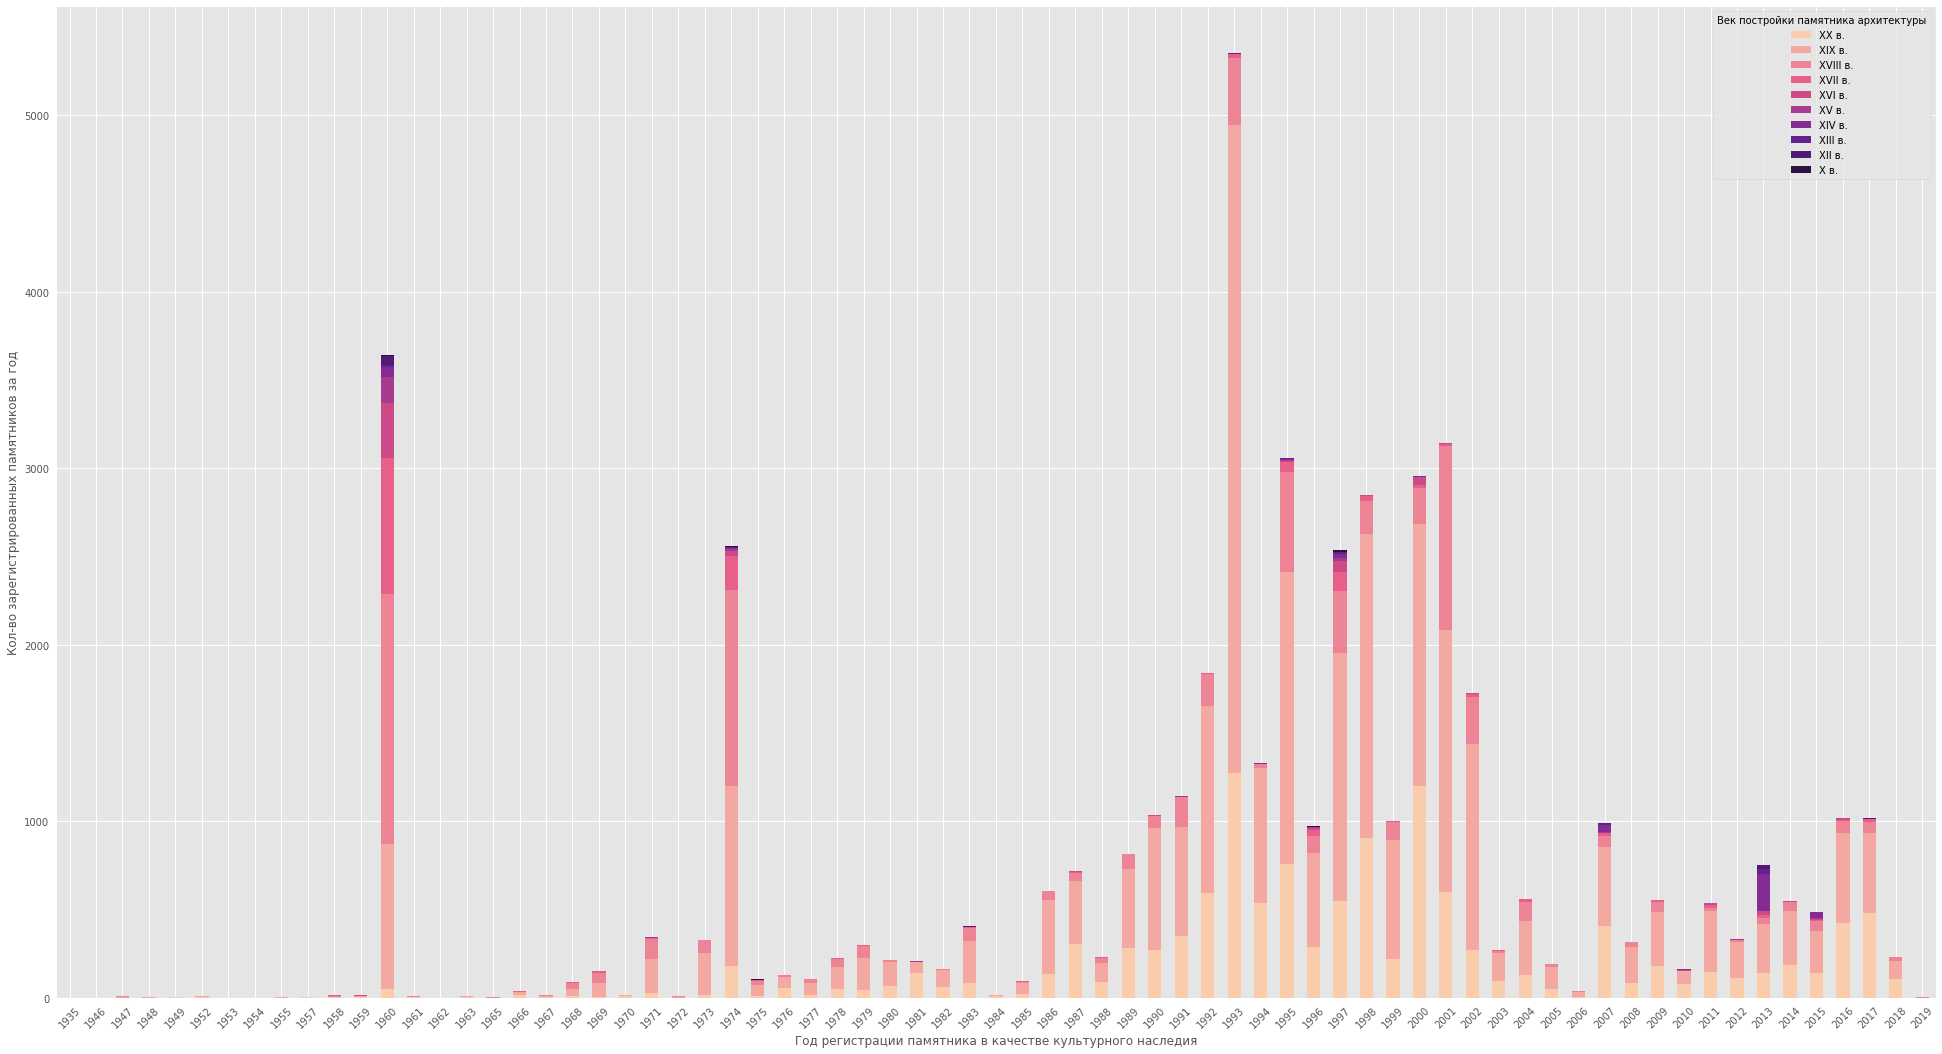

In [ ]:
plt.style.use('ggplot')

df_arch[['XX в.', 'XIX в.', 'XVIII в.', 'XVII в.', 'XVI в.', 'XV в.', 'XIV в.', 'XIII в.', 'XII в.', 'X в.']].plot(stacked=True, kind='bar', figsize=(30, 17),
                                                                                                                             color = ('#f9cdac','#f3a8a1', '#ed8495', '#e8608a',
                                                                                                                                      '#cd4a89', '#a73b8f', '#822c94', '#63218f',
                                                                                                                                      '#511b75', '#2d0f41'))
plt.tick_params(axis = 'x', labelrotation = 45)

plt.xlabel("Год регистрации памятника в качестве культурного наследия")
plt.ylabel("Кол-во зарегистрированных памятников за год")
plt.legend(title='Век постройки памятника архитектуры')

На получившемся графике видно, что первое крупное количество регистраций объектов культурного наследия приходится на 1960 г., где наибольшая доля памятников относится к 16-18 векам постройки. Однако уже во второй пик постановки на учет памятников архитектуры в 1974 г. изменяется соотношение столетий создания объектов — доля объектов 16-17 веков довольно сильно уменьшается, 18 век занимает ту же часть, а доля 19 века увеличивается. Также в качестве культурного наследия начинают регистрировать постройки 20 века.

Двигаясь далее по датам постановки памятников архитектуры на государственную охрану, можно заменить продолжающуюся тенденцию увеличения доли 19-20 веков среди столетий создания объектов культурного наследия. И уже в 1993 г. происходит наибольшее количество регистрации культурного наследия за весь период исследования, где 19 и 20 века составляют большую часть столетий строительства (19 век занимает наибольшую долю). А начиная с 2007 г. можно отметить постепенное увеличение доли объектов созданных в 20 в. среди культурного наследия.

Однако из-за отсутствия более точных сведений о создании большей части объектов, сложно заключить об явном наличии связи между датой строительства и регистрацией в качестве культурного наследия памятников архитектуры.

В связи с чем, можно подытожить, что гипотеза, поставленная в начале исследования, частично подтвердилась и данная тема имеет перспективы для дальнейшего изучения.